## Checkpoint 6

### Dask and Supervised Learning Capstone

### Challenge
In this challenge, you'll replicate one of the supervised learning projects that you did before in the program. This time, you'll use Dask instead of pandas and NumPy. Follow the instructions below:

- The aim of this challenge is to get your hands dirty on writing code using Dask. This is why there is no minimum or maximum limit on the size of the dataset that you can use.

- Use Dask counterparts to replicate all the data-cleaning and machine-learning parts of your supervised learning project. In other words, do the following:

-- Instead of pandas DataFrames, use Dask DataFrames whenever possible.

-- Instead of NumPy arrays, use Dask arrays whenever possible.

-- Use Dask to parallelize your model trainings.

Then, submit your work on Github and share the link below. Good luck!

### Checkpoint
Submit your ideas or a link to your work here. This checkpoint will be reviewed by a member of the grading team. Once reviewed, you can find their notes here and in the feedback tab of your dashboard.

This checkpoint will be graded.

## Supervised Learning Capstone - Wine Quality Data Set

## Background Information

### Introduction to the Data

For this Supervised Learning Capstone, I am using the Wine Quality Data Set made public on the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/wine+quality) and originally published as *Modeling Wine Preferences by Data Mining from Physicochemical Properties in Decision Support Systems* by Cortez et al., 2000 (http://www3.dsi.uminho.pt/pcortez/wine/, https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub). This data consists of two datasets, one of red and one of white wine samples of Vinho Verde from Portugal. The data contains physicochemical and sensory qualities of the wine and wine quality is the target variable. 

### The Data

Each dataset consists of 12 unique variables:

**11 Input Variables**

*fixed acidity (g/dm^3 of tartaric acid)*

Fixed acidity, also known as nonvolatile or titratable acidity, is commonly comprised of tartaric, malic, citric and succinic acids. This is a measure of the total amount of titratable acids and free hydrogen ions present in wine. The majority of acids in wine are fixed and acids are responsible for the sourness and tartness of wine. 


*volatile acidity (g/dm^3 of acetic acid)*

Volatile acidity, a measure of the steam distillable acids (gaseous acids) present in wine, is commonly comprised of acetic acid and is responsible for the vinegar smell and taste of wine. 

*citric acid (g/dm^3)*

Citric acid is most often used as an acid supplement to boost the acidity of wine and acts as a preservative. 

*residual sugar (g/dm^3)*

Residual sugar is a measure of the natural grape sugars leftover in wine after fermentation.

*chlorides (g/dm^3 of sodium chloride)*

Chlorides consists of mineral and organic acids which contribute to the salty taste of wine.

*free sulfur dioxide (mg/dm^3)*

Sulfur dioxide is used in winemaking to prevent oxidation and microbial growth. Free sulfur dioxide is a measure of the amount of sulfur dioxide that is not bound to other molecules.

*total sulfur dioxide (mg/dm^3)*

Sulfur dioxide is used in winemaking to prevent oxidation and microbial growth. Total sulfur dioxide is a measure of the sum amount of sulfur dioxide that is free in the wine and the amount of sulfur dioxide that is bound to other chemicals in the wine. 

*density (g/cm^3)*

Density of wine is the mass per unit volume. Density is used to measure the alcohol concentration of wine. During fermentation, sugar is converted to ethanol and carbon dioxide is produced as waste gas. 

*pH*

pH is a measure of the hydrogen ion concentration of a solution (how acidic or basic a solution is).The pH of wine is measured on a scale of 0 (very acidic) to 14 (very basic) and is used as a measure of ripeness in relation to acidity.

*sulphates (g/dm^3 of potassium sulphate)*

Sulphates are added to wine to preserve freshness and protect wine from oxidation and unwanted bacteria and yeast. 

*alcohol (% volume)*

Alcohol is a measure of the percent alcohol content of the wine.

**1 Output Variable**

*quality (From 0, very bad, to 10, excellent)*

A measure of wine quality.

Sources: 

https://rstudio-pubs-static.s3.amazonaws.com/57835_c4ace81da9dc45438ad0c286bcbb4224.html

https://winefolly.com/deep-dive/understanding-acidity-in-wine/

https://en.wikipedia.org/wiki/Acids_in_wine#Citric_acid

https://waterhouse.ucdavis.edu/whats-in-wine/sulfites

http://www3.dsi.uminho.pt/pcortez/wine5.pdf

### Questions

For this supervised learning capstone, I am interested in the quality of red and white wine. To begin the analysis, I will explore the data and see if there are any missing values in the datasets. If so, I will determine which method is best for filling in or removing the missing values. I will then look at the variables individually through visualizations and descriptive statistics to determine the distribution of the data through skewness and kurtosis and visualize any outliers, if present, in the data. If outliers are present, I will transform them. 

After the datasets have been explored and any adjustments and transformations have been made, I will begin modeling the data (red and white wine data separately) with various machine learning models. The models that I will use include Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, Support Vector Machines (SVM) and an ensemble Gradient Boosting Classifier. The models with be fit with and without GridSearch, which is used to determine the best hyper-parameters for a model. 

After modeling, performance on the test data will be analyzed through various metrics including the accuracy, precision and recall scores, the area under the (AUC) receiver operator characteristic (ROC) curve score as well as analysis of the confusion matrix from each model. These scores will be compared between models and the optimal metrics will be considered to determine the best model for each dataset. 

### Main Questions

There are three main questions that frame this analysis:

1. What are the 6 features most correlated with wine quality?

2. Which machine learning model performs the best in a binary classification task to predict wine quality?

3. What are the 5 most important features in this model?

### Business Interest

The modeling objective is to determine the binary classification of red and white wine, either 0 if not good or 1 if good, given other physical, chemical and sensory characteristics. This is of interest to restaurants/wine/liquor stores or vineyards/wineries that either are selling wine or producing different types of wine.

At restaurants or wine/liquor stores, if a client is looking for wine of a certain quality: of an average or a higher quality, it is important to ensure that classifications of both average and higher quality are correct. If a higher quality wine is classified as a lower quality, the customer might be able to detect the various chemical and sensory characteristics and realize that they have been overcharged for their wine. On the contrary, if a lower quality wine is classified as a higher quality, the customer might likewise be upset as they are not getting what they paid for and expected. Further, in addition, there is a high cost to the business as they lose money from pricing this wine lower than it retails for. 

Likewise, at vineyards or wineries, customer dissatisfaction is a consequence of incorrectly classifying lower quality wines as a higher quality and consequent higher price and loss of profit is a result of incorrectly classifying a higher quality wine with a lower quality. 

Minimizing incorrect classifications of both binary classes (0 and 1) is optimal for this classification task. 

## Analyses

### Import Packages

First, the relevant Python packages necessary for the project will be imported

In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from dask_ml.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import roc_auc_score
import joblib
from dask.distributed import Client, progress
from dask_ml.model_selection import train_test_split
# DataFrames implement the Pandas API
import dask.dataframe as dd
import dask.array as da
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
#Import warnings
import warnings
warnings.filterwarnings('ignore')
#train_test_split
#from sklearn.model_selection import train_test_split
#Winsorize package
from scipy.stats.mstats import winsorize
#StandardScaler package
from sklearn.preprocessing import StandardScaler
#GridSearch package
from sklearn.model_selection import GridSearchCV
#Modeling packages
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
#Time package
import time
#Logistic Regression packages
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
#KNN packages
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
#Decision Tree and Random Forest packages
from sklearn import tree
from IPython.display import Image
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import pydotplus
import graphviz
from sklearn.ensemble import RandomForestClassifier
#SVM packages
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
#Ensemble package
from sklearn.ensemble import GradientBoostingClassifier
#Evaluation metrics packages
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In order to access the data stored on my computer's desktop:

In [3]:
#Access the data
#Print the directory
import os 
cwd=os.getcwd()

print (cwd)

/Users/saralanclos/Thinkful Data Science Projects/Capstone Two: Supervised Learning Capstone


In [4]:
#Change the directory to the CSV file
os.chdir('/Users/saralanclos/Desktop/all/data science/winequality')
os.getcwd()

'/Users/saralanclos/Desktop/all/data science/winequality'

In [5]:
#Print the directory to make sure it is good
arr=os.listdir('.')
print(arr)

['.DS_Store', 'winequality-red.csv', 'winequality-white.csv', 'dask-worker-space']


In [6]:
#Make a client
client = Client(n_workers=4, threads_per_worker=2, memory_limit='2GB')
client

Client Scheduler: tcp://127.0.0.1:64846 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 8.00 GB


Rename the data for the project

In [7]:
# This loads the data into a Dask DataFrame
red_wine = dd.read_csv('winequality-red.csv', sep=';')
white_wine = dd.read_csv('winequality-white.csv', sep=';')

"head" to visualize a small segment of each dataset

In [8]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In order to make it easier to work with the variables, the spaces in each variable will be replaced with an underscore "_"

In [8]:
#Replace space with "_"
red_wine.columns = red_wine.columns.str.replace(' ','_')

In [9]:
#Replace space with "_"
white_wine.columns = white_wine.columns.str.replace(' ','_')

"head" to visualize the data

In [12]:
red_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
white_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Dataset Analysis

Further analysis of the datasets

In [15]:
#shape of red_wine
red_wine_shape=red_wine.shape
red_wine_shape[0].compute(), red_wine_shape[1]

(1599, 12)

In [16]:
#shape of white_wine
white_wine_shape=white_wine.shape
white_wine_shape[0].compute(), white_wine_shape[1]

(4898, 12)

In [17]:
print("{}".format(red_wine_shape[0].compute()))

1599


In [18]:
#Size of the datasets
print("The red_wine dataset has {} rows.".format(red_wine_shape[0].compute()))
print("The red_wine dataset has {} columns.".format(red_wine_shape[1]))
print("The white_wine dataset has {} rows.".format(white_wine_shape[0].compute()))
print("The white_wine dataset has {} columns.".format(white_wine_shape[1]))

The red_wine dataset has 1599 rows.
The red_wine dataset has 12 columns.
The white_wine dataset has 4898 rows.
The white_wine dataset has 12 columns.


### Data Types

What are the data types that comprise the datasets?

"info" to determine the data types of red_wine

In [19]:
red_wine.info

<bound method DataFrame.info of Dask DataFrame Structure:
              fixed_acidity volatile_acidity citric_acid residual_sugar chlorides free_sulfur_dioxide total_sulfur_dioxide  density       pH sulphates  alcohol quality
npartitions=1                                                                                                                                                          
                    float64          float64     float64        float64   float64             float64              float64  float64  float64   float64  float64   int64
                        ...              ...         ...            ...       ...                 ...                  ...      ...      ...       ...      ...     ...
Dask Name: rename, 2 tasks>

"dtypes" to determine the data types of red_wine

In [20]:
red_wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

"info" to determine the data types of white_wine

In [21]:
white_wine.info

<bound method DataFrame.info of Dask DataFrame Structure:
              fixed_acidity volatile_acidity citric_acid residual_sugar chlorides free_sulfur_dioxide total_sulfur_dioxide  density       pH sulphates  alcohol quality
npartitions=1                                                                                                                                                          
                    float64          float64     float64        float64   float64             float64              float64  float64  float64   float64  float64   int64
                        ...              ...         ...            ...       ...                 ...                  ...      ...      ...       ...      ...     ...
Dask Name: rename, 2 tasks>

"dtypes" to determine the data types of white_wine

In [22]:
white_wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Sumary of the data types in the datsets

In [23]:
print("For red_wine and white_wine, the columns: 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates' and 'alcohol' are type float64.")

For red_wine and white_wine, the columns: 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates' and 'alcohol' are type float64.


In [24]:
print("For red_wine and white_wine, the column: 'quality' is type int64.")

For red_wine and white_wine, the column: 'quality' is type int64.


### red_wine

"describe" for all columns in red_wine

In [25]:
#Descriptive statistics
red_wine.describe().compute()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Null/Missing Values?

Are there any missing values in the red_wine dataset?

In [26]:
red_wine.isnull().sum().compute()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [27]:
red_wine.isnull().count().compute()

fixed_acidity           1599
volatile_acidity        1599
citric_acid             1599
residual_sugar          1599
chlorides               1599
free_sulfur_dioxide     1599
total_sulfur_dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [28]:
red_wine.isnull().sum().compute()*100/red_wine.isnull().count().compute()

fixed_acidity           0.0
volatile_acidity        0.0
citric_acid             0.0
residual_sugar          0.0
chlorides               0.0
free_sulfur_dioxide     0.0
total_sulfur_dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

There are no missing values in the red_wine dataset

### Variable Analysis

Individual analysis of each variable in red_wine

In [29]:
#fixed_acidity
red_wine["fixed_acidity"].describe().compute()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed_acidity, dtype: float64

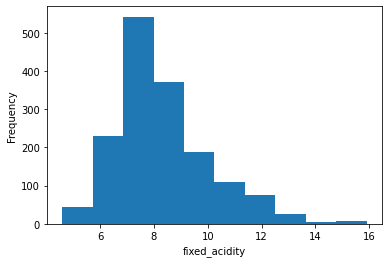

In [62]:
#Histogram of fixed_acidity
plt.hist(red_wine['fixed_acidity'])
plt.xlabel('fixed_acidity')
plt.ylabel('Frequency')
plt.show()

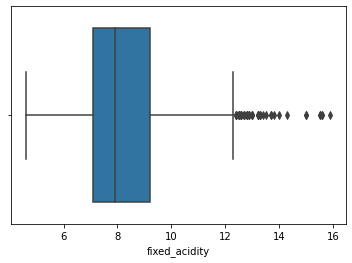

In [77]:
#Boxplot of fixed_acidity
sns.boxplot(red_wine['fixed_acidity'])
plt.show()

"fixed_acidity" has upper bound outliers

In [78]:
#Descriptive statistics of fixed_acidity
stats.describe(red_wine['fixed_acidity'])

DescribeResult(nobs=1599, minmax=(4.6, 15.9), mean=8.31963727329581, variance=3.0314163889978167, skewness=0.9818292953262073, kurtosis=1.1248563352037486)

"fixed_acidity" has a skewness of 0.98 and kurtosis of 1.12

The data has a right skew and is leptokurtic

In [80]:
#volatile_acidity
red_wine["volatile_acidity"].describe().compute()

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile_acidity, dtype: float64

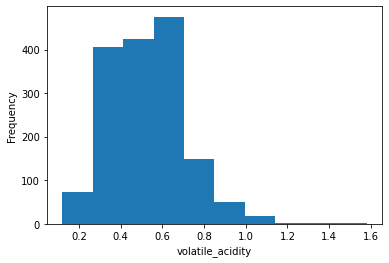

In [81]:
#Histogram of volatile_acidity
plt.hist(red_wine['volatile_acidity'])
plt.xlabel('volatile_acidity')
plt.ylabel('Frequency')
plt.show()

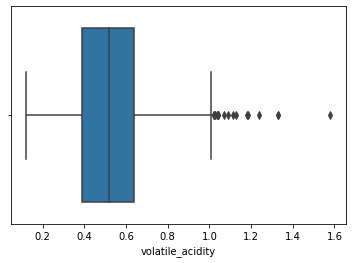

In [82]:
#Boxplot of volatile_acidity
sns.boxplot(red_wine['volatile_acidity'])
plt.show()

"volatile_acidity" has upper bound outliers

In [83]:
#Descriptive statistics of volatile_acidity
stats.describe(red_wine['volatile_acidity'])

DescribeResult(nobs=1599, minmax=(0.12, 1.58), mean=0.5278205128205128, variance=0.032062377651551614, skewness=0.6709623963499574, kurtosis=1.2179633893005306)

"volatile_acidity" has a skewness of 0.67 and kurtosis of 1.22

The data has a right skew and is leptokurtic

In [86]:
#citric_acid
red_wine["citric_acid"].describe().compute()

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric_acid, dtype: float64

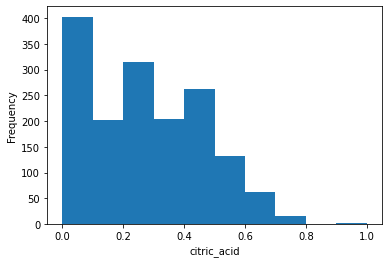

In [87]:
#Histogram of citric_acid
plt.hist(red_wine['citric_acid'])
plt.xlabel('citric_acid')
plt.ylabel('Frequency')
plt.show()

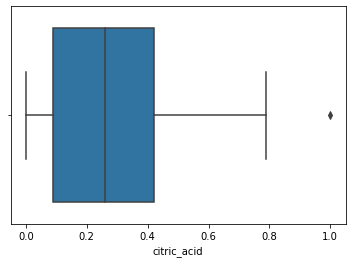

In [88]:
#Boxplot of citric_acid
sns.boxplot(red_wine['citric_acid'])
plt.show()

"citric_acid" has upper bound outliers

In [89]:
#Descriptive statistics of citric_acid
stats.describe(red_wine['citric_acid'])

DescribeResult(nobs=1599, minmax=(0.0, 1.0), mean=0.2709756097560976, variance=0.03794748313440581, skewness=0.3180385895475358, kurtosis=-0.7902825153036646)

"citric_acid" has a skewness of 0.32 and kurtosis of -0.79

The data has a right skew and is platykurtic

In [90]:
#residual_sugar
red_wine["residual_sugar"].describe().compute()

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual_sugar, dtype: float64

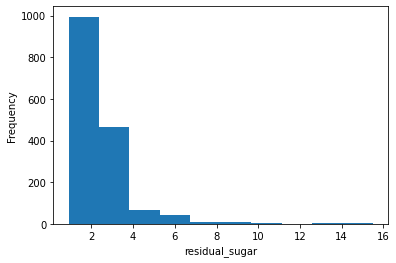

In [91]:
#Histogram of residual_sugar
plt.hist(red_wine['residual_sugar'])
plt.xlabel('residual_sugar')
plt.ylabel('Frequency')
plt.show()

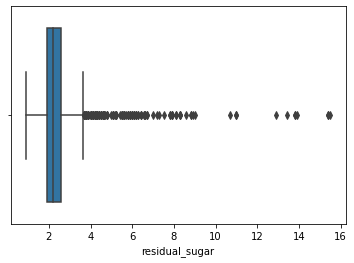

In [92]:
#Boxplot of residual_sugar
sns.boxplot(red_wine['residual_sugar'])
plt.show()

"residual_sugar" has upper bound outliers

In [93]:
#Descriptive statistics of residual_sugar
stats.describe(red_wine['residual_sugar'])

DescribeResult(nobs=1599, minmax=(0.9, 15.5), mean=2.53880550343965, variance=1.9878971329859634, skewness=4.536394788805638, kurtosis=28.524437824252235)

"residual_sugar" has a skewness of 4.54 and kurtosis of 28.52

The data has a right skew and is leptokurtic

In [94]:
#chlorides
red_wine["chlorides"].describe().compute()

count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

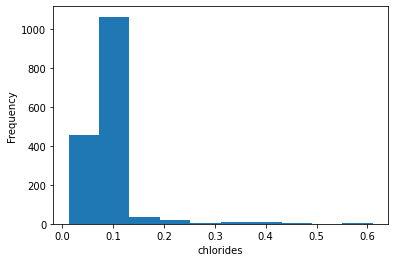

In [95]:
#Histogram of chlorides
plt.hist(red_wine['chlorides'])
plt.xlabel('chlorides')
plt.ylabel('Frequency')
plt.show()

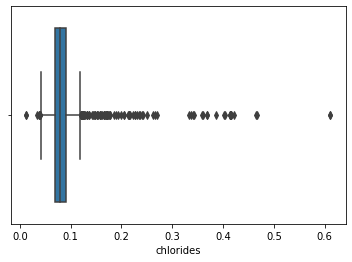

In [96]:
#Boxplot of chlorides
sns.boxplot(red_wine['chlorides'])
plt.show()

"chlorides" has upper and lower bound outliers

In [97]:
#Descriptive statistics of chlorides
stats.describe(red_wine['chlorides'])

DescribeResult(nobs=1599, minmax=(0.012, 0.611), mean=0.08746654158849279, variance=0.0022151426533009912, skewness=5.675016527504259, kurtosis=41.581708043675775)

"chlorides" has a skewness of 5.68 and kurtosis of 41.58

The data has a right skew and is leptokurtic

In [98]:
#free_sulfur_dioxide
red_wine["free_sulfur_dioxide"].describe().compute()

count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free_sulfur_dioxide, dtype: float64

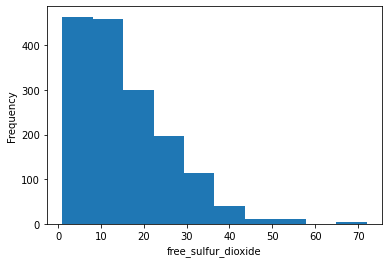

In [99]:
#Histogram of free_sulfur_dioxide
plt.hist(red_wine['free_sulfur_dioxide'])
plt.xlabel('free_sulfur_dioxide')
plt.ylabel('Frequency')
plt.show()

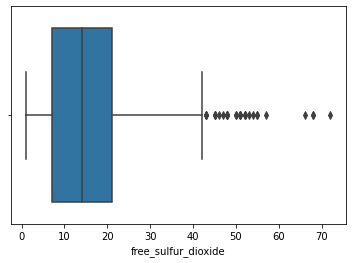

In [100]:
#Boxplot of free_sulfur_dioxide
sns.boxplot(red_wine['free_sulfur_dioxide'])
plt.show()

"free_sulfur_dioxide" has upper bound outliers

In [101]:
#Descriptive statistics of free_sulfur_dioxide
stats.describe(red_wine['free_sulfur_dioxide'])

DescribeResult(nobs=1599, minmax=(1.0, 72.0), mean=15.874921826141339, variance=109.414883833059, skewness=1.249393847434253, kurtosis=2.01348999733378)

"free_sulfur_dioxide" has a skewness of 1.25 and kurtosis of 2.01

The data has a right skew and is leptokurtic

In [102]:
#total_sulfur_dioxide
red_wine["total_sulfur_dioxide"].describe().compute()

count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total_sulfur_dioxide, dtype: float64

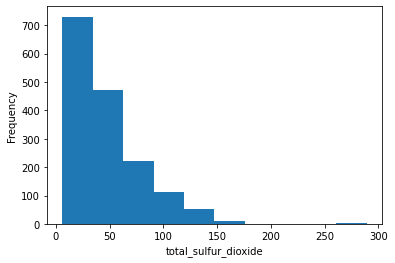

In [103]:
#Histogram of total_sulfur_dioxide
plt.hist(red_wine['total_sulfur_dioxide'])
plt.xlabel('total_sulfur_dioxide')
plt.ylabel('Frequency')
plt.show()

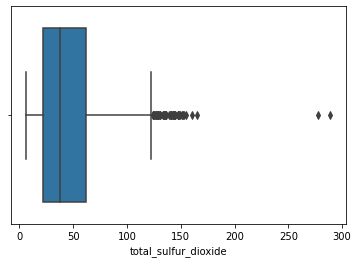

In [104]:
#Boxplot of total_sulfur_dioxide
sns.boxplot(red_wine['total_sulfur_dioxide'])
plt.show()

"total_sulfur_dioxide" has upper bound outliers

In [105]:
#Descriptive statistics of total_sulfur_dioxide
stats.describe(red_wine['total_sulfur_dioxide'])

DescribeResult(nobs=1599, minmax=(6.0, 289.0), mean=46.46779237023139, variance=1082.1023725325824, skewness=1.5141091878506638, kurtosis=3.7941717664905665)

"total_sulfur_dioxide" has a skewness of 1.51 and kurtosis of 3.79

The data has a right skew and is leptokurtic

In [106]:
#density
red_wine["density"].describe().compute()

count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64

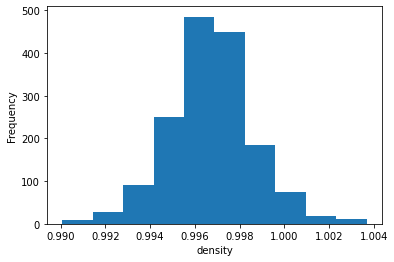

In [107]:
#Histogram of density
plt.hist(red_wine['density'])
plt.xlabel('density')
plt.ylabel('Frequency')
plt.show()

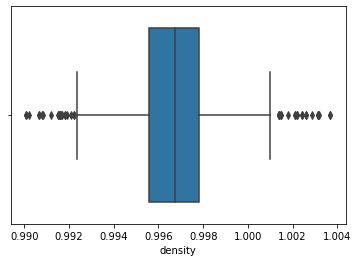

In [108]:
#Boxplot of density
sns.boxplot(red_wine['density'])
plt.show()

"density" has upper and lower bound outliers

In [109]:
#Descriptive statistics of density
stats.describe(red_wine['density'])

DescribeResult(nobs=1599, minmax=(0.99007, 1.00369), mean=0.9967466791744841, variance=3.562029453326973e-06, skewness=0.07122077153539946, kurtosis=0.9274107990478333)

"density" has a skewness of 0.07 and kurtosis of 0.93

The data has a right skew and is leptokurtic

In [110]:
#sulphates
red_wine["sulphates"].describe().compute()

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

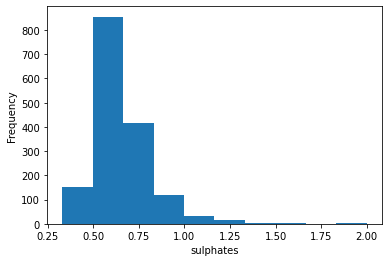

In [111]:
#Histogram of sulphates
plt.hist(red_wine['sulphates'])
plt.xlabel('sulphates')
plt.ylabel('Frequency')
plt.show()

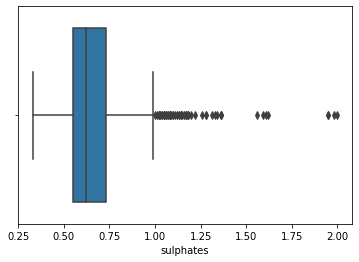

In [112]:
#Boxplot of sulphates
sns.boxplot(red_wine['sulphates'])
plt.show()

"sulphates" has upper bound outliers

In [113]:
#Descriptive statistics of sulphates
stats.describe(red_wine['sulphates'])

DescribeResult(nobs=1599, minmax=(0.33, 2.0), mean=0.6581488430268917, variance=0.028732616129761954, skewness=2.426393455449087, kurtosis=11.6798841115311)

"sulphates" has a skewness of 2.43 and kurtosis of 11.68

The data has a right skew and is leptokurtic

In [114]:
#alcohol
red_wine["alcohol"].describe().compute()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

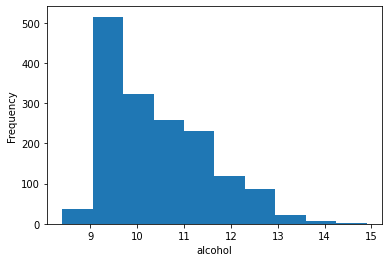

In [115]:
#Histogram of alcohol
plt.hist(red_wine['alcohol'])
plt.xlabel('alcohol')
plt.ylabel('Frequency')
plt.show()

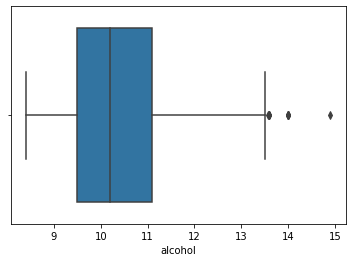

In [116]:
#Boxplot of alcohol
sns.boxplot(red_wine['alcohol'])
plt.show()

"alcohol" has upper bound outliers

In [117]:
#Descriptive statistics of alcohol
stats.describe(red_wine['alcohol'])

DescribeResult(nobs=1599, minmax=(8.4, 14.9), mean=10.422983114446529, variance=1.1356473950004737, skewness=0.8600210646566755, kurtosis=0.1956543762123122)

"alcohol" has a skewness of 0.86 and kurtosis of 0.20

The data has a right skew and is leptokurtic

In [119]:
#quality
red_wine["quality"].describe().compute()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

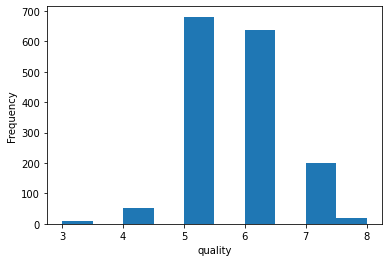

In [120]:
#Histogram of quality
plt.hist(red_wine['quality'])
plt.xlabel('quality')
plt.ylabel('Frequency')
plt.show()

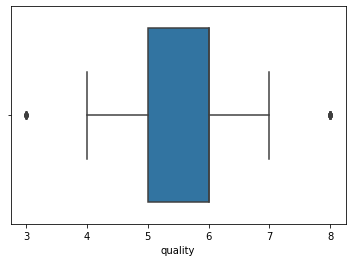

In [122]:
#Boxplot of quality
sns.boxplot(red_wine['quality'])
plt.show()

"quality" has upper and lower bound outliers

In [123]:
#Descriptive statistics of quality
stats.describe(red_wine['quality'])

DescribeResult(nobs=1599, minmax=(3, 8), mean=5.6360225140712945, variance=0.6521683999934252, skewness=0.21759720553467285, kurtosis=0.2920311389729804)

"quality" has a skewness of 0.22 and kurtosis of 0.29

The data has a right skew and is leptokurtic

### white_wine

"describe" for all columns in white_wine

In [30]:
#Descriptive statistics
white_wine.describe().compute()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Null/Missing Values?

Are there any missing values in the white_wine dataset?

In [31]:
white_wine.isnull().sum().compute()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [32]:
white_wine.isnull().count().compute()

fixed_acidity           4898
volatile_acidity        4898
citric_acid             4898
residual_sugar          4898
chlorides               4898
free_sulfur_dioxide     4898
total_sulfur_dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

In [131]:
white_wine.isnull().sum().compute()*100/white_wine.isnull().count().compute()

fixed_acidity           0.0
volatile_acidity        0.0
citric_acid             0.0
residual_sugar          0.0
chlorides               0.0
free_sulfur_dioxide     0.0
total_sulfur_dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

There are no missing values in the white_wine dataset

### Variable Analysis

In [133]:
#fixed_acidity
white_wine["fixed_acidity"].describe().compute()

count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000
Name: fixed_acidity, dtype: float64

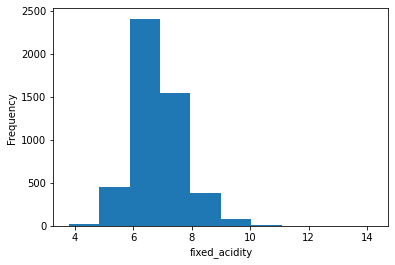

In [134]:
#Histogram of fixed_acidity
plt.hist(white_wine['fixed_acidity'])
plt.xlabel('fixed_acidity')
plt.ylabel('Frequency')
plt.show()

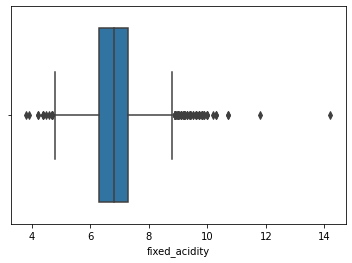

In [135]:
#Boxplot of fixed_acidity
sns.boxplot(white_wine['fixed_acidity'])
plt.show()

"fixed_acidity" has upper and lower bound outliers

In [136]:
#descriptive statistics of fixed_acidity
stats.describe(white_wine['fixed_acidity'])

DescribeResult(nobs=4898, minmax=(3.8, 14.2), mean=6.854787668436097, variance=0.7121135857004643, skewness=0.6475530855160632, kurtosis=2.168736944824719)

"fixed_acidity" has a skewness of 0.65 and kurtosis of 2.17

The data has a right skew and is leptokurtic

In [137]:
#volatile_acidity
white_wine["volatile_acidity"].describe().compute()

count    4898.000000
mean        0.278241
std         0.100795
min         0.080000
25%         0.210000
50%         0.260000
75%         0.320000
max         1.100000
Name: volatile_acidity, dtype: float64

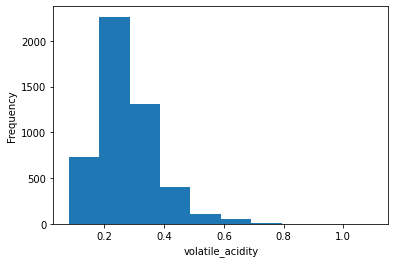

In [138]:
#Histogram of volatile_acidity
plt.hist(white_wine['volatile_acidity'])
plt.xlabel('volatile_acidity')
plt.ylabel('Frequency')
plt.show()

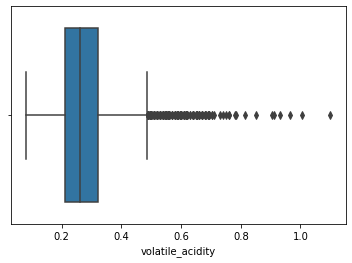

In [139]:
#Boxplot of volatile_acidity
sns.boxplot(white_wine['volatile_acidity'])
plt.show()

"volatile_acidity" has upper bound outliers

In [140]:
#Descriptive statistics of volatile_acidity
stats.describe(white_wine['volatile_acidity'])

DescribeResult(nobs=4898, minmax=(0.08, 1.1), mean=0.27824111882400976, variance=0.010159540992172523, skewness=1.576496515957486, kurtosis=5.085204904517855)

"volatile_acidity" has a skewness of 1.58 and kurtosis of 5.09

The data has a right skew and is leptokurtic

In [142]:
#citric_acid
white_wine["citric_acid"].describe().compute()

count    4898.000000
mean        0.334192
std         0.121020
min         0.000000
25%         0.270000
50%         0.320000
75%         0.390000
max         1.660000
Name: citric_acid, dtype: float64

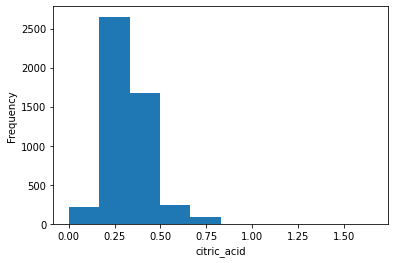

In [143]:
#Histogram of citric_acid
plt.hist(white_wine['citric_acid'])
plt.xlabel('citric_acid')
plt.ylabel('Frequency')
plt.show()

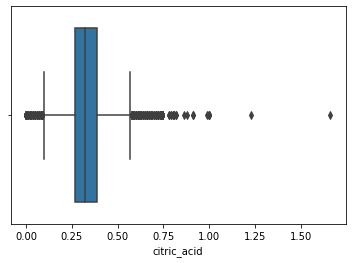

In [144]:
#Boxplot of citric_acid
sns.boxplot(white_wine['citric_acid'])
plt.show()

"citric_acid" has upper and lower bound outliers

In [145]:
#Descriptive statistics of citric_acid
stats.describe(white_wine['citric_acid'])

DescribeResult(nobs=4898, minmax=(0.0, 1.66), mean=0.33419150673744386, variance=0.014645793009328216, skewness=1.2815277799152376, kurtosis=6.167374226819426)

"citric_acid" has a skewness of 1.28 and kurtosis of 6.17

The data has a right skew and is leptokurtic

In [146]:
#residual_sugar
white_wine["residual_sugar"].describe().compute()

count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual_sugar, dtype: float64

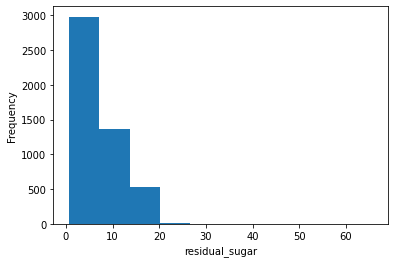

In [147]:
#Histogram of residual_sugar
plt.hist(white_wine['residual_sugar'])
plt.xlabel('residual_sugar')
plt.ylabel('Frequency')
plt.show()

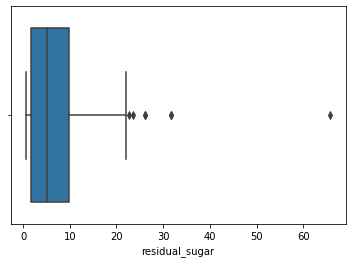

In [148]:
#Boxplot of residual_sugar
sns.boxplot(white_wine['residual_sugar'])
plt.show()

"residual_sugar" has upper bound outliers

In [149]:
#Descriptive statistics of residual_sugar
stats.describe(white_wine['residual_sugar'])

DescribeResult(nobs=4898, minmax=(0.6, 65.8), mean=6.391414863209474, variance=25.725770164385946, skewness=1.0767638711454448, kurtosis=3.465054296604639)

"residual_sugar" has a skewness of 1.08 and kurtosis of 3.47

The data has a right skew and is leptokurtic

In [150]:
#chlorides
white_wine["chlorides"].describe().compute()

count    4898.000000
mean        0.045772
std         0.021848
min         0.009000
25%         0.036000
50%         0.043000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64

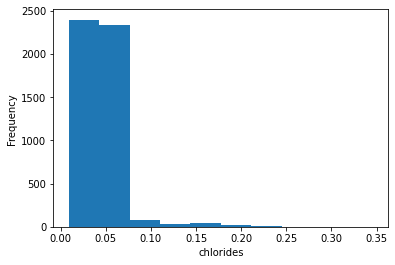

In [151]:
#Histogram of chlorides
plt.hist(white_wine['chlorides'])
plt.xlabel('chlorides')
plt.ylabel('Frequency')
plt.show()

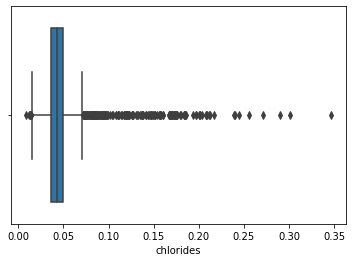

In [152]:
#Boxplot of chlorides
sns.boxplot(white_wine['chlorides'])
plt.show()

"chlorides" has upper and lower bound outliers

In [153]:
#Descriptive statistics of chlorides
stats.describe(white_wine['chlorides'])

DescribeResult(nobs=4898, minmax=(0.009, 0.346), mean=0.04577235606369946, variance=0.00047733370982459155, skewness=5.0217921696710315, kurtosis=37.52503905008619)

 "chlorides" has a skewness of 5.02 and kurtosis of 37.53
 
 The data has a right skew and is leptokurtic

In [154]:
#free_sulfur_dioxide
white_wine["free_sulfur_dioxide"].describe().compute()

count    4898.000000
mean       35.308085
std        17.007137
min         2.000000
25%        23.000000
50%        34.000000
75%        46.000000
max       289.000000
Name: free_sulfur_dioxide, dtype: float64

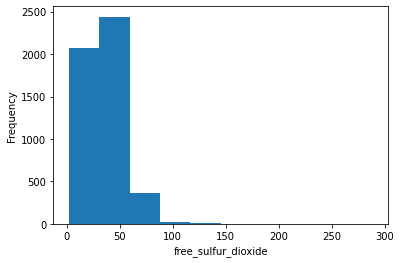

In [155]:
#Histogram of free_sulfur_dioxide
plt.hist(white_wine['free_sulfur_dioxide'])
plt.xlabel('free_sulfur_dioxide')
plt.ylabel('Frequency')
plt.show()

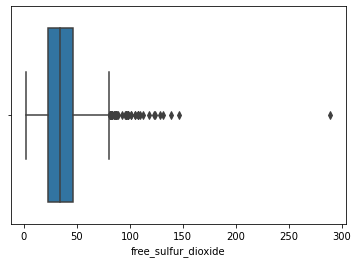

In [156]:
#Boxplot of free_sulfur_dioxide
sns.boxplot(white_wine['free_sulfur_dioxide'])
plt.show()

"free_sulfur_dioxide" has upper bound outliers

In [157]:
#Descriptive statistics of free_sulfur_dioxide
stats.describe(white_wine['free_sulfur_dioxide'])

DescribeResult(nobs=4898, minmax=(2.0, 289.0), mean=35.30808493262556, variance=289.2427199993196, skewness=1.4063140718346216, kurtosis=11.453415905047146)

"free_sulfur_dioxide" has a skewness of 1.41 and kurtosis of 11.45

The data has a right skew and is leptokurtic

In [158]:
#total_sulfur_dioxide
white_wine["total_sulfur_dioxide"].describe().compute()

count    4898.000000
mean      138.360657
std        42.498065
min         9.000000
25%       108.000000
50%       134.000000
75%       167.000000
max       440.000000
Name: total_sulfur_dioxide, dtype: float64

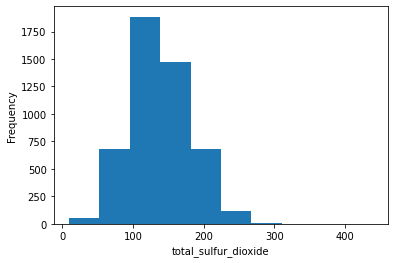

In [159]:
#Histogram of total_sulfur_dioxide
plt.hist(white_wine['total_sulfur_dioxide'])
plt.xlabel('total_sulfur_dioxide')
plt.ylabel('Frequency')
plt.show()

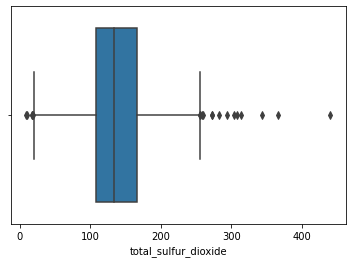

In [160]:
#Boxplot of total_sulfur_dioxide
sns.boxplot(white_wine['total_sulfur_dioxide'])
plt.show()

"total_sulfur_dioxide" has upper and lower bound outliers

In [161]:
#Descriptive statistics of total_sulfur_dioxide
stats.describe(white_wine['total_sulfur_dioxide'])

DescribeResult(nobs=4898, minmax=(9.0, 440.0), mean=138.36065741118824, variance=1806.0854908480976, skewness=0.39059017758152365, kurtosis=0.5700448984658744)

"total_sulfur_dioxide" has a skewness of 0.39 and kurtosis of 0.57

The data has a right skew and is leptokurtic

In [162]:
#density
white_wine["density"].describe().compute()

count    4898.000000
mean        0.994027
std         0.002991
min         0.987110
25%         0.991723
50%         0.993740
75%         0.996100
max         1.038980
Name: density, dtype: float64

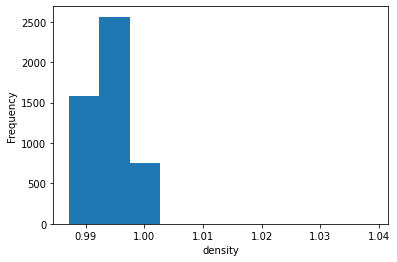

In [163]:
#Histogram of density
plt.hist(white_wine['density'])
plt.xlabel('density')
plt.ylabel('Frequency')
plt.show()

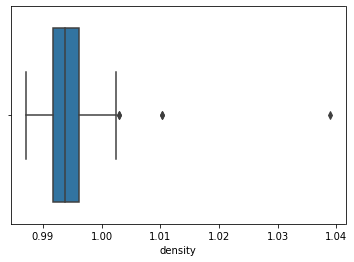

In [164]:
#Boxplot of density
sns.boxplot(white_wine['density'])
plt.show()

"density" has upper bound outliers

In [165]:
#Descriptive statistics of density
stats.describe(white_wine['density'])

DescribeResult(nobs=4898, minmax=(0.98711, 1.03898), mean=0.9940273764801959, variance=8.945524185781195e-06, skewness=0.9774735389049212, kurtosis=9.78258726703537)

"density" has a skewness of 0.98 and kurtosis of 9.78

The data has a right skew and is leptokurtic

In [166]:
#sulphates
white_wine["sulphates"].describe().compute()

count    4898.000000
mean        0.489847
std         0.114126
min         0.220000
25%         0.410000
50%         0.470000
75%         0.550000
max         1.080000
Name: sulphates, dtype: float64

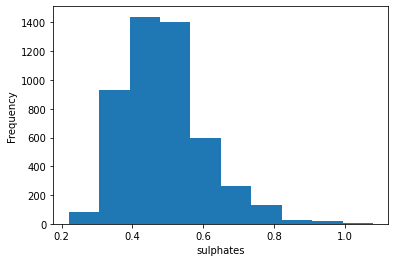

In [167]:
#Histogram of sulphates
plt.hist(white_wine['sulphates'])
plt.xlabel('sulphates')
plt.ylabel('Frequency')
plt.show()

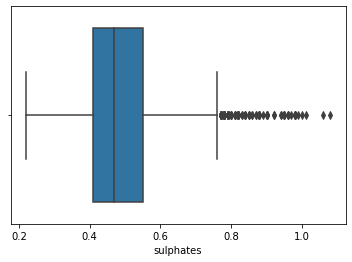

In [168]:
#Boxplot of sulphates
sns.boxplot(white_wine['sulphates'])
plt.show()

"sulphates" has upper bound outliers

In [169]:
#Descriptive statistics of sulphates
stats.describe(white_wine['sulphates'])

DescribeResult(nobs=4898, minmax=(0.22, 1.08), mean=0.48984687627603113, variance=0.013024705974516444, skewness=0.9768943947733427, kurtosis=1.5880812942840752)

"sulphates" has a skewness of 0.98 and kurtosis of 1.59

The data has a right skew and is leptokurtic

In [170]:
#alcohol
white_wine["alcohol"].describe().compute()

count    4898.000000
mean       10.514267
std         1.230621
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64

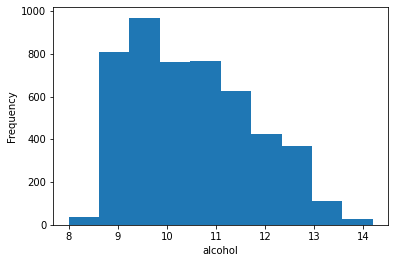

In [171]:
#Histogram of alcohol
plt.hist(white_wine['alcohol'])
plt.xlabel('alcohol')
plt.ylabel('Frequency')
plt.show()

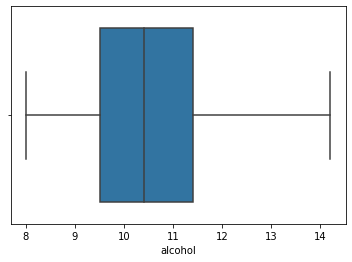

In [172]:
#Boxplot of alcohol
sns.boxplot(white_wine['alcohol'])
plt.show()

"alcohol" does not have outliers

In [173]:
#Descriptive statistics of alcohol
stats.describe(white_wine['alcohol'])

DescribeResult(nobs=4898, minmax=(8.0, 14.2), mean=10.514267047774602, variance=1.5144269817873437, skewness=0.48719273327634327, kurtosis=-0.6989373013774789)

"alcohol" has a skewness of 0.49 and kurtosis of -0.70

The data has a right skew and is platykurtic

In [174]:
#quality
white_wine["quality"].describe().compute()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

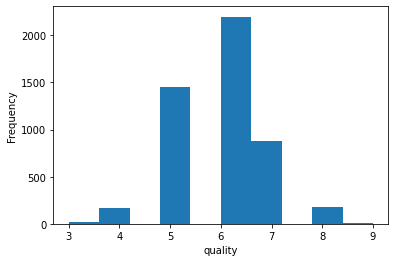

In [175]:
#Histogram of quality
plt.hist(white_wine['quality'])
plt.xlabel('quality')
plt.ylabel('Frequency')
plt.show()

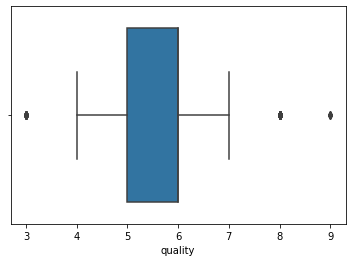

In [176]:
#Boxplot of quality
sns.boxplot(white_wine['quality'])
plt.show()

"quality" has upper and lower bound outliers

In [177]:
#Descriptive statistics of quality
stats.describe(white_wine['quality'])

DescribeResult(nobs=4898, minmax=(3, 9), mean=5.87790935075541, variance=0.7843556854710506, skewness=0.15574868141362455, kurtosis=0.21508011570192975)

"quality" has a skewness of 0.16 and kurtosis of 0.22

The data has a right skew and is leptokurtic

### Summary of red_wine

The above analyses, consolidated:

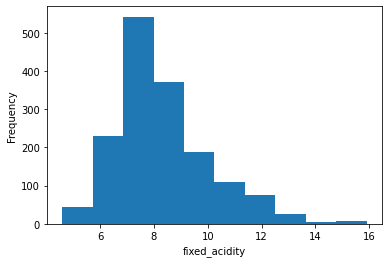

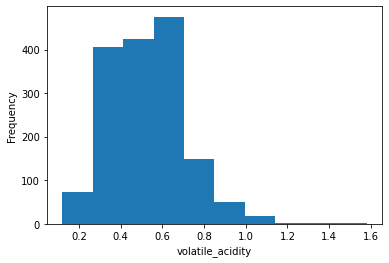

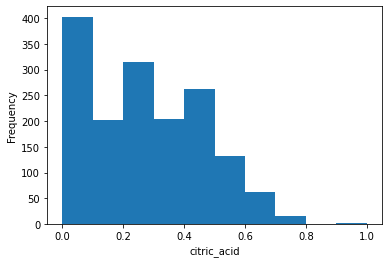

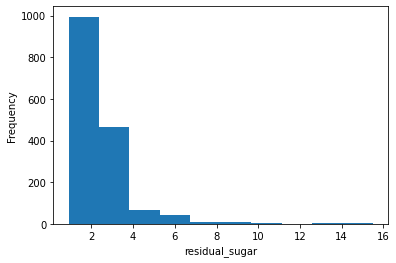

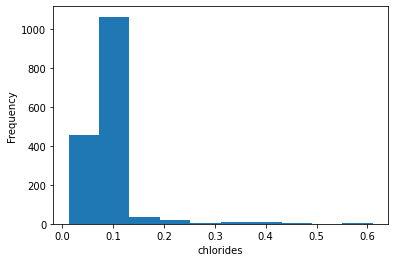

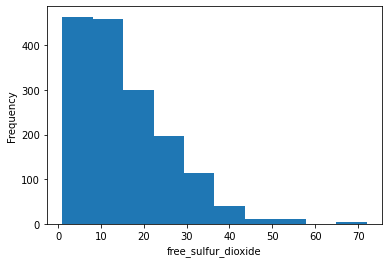

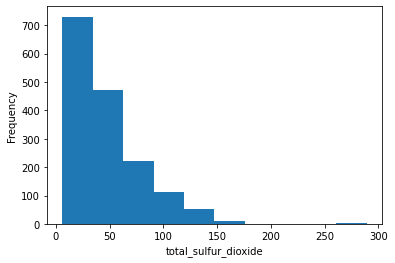

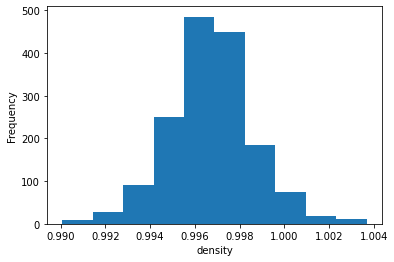

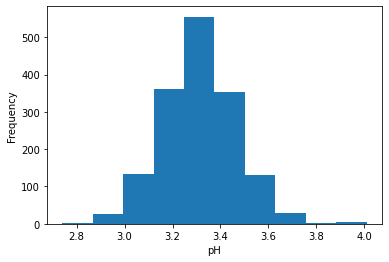

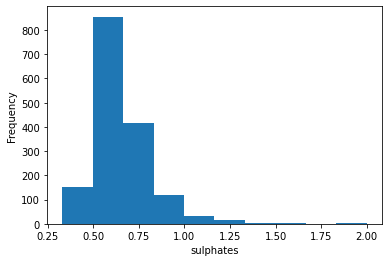

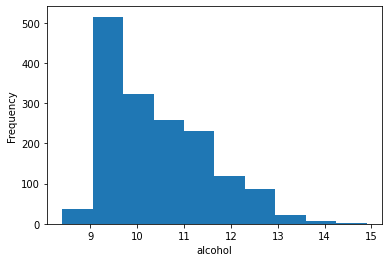

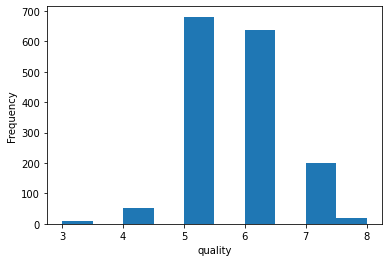

In [198]:
#Histograms of variables
for column in red_wine:
    plt.hist(red_wine[column])
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

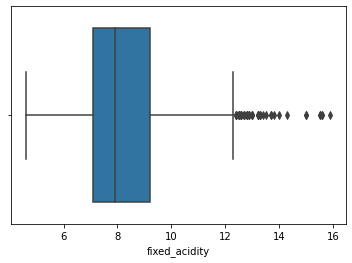

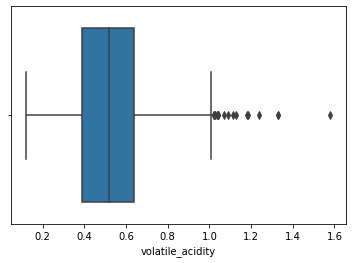

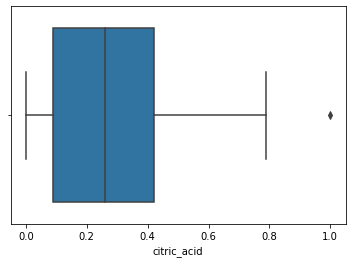

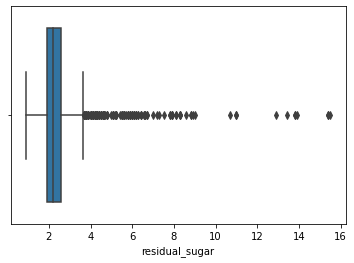

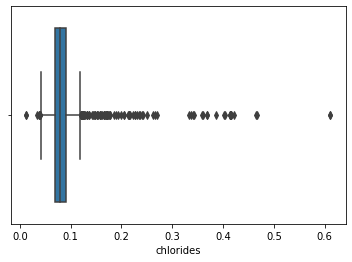

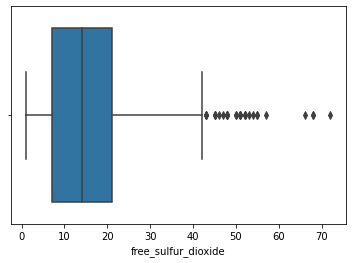

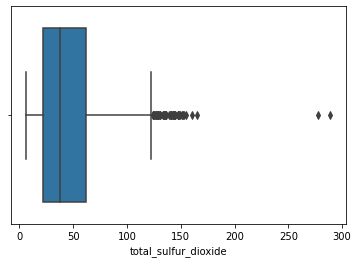

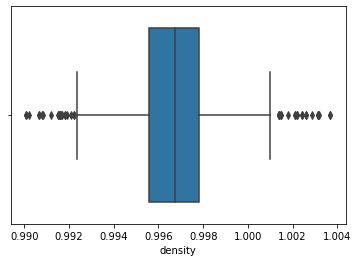

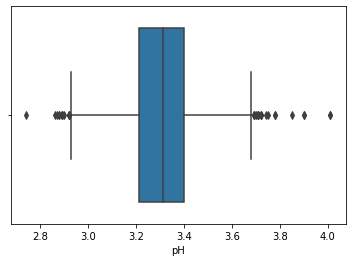

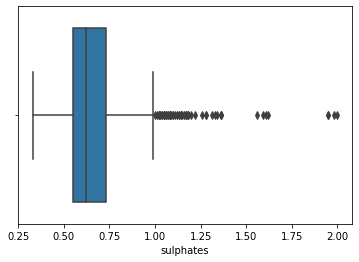

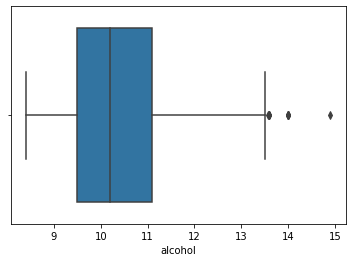

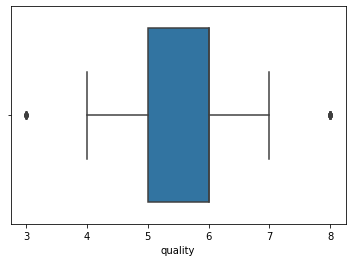

In [205]:
#Boxplots of variables
for column in red_wine:
    sns.boxplot(red_wine[column])
    plt.show()
#There are outliers in all of the columns

In [206]:
#Descriptive statistics of variables
for columns in red_wine:
    print([columns])
    print(stats.describe(red_wine[columns]))
    print("")

['fixed_acidity']
DescribeResult(nobs=1599, minmax=(4.6, 15.9), mean=8.31963727329581, variance=3.0314163889978167, skewness=0.9818292953262073, kurtosis=1.1248563352037486)

['volatile_acidity']
DescribeResult(nobs=1599, minmax=(0.12, 1.58), mean=0.5278205128205128, variance=0.032062377651551614, skewness=0.6709623963499574, kurtosis=1.2179633893005306)

['citric_acid']
DescribeResult(nobs=1599, minmax=(0.0, 1.0), mean=0.2709756097560976, variance=0.03794748313440581, skewness=0.3180385895475358, kurtosis=-0.7902825153036646)

['residual_sugar']
DescribeResult(nobs=1599, minmax=(0.9, 15.5), mean=2.53880550343965, variance=1.9878971329859634, skewness=4.536394788805638, kurtosis=28.524437824252235)

['chlorides']
DescribeResult(nobs=1599, minmax=(0.012, 0.611), mean=0.08746654158849279, variance=0.0022151426533009912, skewness=5.675016527504259, kurtosis=41.581708043675775)

['free_sulfur_dioxide']
DescribeResult(nobs=1599, minmax=(1.0, 72.0), mean=15.874921826141339, variance=109.4148

### Summary of white_wine

The above analyses, consolidated:

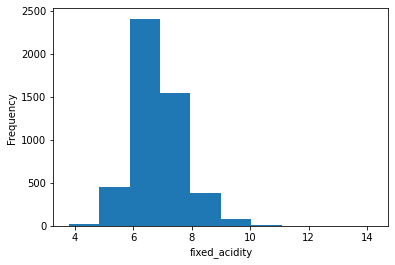

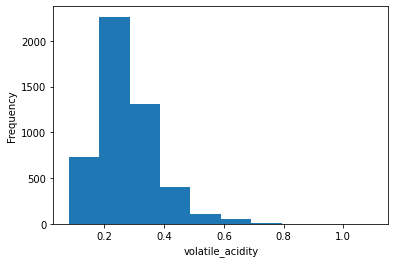

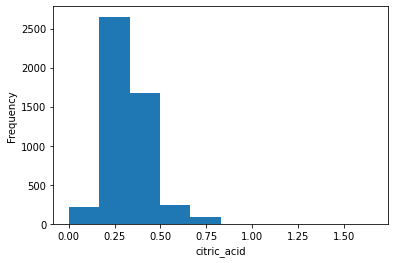

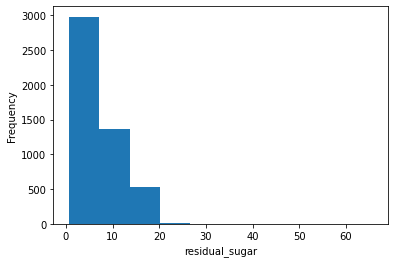

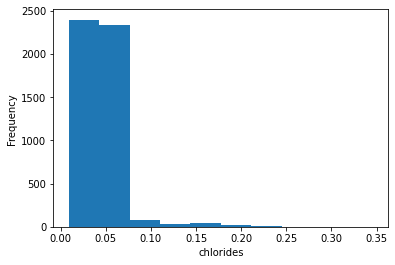

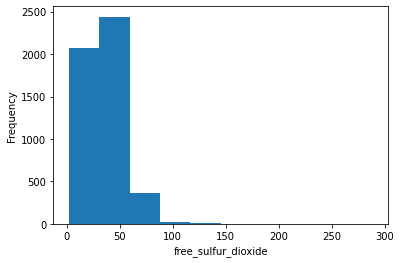

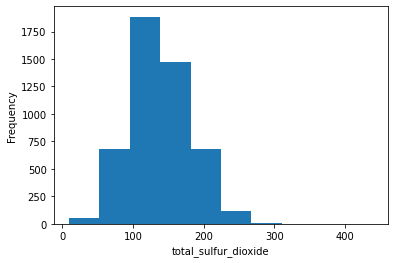

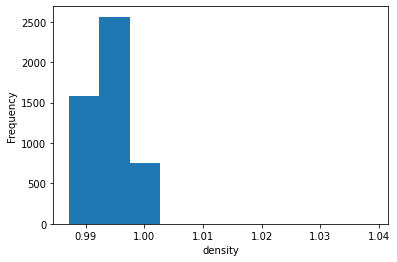

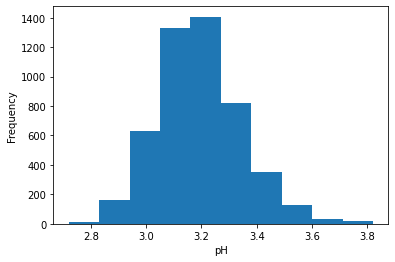

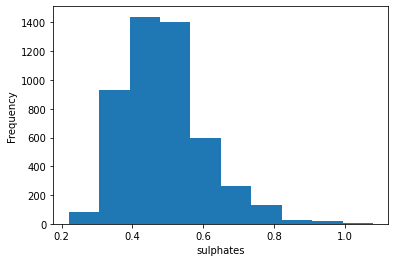

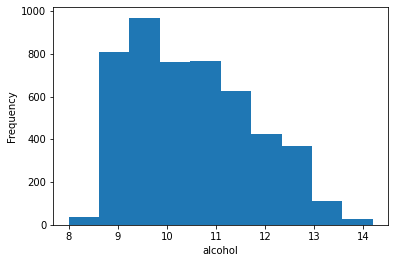

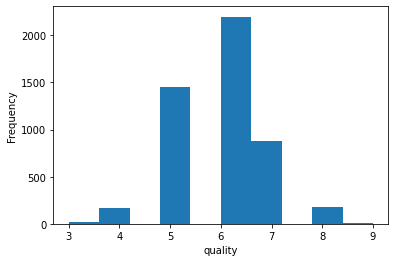

In [207]:
#Histograms of variables
for column in white_wine:
    plt.hist(white_wine[column])
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

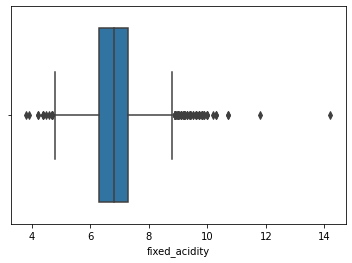

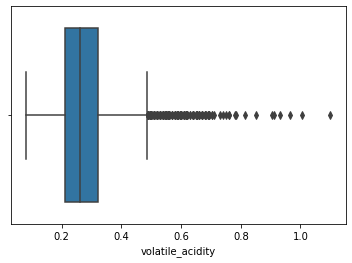

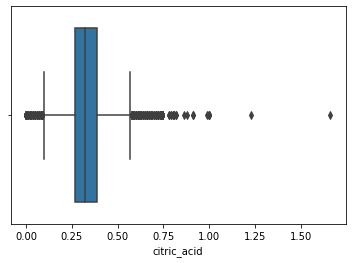

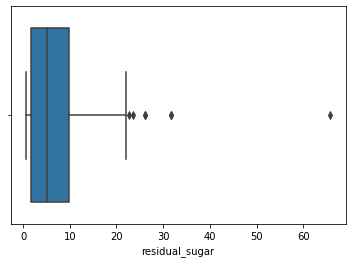

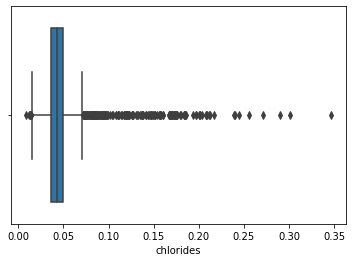

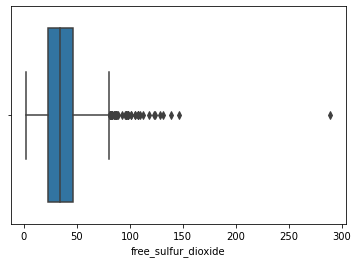

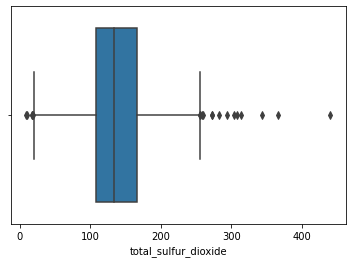

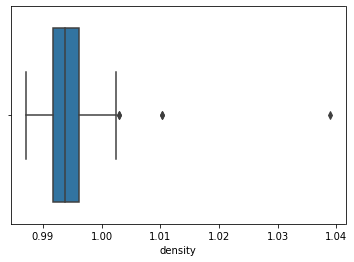

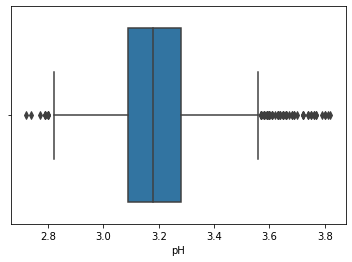

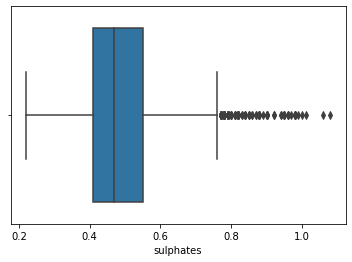

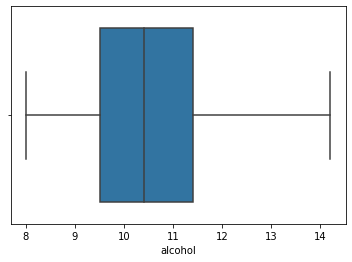

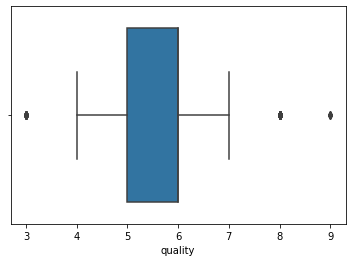

In [208]:
#Boxplots of variables
for column in white_wine:
    sns.boxplot(white_wine[column])
    plt.show()
#There are outliers in the columns but the "alcohol" column does not have outliers.

In [209]:
#Descriptive statistics of variables
for columns in white_wine:
    print([columns])
    print(stats.describe(white_wine[columns]))
    print("")

['fixed_acidity']
DescribeResult(nobs=4898, minmax=(3.8, 14.2), mean=6.854787668436097, variance=0.7121135857004643, skewness=0.6475530855160632, kurtosis=2.168736944824719)

['volatile_acidity']
DescribeResult(nobs=4898, minmax=(0.08, 1.1), mean=0.27824111882400976, variance=0.010159540992172523, skewness=1.576496515957486, kurtosis=5.085204904517855)

['citric_acid']
DescribeResult(nobs=4898, minmax=(0.0, 1.66), mean=0.33419150673744386, variance=0.014645793009328216, skewness=1.2815277799152376, kurtosis=6.167374226819426)

['residual_sugar']
DescribeResult(nobs=4898, minmax=(0.6, 65.8), mean=6.391414863209474, variance=25.725770164385946, skewness=1.0767638711454448, kurtosis=3.465054296604639)

['chlorides']
DescribeResult(nobs=4898, minmax=(0.009, 0.346), mean=0.04577235606369946, variance=0.00047733370982459155, skewness=5.0217921696710315, kurtosis=37.52503905008619)

['free_sulfur_dioxide']
DescribeResult(nobs=4898, minmax=(2.0, 289.0), mean=35.30808493262556, variance=289.242

### Outlier Analyses

Box plots to visualzie the outliers, z-scores (distance from a point to the mean, measured in standard deviation units) and interquartile range (IQR) method to identify outliers outside of the 1st and 3rd quartiles.

### red_wine

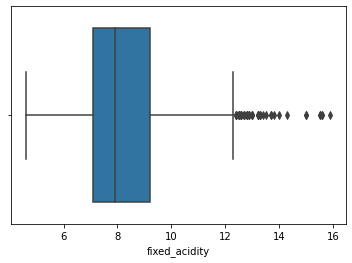

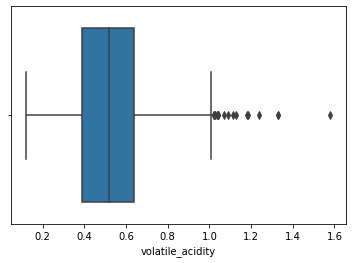

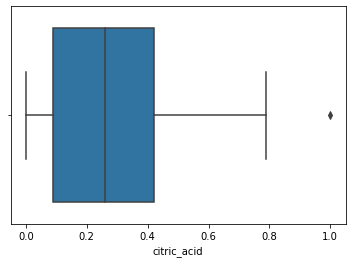

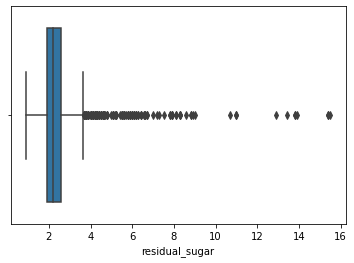

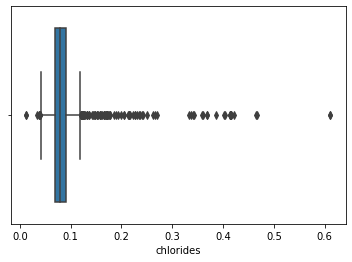

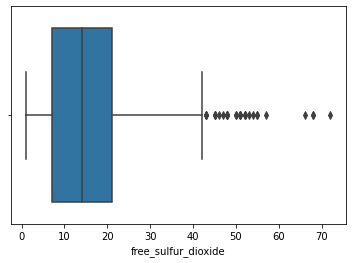

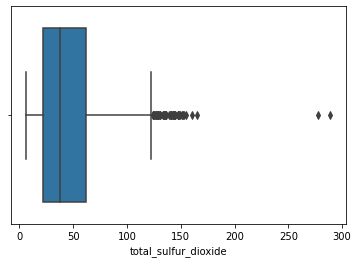

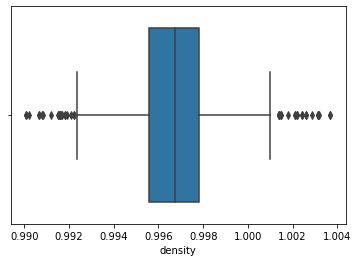

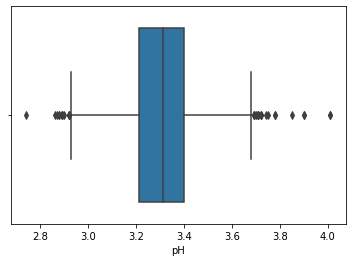

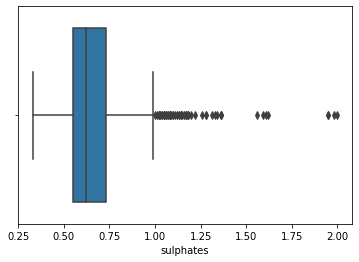

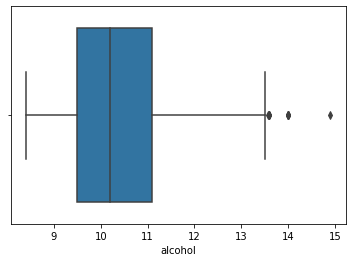

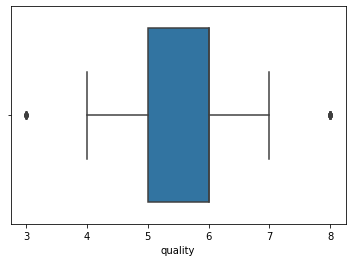

In [211]:
#Boxplots of variables
for column in red_wine:
 sns.boxplot(red_wine[column])
 plt.show()
#There are outliers in all of the columns

In [215]:
#Z-scores
#z-score tells how many standard deviations away from the mean a point is
red_wine.apply(zscore, axis=1).compute()

0       [0.1301543568637609, -0.6038708596628292, -0.6...
1       [-0.1335561693885625, -0.5100823826382272, -0....
2       [-0.03512504706762787, -0.521657917419029, -0....
3       [0.11798518297067949, -0.5587241607715113, -0....
4       [0.1301543568637609, -0.6038708596628292, -0.6...
                              ...                        
1594    [-0.19034637835687632, -0.6017089048670787, -0...
1595    [-0.2612800062456272, -0.5935266545188752, -0....
1596    [-0.1685916564166256, -0.6393685509516198, -0....
1597    [-0.21085623914513144, -0.5972113997892254, -0...
1598    [-0.14815617221954883, -0.6418054768746103, -0...
Length: 1599, dtype: object

In [216]:
#Calculate z-scores to determine the outliers
z_scores=[]
for columns in red_wine:
    print("The column is: {}".format(columns))
    z_scores = zscore(red_wine[columns])
    for threshold in range(1,5):
        print("The score threshold is: {}".format(threshold))
        print("The indices of the outliers:")
        print(np.where(z_scores > threshold))
        print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The column is: fixed_acidity
The score threshold is: 1
The indices of the outliers:
(array([   3,   56,  113,  197,  205,  206,  209,  212,  241,  243,  244,
        250,  252,  264,  265,  269,  271,  272,  277,  278,  280,  286,
        289,  291,  292,  294,  295,  296,  301,  305,  307,  308,  310,
        323,  326,  327,  328,  329,  330,  331,  335,  338,  339,  340,
        341,  342,  343,  344,  347,  350,  353,  356,  357,  358,  359,
        362,  363,  364,  366,  367,  368,  374,  375,  376,  378,  381,
        391,  394,  395,  397,  398,  402,  403,  407,  408,  409,  416,
        418,  423,  429,  430,  432,  433,  434,  435,  437,  438,  440,
        441,  442,  446,  449,  450,  453,  455,  458,  459,  462,  464,
        466,  468,  470,  472,  474,  477,  480,  482,  483,  484,  485,
        486,  487,  488,  495,  498,  501,  502,  503,  504,  505,  506,
        507,  509,  510,  512,  513,  514,  516,  517,  518,  525,  531,
        532,  533,  538,  539,  543,  5

In [217]:
#Calculate IQR, 75 and 25, the 3rd and 1st quartiles
for columns in red_wine:
    q75, q25 = np.percentile(red_wine[columns], [75 ,25])
    iqr = q75 - q25
    print(columns)

    for threshold in np.arange(1,5,0.5):
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
        print("The score threshold is: {}".format(threshold))
        print("Number of outliers is: {}".format(
            len((np.where((red_wine[columns] > max_val) 
                      | (red_wine[columns] < min_val))[0]))
        ))

fixed_acidity
The score threshold is: 1.0
Number of outliers is: 124
The score threshold is: 1.5
Number of outliers is: 49
The score threshold is: 2.0
Number of outliers is: 14
The score threshold is: 2.5
Number of outliers is: 7
The score threshold is: 3.0
Number of outliers is: 5
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0
volatile_acidity
The score threshold is: 1.0
Number of outliers is: 53
The score threshold is: 1.5
Number of outliers is: 19
The score threshold is: 2.0
Number of outliers is: 6
The score threshold is: 2.5
Number of outliers is: 3
The score threshold is: 3.0
Number of outliers is: 1
The score threshold is: 3.5
Number of outliers is: 1
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0
citric_acid
The score threshold is: 1.0
Number of outliers is: 6
The score threshold is: 1.5
Number of outliers is:

### white_wine

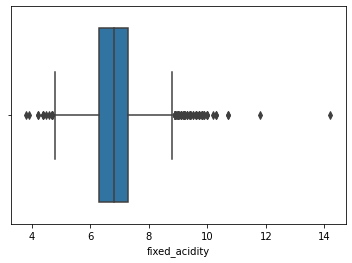

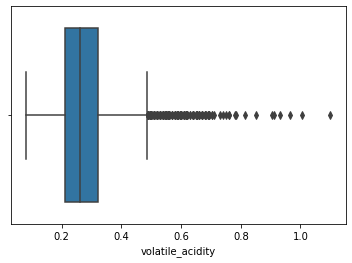

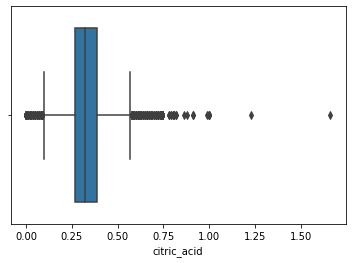

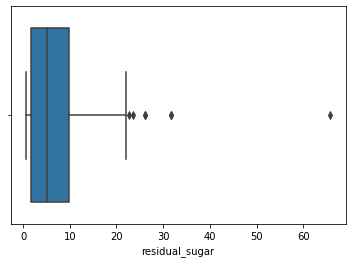

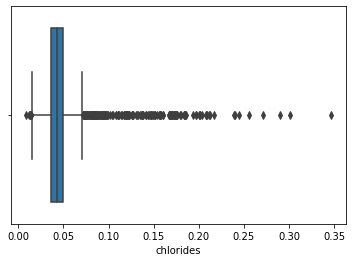

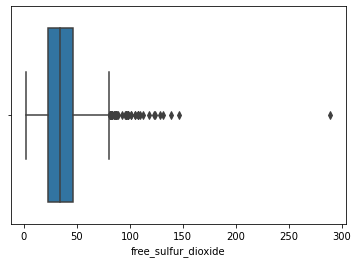

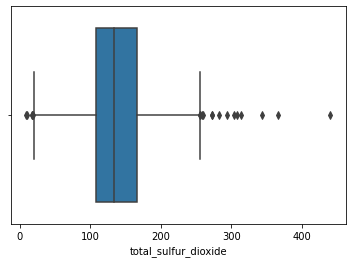

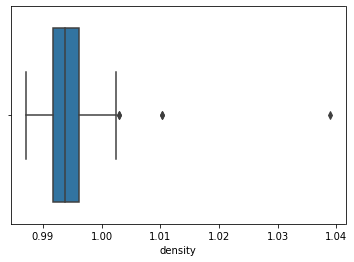

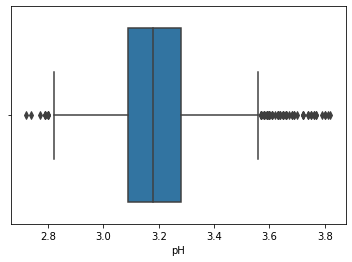

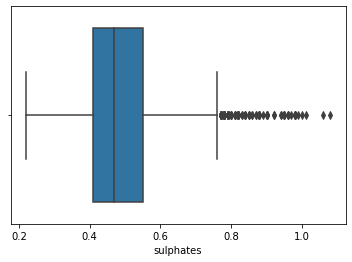

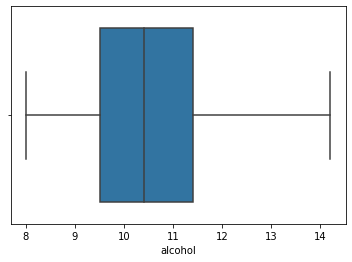

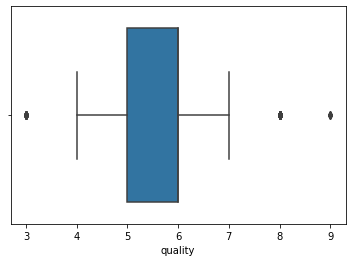

In [218]:
#Boxplots of variables
for column in white_wine:
 sns.boxplot(white_wine[column])
 plt.show()
#There are outliers in the columns, but the "alcohol" column does not have outliers

In [221]:
#Z-scores
#z-score tells how many standard deviations away from the mean a point is
white_wine.apply(zscore, axis=1).compute()

0       [-0.321161937038882, -0.46636497598763593, -0....
1       [-0.23204423365241575, -0.400339589116378, -0....
2       [-0.20960539862074568, -0.5061653827982407, -0...
3       [-0.3006426421749876, -0.43775620879626537, -0...
4       [-0.3006426421749876, -0.43775620879626537, -0...
                              ...                        
4893    [-0.2401342367728891, -0.4802012093717639, -0....
4894    [-0.32225144476986683, -0.4569190708407792, -0...
4895    [-0.2502925303271099, -0.45687690094023503, -0...
4896    [-0.2686754927777193, -0.4441609788148865, -0....
4897    [-0.24436777024306916, -0.4626604093423944, -0...
Length: 4898, dtype: object

In [222]:
#Calculate z-scores to determine the outliers
z_scores=[]
for columns in white_wine:
    print("The column is: {}".format(columns))
    z_scores = zscore(white_wine[columns])
    for threshold in range(1,5):
        print("The score threshold is: {}".format(threshold))
        print("The indices of the outliers:")
        print(np.where(z_scores > threshold))
        print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The column is: fixed_acidity
The score threshold is: 1
The indices of the outliers:
(array([   2,    5,    9,   10,   11,   12,   14,   30,   31,   73,   97,
         98,  121,  136,  139,  142,  143,  144,  150,  154,  166,  169,
        171,  207,  231,  232,  241,  251,  277,  294,  296,  301,  312,
        324,  326,  341,  348,  358,  368,  371,  396,  409,  428,  470,
        492,  504,  505,  511,  514,  520,  521,  535,  536,  547,  551,
        552,  554,  555,  556,  562,  565,  575,  576,  616,  617,  618,
        655,  656,  665,  670,  684,  700,  705,  708,  711,  712,  716,
        724,  732,  774,  776,  779,  781,  783,  786,  787,  790,  796,
        800,  805,  814,  816,  824,  841,  842,  847,  848,  851,  853,
        856,  857,  860,  867,  871,  873,  874,  881,  901,  905,  906,
        908,  914,  917,  919,  921,  922,  924,  930,  939,  946,  947,
        953,  961,  965,  978,  981,  989,  990,  991,  994,  995,  998,
       1000, 1009, 1011, 1012, 1019, 10

In [223]:
#Calculate IQR, 75 and 25, the 3rd and 1st quartiles
for columns in white_wine:
    q75, q25 = np.percentile(white_wine[columns], [75 ,25])
    iqr = q75 - q25
    print(columns)

    for threshold in np.arange(1,5,0.5):
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
        print("The score threshold is: {}".format(threshold))
        print("Number of outliers is: {}".format(
            len((np.where((white_wine[columns] > max_val) 
                      | (white_wine[columns] < min_val))[0]))
        ))

fixed_acidity
The score threshold is: 1.0
Number of outliers is: 335
The score threshold is: 1.5
Number of outliers is: 119
The score threshold is: 2.0
Number of outliers is: 46
The score threshold is: 2.5
Number of outliers is: 12
The score threshold is: 3.0
Number of outliers is: 4
The score threshold is: 3.5
Number of outliers is: 2
The score threshold is: 4.0
Number of outliers is: 2
The score threshold is: 4.5
Number of outliers is: 1
volatile_acidity
The score threshold is: 1.0
Number of outliers is: 339
The score threshold is: 1.5
Number of outliers is: 186
The score threshold is: 2.0
Number of outliers is: 118
The score threshold is: 2.5
Number of outliers is: 73
The score threshold is: 3.0
Number of outliers is: 39
The score threshold is: 3.5
Number of outliers is: 16
The score threshold is: 4.0
Number of outliers is: 10
The score threshold is: 4.5
Number of outliers is: 7
citric_acid
The score threshold is: 1.0
Number of outliers is: 475
The score threshold is: 1.5
Number of 

There are significant outliers in both the red_wine and white_wine datasets. These outliers can affect the analysis, however it is uncertain whether these outliers are from incorrect data collection and entry or whether these outliers represent true and correct variation in the data. 

### Columns in the datasets

Columns in the red_wine dataset

In [224]:
red_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Columns in the white_wine dataset

In [225]:
white_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### "quality" column

Analysis of the original target variable, "quality"

### red_wine

In [227]:
#red_wine
#Number of unique values
red_wine["quality"].nunique().compute()

6

In [228]:
#Unique values in "quality"
red_wine["quality"].unique().compute()

0    5
1    6
2    7
3    4
4    8
5    3
Name: quality, dtype: int64

In [231]:
#Value counts of the values in "quality"
red_wine["quality"].value_counts().compute()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [233]:
#Descriptive statistics of "quality"
red_wine["quality"].describe().compute()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

The minimum rating is 3, the maximum rating is 8. The average rating is 5.64 and 50% of data have ratings less than or equal to 6.

### white_wine

In [235]:
#white_wine
#Number of unique values
white_wine["quality"].nunique().compute()

7

In [236]:
#Unique values in "quality"
white_wine["quality"].unique().compute()

0    6
1    5
2    7
3    8
4    4
5    3
6    9
Name: quality, dtype: int64

In [238]:
#Value counts of the values in "quality"
white_wine["quality"].value_counts().compute()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [239]:
#Descriptive statistics of "quality"
white_wine["quality"].describe().compute()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

The minimum rating is 3, the maximum rating is 9. The average rating is 5.88 and 50% of data have ratings less than or equal to 6.

For both red_wine and white_wine, each unique value of "quality" is not evenly represented in the dataset. While the red_wine dataset is smaller in size than the white_wine dataset, for both datasets the quality ratings of 5 and 6 are much more common than the other ratings. 

In order to have more balanced classes for modeling, I am going to create a new target, "wine_quality", and drop the original target, "quality", from the datasets. 

### "wine_quality" column

New target variable, "wine_quality", is a binary classification of either 0 or 1

### red_wine

For "quality" values of 3, 4 or 5, "wine_quality" value is 0

For "quality" values of 6, 7 or 8, "wine_quality" value is 1

In [10]:
red_wine['wine_rating'] = 0
red_wine['wine_rating'] = red_wine['wine_rating'].mask(red_wine['quality'] >= 6, 1)

In [11]:
red_wine.head(25)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [12]:
#Drop "quality" column
red_wine=red_wine.drop(columns=['quality'])

In [13]:
#Visualize the dataset
red_wine.head(12)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


### white_wine

For "quality" values of 3, 4 or 5, "wine_quality" value is 0

For "quality" values of 6, 7, 8 or 9, "wine_quality" value is 1

In [14]:
white_wine['wine_rating'] = 0
white_wine['wine_rating'] = white_wine['wine_rating'].mask(white_wine['quality'] >= 6, 1)

In [15]:
white_wine.head(40)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_rating
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,1


In [16]:
#Drop "quality" column
white_wine=white_wine.drop(columns=['quality'])

In [17]:
#Visualize the dataset
white_wine.head(12)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_rating
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,1


### Data Types

Data types of the columns in red_wine and white_wine

In [66]:
red_wine.info

<bound method DataFrame.info of Dask DataFrame Structure:
              fixed_acidity volatile_acidity citric_acid residual_sugar chlorides free_sulfur_dioxide total_sulfur_dioxide  density       pH sulphates  alcohol wine_rating
npartitions=1                                                                                                                                                              
                    float64          float64     float64        float64   float64             float64              float64  float64  float64   float64  float64       int64
                        ...              ...         ...            ...       ...                 ...                  ...      ...      ...       ...      ...         ...
Dask Name: drop_by_shallow_copy, 9 tasks>

In [67]:
red_wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
wine_rating               int64
dtype: object

In [68]:
white_wine.info

<bound method DataFrame.info of Dask DataFrame Structure:
              fixed_acidity volatile_acidity citric_acid residual_sugar chlorides free_sulfur_dioxide total_sulfur_dioxide  density       pH sulphates  alcohol wine_rating
npartitions=1                                                                                                                                                              
                    float64          float64     float64        float64   float64             float64              float64  float64  float64   float64  float64       int64
                        ...              ...         ...            ...       ...                 ...                  ...      ...      ...       ...      ...         ...
Dask Name: drop_by_shallow_copy, 9 tasks>

In [69]:
white_wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
wine_rating               int64
dtype: object

In [70]:
print("For red_wine and white_wine, the columns: 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol' and 'wine_rating' are type float64.")

For red_wine and white_wine, the columns: 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol' and 'wine_rating' are type float64.


### Check for balanced categories

Before using supervised learning models, it is important to make sure that the two classes are approximately equally sized

### red_wine

In [72]:
#Size of class 1
red_wine["wine_rating"].sum().compute()

855

In [73]:
#Total size
red_wine["wine_rating"].count().compute()

1599

In [77]:
#Percentage in class 1
((red_wine["wine_rating"].sum()/red_wine["wine_rating"].count())*100).compute()

53.47091932457786

In [79]:
print("In red_wine, {} samples are in class 0 and {} samples are in class 1.".format((red_wine["wine_rating"].count().compute()-red_wine["wine_rating"].sum().compute()), red_wine["wine_rating"].sum().compute()))

In red_wine, 744 samples are in class 0 and 855 samples are in class 1.


### white_wine

In [80]:
#Size of class 1
white_wine["wine_rating"].sum().compute()

3258

In [81]:
#Total size
white_wine["wine_rating"].count().compute()

4898

In [82]:
#Percentage in class 1
((white_wine["wine_rating"].sum()/white_wine["wine_rating"].count())*100).compute()

66.51694569211924

In [83]:
print("In white_wine, {} samples are in class 0 and {} samples are in class 1.".format((white_wine["wine_rating"].count().compute()-white_wine["wine_rating"].sum().compute()), white_wine["wine_rating"].sum().compute()))

In white_wine, 1640 samples are in class 0 and 3258 samples are in class 1.


white_wine is not exactly equally distributed, this will be kept in mind when running and analyzing the models!

### Split the data

y, the target variable, is "wine_rating"

X, the feature set, is all the other variables in the dataset

Use train_test_split to split the data into a train and test set, with 20% of the data in the test set (test_size=0.2)

Set a random state to have reproducible analyses and results (random_state=465)

### red_wine

In [18]:
red_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [19]:
#y is the target
red_y = red_wine["wine_rating"]
#X is the feature set
red_X = red_wine.drop("wine_rating", axis=1)

In [20]:
#double check..
#red_y.compute()

In [21]:
#double check..
#red_X.compute()

In [22]:
#train_test_split
red_X_train, red_X_test, red_y_train, red_y_test = train_test_split(red_X, red_y, test_size = 0.2, random_state = 465)

print("The number of observations in the red_wine training set is {}.".format(red_X_train.shape[0].compute()))
print("The number of observations in the red_wine test set is {}.".format(red_X_test.shape[0].compute()))

The number of observations in the red_wine training set is 1289.
The number of observations in the red_wine test set is 310.


### white_wine

In [23]:
white_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_rating
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [24]:
#y is the target
white_y = white_wine["wine_rating"]
#X is the feature set
white_X = white_wine.drop("wine_rating", axis=1)

In [25]:
#white_X.compute()

In [26]:
#white_y.compute()

In [27]:
#train_test_split
white_X_train, white_X_test, white_y_train, white_y_test = train_test_split(white_X, white_y, test_size = 0.2, random_state = 465)

print("The number of observations in the white_wine training set is {}.".format(white_X_train.shape[0].compute()))
print("The number of observations in the white_wine test set is {}.".format(white_X_test.shape[0].compute()))

The number of observations in the white_wine training set is 3948.
The number of observations in the white_wine test set is 950.


### Winsorize the data

Winsorize the data to transform and limit the extreme values in the dataset to reduce the effect of outliers. A defined portion of either or both the lower or/and upper extremes of the dataset will be converted to the lowest or/and highest value that is not yet considered an outlier.

Winsorize the training and testing data separately to ensure that the testing data does not seep through and contribute to determine what values the winsorization should be at. If the data is not split before winsorization, the model will know a bit about the testing data before it is tested on it (the test data will not be completely unseen by the model).

Winsorize the feature set of the training data first, then winsorize the feature set of the testing data.

The levels for winsorization are determined from the training data. 

### red_wine

In [29]:
#red_wine
#red_X_train
winsorize(red_X_train["fixed_acidity"], (0, 0.04), inplace=True)
winsorize(red_X_train["volatile_acidity"], (0, 0.05), inplace=True)
winsorize(red_X_train["citric_acid"], (0, 0.05), inplace=True)
winsorize(red_X_train["residual_sugar"], (0, 0.10), inplace=True)
winsorize(red_X_train["chlorides"], (0.10, 0.08), inplace=True)
winsorize(red_X_train["free_sulfur_dioxide"], (0, 0.05), inplace=True)
winsorize(red_X_train["total_sulfur_dioxide"], (0, 0.05), inplace=True)
winsorize(red_X_train["density"], (0.05, 0.05), inplace=True)
winsorize(red_X_train["pH"], (0.05, 0.05), inplace=True)
winsorize(red_X_train["sulphates"], (0, 0.05), inplace=True)
winsorize(red_X_train["alcohol"], (0, 0.05), inplace=True)
#winsorize(red_X_train["quality"], (0, 0), inplace=True)

masked_array(data=[ 9.4,  9.8,  9.8, ..., 11. , 10.2, 11. ],
             mask=False,
       fill_value=1e+20)

In [30]:
#red_wine
#red_X_test
winsorize(red_X_test["fixed_acidity"], (0, 0.04), inplace=True)
winsorize(red_X_test["volatile_acidity"], (0, 0.05), inplace=True)
winsorize(red_X_test["citric_acid"], (0, 0.05), inplace=True)
winsorize(red_X_test["residual_sugar"], (0, 0.10), inplace=True)
winsorize(red_X_test["chlorides"], (0.10, 0.08), inplace=True)
winsorize(red_X_test["free_sulfur_dioxide"], (0, 0.05), inplace=True)
winsorize(red_X_test["total_sulfur_dioxide"], (0, 0.05), inplace=True)
winsorize(red_X_test["density"], (0.05, 0.05), inplace=True)
winsorize(red_X_test["pH"], (0.05, 0.05), inplace=True)
winsorize(red_X_test["sulphates"], (0, 0.05), inplace=True)
winsorize(red_X_test["alcohol"], (0, 0.05), inplace=True)
#winsorize(red_X_test["quality"], (0, 0), inplace=True)

masked_array(data=[ 9.8       ,  9.4       , 10.        , 10.5       ,
                    9.        ,  9.4       ,  9.4       ,  9.2       ,
                    9.5       ,  9.2       ,  9.2       ,  9.6       ,
                    9.4       , 10.9       , 10.7       , 10.7       ,
                    9.6       , 10.1       ,  9.4       ,  9.5       ,
                    9.        ,  9.8       ,  9.2       , 10.5       ,
                    9.4       ,  9.5       ,  9.5       , 10.5       ,
                    9.2       ,  9.5       , 10.5       ,  9.5       ,
                    9.2       ,  9.7       ,  9.5       ,  9.8       ,
                    9.7       , 10.1       , 10.8       ,  9.8       ,
                    9.        ,  9.        ,  9.9       , 10.5       ,
                    9.3       ,  9.4       ,  9.8       , 10.1       ,
                    9.8       , 10.5       ,  9.4       ,  9.5       ,
                   11.        , 10.4       ,  9.7       ,  9.2       ,
      

### white_wine

In [32]:
#white_wine
#white_X_train
winsorize(white_X_train["fixed_acidity"], (0.04, 0.04), inplace=True)
winsorize(white_X_train["volatile_acidity"], (0, 0.05), inplace=True)
winsorize(white_X_train["citric_acid"], (0.04, 0.05), inplace=True)
winsorize(white_X_train["residual_sugar"], (0, 0.10), inplace=True)
winsorize(white_X_train["chlorides"], (0.10, 0.08), inplace=True)
winsorize(white_X_train["free_sulfur_dioxide"], (0, 0.05), inplace=True)
winsorize(white_X_train["total_sulfur_dioxide"], (0.01, 0.05), inplace=True)
winsorize(white_X_train["density"], (0, 0.05), inplace=True)
winsorize(white_X_train["pH"], (0.05, 0.05), inplace=True)
winsorize(white_X_train["sulphates"], (0, 0.05), inplace=True)
winsorize(white_X_train["alcohol"], (0, 0), inplace=True)
#winsorize(white_X_train["quality"], (0, 0), inplace=True)

masked_array(data=[ 8.8, 10.1,  9.9, ...,  9.4, 12.8, 11.8],
             mask=False,
       fill_value=1e+20)

In [33]:
#white_wine
#white_X_test
winsorize(white_X_test["fixed_acidity"], (0.04, 0.04), inplace=True)
winsorize(white_X_test["volatile_acidity"], (0, 0.05), inplace=True)
winsorize(white_X_test["citric_acid"], (0.04, 0.05), inplace=True)
winsorize(white_X_test["residual_sugar"], (0, 0.10), inplace=True)
winsorize(white_X_test["chlorides"], (0.10, 0.08), inplace=True)
winsorize(white_X_test["free_sulfur_dioxide"], (0, 0.05), inplace=True)
winsorize(white_X_test["total_sulfur_dioxide"], (0.01, 0.05), inplace=True)
winsorize(white_X_test["density"], (0, 0.05), inplace=True)
winsorize(white_X_test["pH"], (0.05, 0.05), inplace=True)
winsorize(white_X_test["sulphates"], (0, 0.05), inplace=True)
winsorize(white_X_test["alcohol"], (0, 0), inplace=True)
#winsorize(white_X_test["quality"], (0, 0), inplace=True)

masked_array(data=[ 9.5       ,  9.6       ,  8.8       , 11.        ,
                   11.3       , 12.8       ,  9.3       ,  9.8       ,
                    9.8       ,  9.8       ,  9.8       ,  9.6       ,
                    9.9       ,  9.1       ,  9.8       , 10.7       ,
                   10.7       ,  9.3       ,  9.5       ,  8.7       ,
                    8.7       ,  9.2       ,  9.7       , 10.9       ,
                   10.6       , 11.8       ,  8.7       ,  8.9       ,
                   11.        , 12.6       ,  9.4       ,  9.3       ,
                    9.9       , 11.        , 12.7       ,  8.7       ,
                    9.1       ,  8.9       ,  8.8       ,  9.1       ,
                    9.        ,  9.6       , 10.        ,  8.7       ,
                   10.2       ,  8.9       ,  9.2       , 10.6       ,
                    8.8       , 10.5       , 12.5       , 10.        ,
                   10.        , 10.5       , 10.5       , 11.4       ,
      

### StandardScaler

StandardScaler standardizes features by removing the mean and scaling the data (mean of 0 and standard deviation of 1). It is important to use StandardScaler as the units for the features and target of this data are not uniform. This can lead to more emphasis placed on certain features (more emphasis placed on smaller distances) in algorithmns that use distance in their calculations. 

In [34]:
standard_scaler = StandardScaler()

Fit and transform the training data (X, features) and then transform the testing data (X, features).

### red_wine

In [35]:
red_X_train = standard_scaler.fit_transform(red_X_train)

In [36]:
red_X_test = standard_scaler.transform(red_X_test)

In [39]:
type(red_X_train)

numpy.ndarray

In [40]:
#convery numpy array to dask dataframe
red_X_train=dd.from_array(red_X_train)

In [41]:
#convery numpy array to dask dataframe
red_X_test=dd.from_array(red_X_test)

In [42]:
type(red_X_train)

dask.dataframe.core.DataFrame

### white_wine

In [43]:
white_X_train = standard_scaler.fit_transform(white_X_train)

In [44]:
white_X_test = standard_scaler.transform(white_X_test)

In [45]:
#convery numpy array to dask dataframe
white_X_train=dd.from_array(white_X_train)

In [46]:
#convery numpy array to dask dataframe
white_X_test=dd.from_array(white_X_test)

## Supervised Learning Models

### red_wine

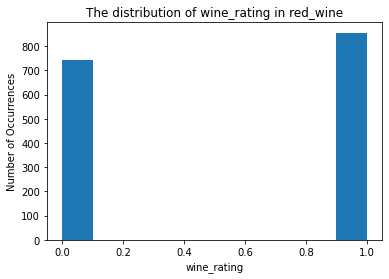

In [57]:
#Histogram of the target variable, "wine_rating"
plt.hist(red_wine.wine_rating)
plt.title("The distribution of wine_rating in red_wine")
plt.xlabel("wine_rating")
plt.ylabel("Number of Occurrences")
plt.show()

In [46]:
#Value counts for the target variable, "wine_rating"
red_wine.wine_rating.value_counts().compute()

1    855
0    744
Name: wine_rating, dtype: int64

In [47]:
#Descriptive statistics for the target variable, "wine_rating"
red_wine["wine_rating"].describe().compute()

count    1599.000000
mean        0.534709
std         0.498950
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: wine_rating, dtype: float64

In [149]:
#Correlations between variables in red_wine
red_wine.corr().compute()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_rating
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072


In [151]:
#Correlations between variables and "wine_rating" in red_wine
red_wine.corr()['wine_rating'].compute()

fixed_acidity           0.095093
volatile_acidity       -0.321441
citric_acid             0.159129
residual_sugar         -0.002160
chlorides              -0.109494
free_sulfur_dioxide    -0.061757
total_sulfur_dioxide   -0.231963
density                -0.159110
pH                     -0.003264
sulphates               0.218072
alcohol                 0.434751
wine_rating             1.000000
Name: wine_rating, dtype: float64

The variables with correlations to wine_rating greater than or equal to the absolute value of 0.10:

volatile_acidity (-0.321), citric_acid (0.159), chlorides (-0.109), total_sulfur_dioxide (-0.231), density (-0.159), sulphates (0.218), alcohol (0.434)

### 1. What are the 6 features most correlated with wine quality?

In the red_wine dataset, the 6 features most correlated with wine quality are alcohol, volatile acidity, total sulfur dioxide, sulphates, citric acid and density.

### Logistic Regression Model

Logistic Regression is a linear classifier for binary classification problems for categorical or continuous variables.

### Logistic Regression Model

In [47]:
lr = LogisticRegression()

with joblib.parallel_backend('dask'):
    lr.fit(red_X_train.values.compute(), red_y_train.values.compute())
    
preds_train = lr.predict(red_X_train.values.compute())
preds_test = lr.predict(red_X_test.values.compute())

print("Logistic regression ROC AUC training score is: ", roc_auc_score(preds_train, red_y_train.values.compute()))
print("Logistic regression ROC AUC test score is: ", roc_auc_score(preds_test, red_y_test.values.compute()))

Logistic regression ROC AUC training score is:  0.7515560793576272
Logistic regression ROC AUC test score is:  0.7066724978133201


In [48]:
start_time=time.time()
print("Logistic Regression Model")
print("")
#Logistic Regression Model
#Training Data
logisticrm = LogisticRegression()


with joblib.parallel_backend('dask'):
#Fit model
    logisticrm.fit(red_X_train.values.compute(), red_y_train.values.compute())

print("~~~Training Data~~~")
print("")

#Logistic Regression Score
logisticrm_training_score = logisticrm.score(red_X_train.values.compute(), red_y_train.values.compute())
print("Logistic Regression Model Training Score: {}".format(logisticrm_training_score))
print("")

#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(logisticrm, red_X_train.values.compute(), red_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(logisticrm, red_X_train.values.compute(), red_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(logisticrm, red_X_train.values.compute(), red_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")

#Predictions
red_X_train_predictions = logisticrm.predict(red_X_train.values.compute())
#Classification Report
red_train_classification_report = classification_report(red_y_train.values.compute(), red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion Matrix
red_train_confusion_matrix = confusion_matrix(red_y_train.values.compute(), red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")

print("~~~Testing Data~~~")
print("")
#Testing Data
#Logistic Regression Score
logisticrm_testing_score = logisticrm.score(red_X_test.values.compute(), red_y_test.values.compute())
print("Logistic Regression Model Testing Score: {}".format(logisticrm_testing_score))
print("")
#Test data
red_X_test_predictions = logisticrm.predict(red_X_test.values.compute())

red_test_classification_report = classification_report(red_y_test.values.compute(), red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test.values.compute(), red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test.values.compute(),red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test.values.compute(),red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test.values.compute(),red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test.values.compute(),red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Logistic Regression Model

~~~Training Data~~~

Logistic Regression Model Training Score: 0.7532971295577967

Accuracy
[0.68604651 0.74031008 0.77906977 0.75581395 0.72373541]
cv_scores_accuracy mean: 0.7369951437275661

Precision
[0.7979798  0.74496644 0.79856115 0.73053892 0.72666667]
cv_scores_precision mean: 0.759742596166862

Recall
[0.56428571 0.79285714 0.79285714 0.87142857 0.78417266]
cv_scores_recall mean: 0.761120246659815

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       590
           1       0.78      0.77      0.77       699

    accuracy                           0.75      1289
   macro avg       0.75      0.75      0.75      1289
weighted avg       0.75      0.75      0.75      1289


Confusion Matrix:
[[435 155]
 [163 536]]


~~~Testing Data~~~

Logistic Regression Model Testing Score: 0.7064516129032258

Classification Report:
              precision    recall  f1-score   support

        

Logistic Regression Model 

Test Data Confusion Matrix:

True Negatives = 111

False Negatives = 48

False Positives = 43

True Positives = 108

Test Data: 

Accuracy Score: 0.7064516129032258

Precision Score: 0.7152317880794702

Recall Score: 0.6923076923076923

ROC AUC Score: 0.7065434565434565

The model took 6.166955232620239 to run.

*Running the Logistic Regression Model with only the features that have a correlation greater than or equal to the absolute value of 0.10 with "wine_rating" did not show an improvement in the performance of the model.

### K-Nearest Neighbors (KNN)

K-Nearest Neighbors can be used for both classification and regression problems. In classification problems, a data point is compared to its k (an integer) closest neighbors and is classified as part of the majority class.

### K-Nearest Neighbors (KNN) Classification Model

In [49]:
knn_classification_model = neighbors.KNeighborsClassifier()


with joblib.parallel_backend('dask'):
    knn_classification_model.fit(red_X_train.values.compute(), red_y_train.values.compute())
    
preds_train = knn_classification_model.predict(red_X_train.values.compute())
preds_test = knn_classification_model.predict(red_X_test.values.compute())

print("Logistic regression ROC AUC training score is: ", roc_auc_score(preds_train, red_y_train.values.compute()))
print("Logistic regression ROC AUC test score is: ", roc_auc_score(preds_test, red_y_test.values.compute()))

Logistic regression ROC AUC training score is:  0.8169468837797684
Logistic regression ROC AUC test score is:  0.724932591843613


In [50]:
start_time=time.time()
print("K-Nearest Neighbors (KNN) Classification Model")
print("")
#KNN Classification Model
#Training Data


with joblib.parallel_backend('dask'):
    knn_classification_model = neighbors.KNeighborsClassifier()

#Fit the model
knn_classification_model.fit(red_X_train.values.compute(), red_y_train.values.compute())

print("~~~Training Data~~~")
print("")
#KNN Classification Score
knn_classification_model_training_score = knn_classification_model.score(red_X_train.values.compute(), red_y_train.values.compute())
print("KNN Classification Model Training Score: {}".format(knn_classification_model_training_score))
print("")

#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(knn_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(knn_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(knn_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
red_X_train_predictions = knn_classification_model.predict(red_X_train.values.compute())

#Classification report
red_train_classification_report = classification_report(red_y_train.values.compute(), red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion matrix
red_train_confusion_matrix = confusion_matrix(red_y_train.values.compute(), red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Logistic Regression Score
knn_classification_model_testing_score = knn_classification_model.score(red_X_test.values.compute(), red_y_test.values.compute())
print("KNN Classification Model Testing Score: {}".format(knn_classification_model_testing_score))
print("")
red_X_test_predictions = knn_classification_model.predict(red_X_test.values.compute())
red_test_classification_report = classification_report(red_y_test.values.compute(), red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test.values.compute(), red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test.values.compute(),red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test.values.compute(),red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test.values.compute(),red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test.values.compute(),red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

K-Nearest Neighbors (KNN) Classification Model

~~~Training Data~~~

KNN Classification Model Training Score: 0.8169123351435221

Accuracy
[0.64728682 0.70155039 0.72868217 0.65891473 0.6381323 ]
cv_scores_accuracy mean: 0.6749132808493952

Precision
[0.70588235 0.70588235 0.72727273 0.64606742 0.63855422]
cv_scores_precision mean: 0.6847318131505775

Recall
[0.6        0.77142857 0.8        0.82142857 0.76258993]
cv_scores_recall mean: 0.7510894141829394

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       590
           1       0.82      0.85      0.83       699

    accuracy                           0.82      1289
   macro avg       0.82      0.81      0.81      1289
weighted avg       0.82      0.82      0.82      1289


Confusion Matrix:
[[456 134]
 [102 597]]


~~~Testing Data~~~

KNN Classification Model Testing Score: 0.7225806451612903

Classification Report:
              precision    recall  f1-scor

K-Nearest Neighbors (KNN) Classification Model 

Test Data Confusion Matrix:

True Negatives = 103

False Negatives = 35

False Positives = 51

True Positives = 121

Test Data: 

Accuracy Score: 0.7225806451612903

Precision Score: 0.7034883720930233

Recall Score:  0.7756410256410257

ROC AUC Score:  0.7222360972360972

The model took 1.2244601249694824 to run.

### K-Nearest Neighbors (KNN) Classification Model with Gridsearch

In [51]:
start_time=time.time()
#Grid search for k value
params_knn_classification_grid = {'n_neighbors': np.arange(1,101)}

knn_classification = neighbors.KNeighborsClassifier()

knn_classification_gridsearch = GridSearchCV(knn_classification, params_knn_classification_grid, cv=5)

with joblib.parallel_backend('dask'):
    knn_classification.fit(red_X_train.values.compute(), red_y_train.values.compute())

#Fit the model to the training data
knn_classification_gridsearch.fit(red_X_train.values.compute(), red_y_train.values.compute())

#Best k value, from the model
knn_classification_gridsearch_parameters = knn_classification_gridsearch.best_params_

print("Best parameter: {}".format(knn_classification_gridsearch_parameters))

Best parameter: {'n_neighbors': 94}


In [52]:
print("K-Nearest Neighbors (KNN) Classification Model with Gridsearch")
print("")
#KNN Classification Model
#Training Data

#Run the classification model (n_neighbors=94)
knn_classification_model = neighbors.KNeighborsClassifier (n_neighbors=94)

with joblib.parallel_backend('dask'):
    knn_classification_model.fit(red_X_train.values.compute(), red_y_train.values.compute())

print("~~~Training Data~~~")
print("")
#Training Data
#KNN Classification Score
knn_classification_model_training_score = knn_classification_model.score(red_X_train.values.compute(), red_y_train.values.compute())
print("KNN Classification Model with Gridsearch Training Score: {}".format(knn_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(knn_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(knn_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(knn_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
red_X_train_predictions = knn_classification_model.predict(red_X_train.values.compute())

#Classification Report
red_train_classification_report = classification_report(red_y_train.values.compute(), red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion Matrix
red_train_confusion_matrix = confusion_matrix(red_y_train.values.compute(), red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Logistic Regression Score
knn_classification_model_testing_score = knn_classification_model.score(red_X_test, red_y_test.values.compute())
print("KNN Classification Model with Gridsearch Testing Score: {}".format(knn_classification_model_testing_score))
print("")
#Test data
red_X_test_predictions = knn_classification_model.predict(red_X_test)

red_test_classification_report = classification_report(red_y_test.values.compute(), red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test.values.compute(), red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy score: {}".format(accuracy_score(red_y_test.values.compute(),red_X_test_predictions)))
#Precision Score
print("Precision score: {}".format(precision_score(red_y_test.values.compute(),red_X_test_predictions)))
#Recall Score
print("Recall score: {}".format(recall_score(red_y_test.values.compute(),red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test.values.compute(),red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

K-Nearest Neighbors (KNN) Classification Model with Gridsearch

~~~Training Data~~~

KNN Classification Model with Gridsearch Training Score: 0.7424359968968193

Accuracy
[0.7248062  0.73255814 0.75581395 0.73643411 0.74319066]
cv_scores_accuracy mean: 0.7385606129158748

Precision
[0.78512397 0.73202614 0.76551724 0.70689655 0.73248408]
cv_scores_precision mean: 0.7444095960539135

Recall
[0.67857143 0.8        0.79285714 0.87857143 0.82733813]
cv_scores_recall mean: 0.7954676258992806

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       590
           1       0.75      0.80      0.77       699

    accuracy                           0.74      1289
   macro avg       0.74      0.74      0.74      1289
weighted avg       0.74      0.74      0.74      1289


Confusion Matrix:
[[401 189]
 [143 556]]


~~~Testing Data~~~

KNN Classification Model with Gridsearch Testing Score: 0.7258064516129032

Classification Re

K-Nearest Neighbors (KNN) Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 110

False Negatives = 41

False Positives = 44

True Positives = 115

Test Data: 

Accuracy score: 0.7258064516129032

Precision score: 0.7232704402515723

Recall score: 0.7371794871794872

ROC AUC Score: 0.7257326007326007

The model took 23.61709690093994 to run.

### K-Nearest Neighbors (KNN) Weighted Classification

In the weighted K-Nearest Neighbors Classification, more weight is given to closer data points and less weight is given to further data points from the point that is being classified.

In [53]:
start_time=time.time()
print("K-Nearest Neighbors (KNN) Weighted Classification Model")
print("")
#KNN Weighted Classification Model

knn_classification_weighted_model = neighbors.KNeighborsClassifier (weights='distance')
#Training Data
#Fit the model
with joblib.parallel_backend('dask'):
    knn_classification_weighted_model.fit(red_X_train.values.compute(), red_y_train.values.compute())
print("")



print("~~~Training Data~~~")
print("")
#Training Data
#Weighted KNN Classification Score
knn_classification_weighted_model_training_score = knn_classification_weighted_model.score(red_X_train.values.compute(), red_y_train.values.compute())
print("KNN Weighted Classification Model Training Score: {}".format(knn_classification_weighted_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(knn_classification_weighted_model, red_X_train.values.compute(), red_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(knn_classification_weighted_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(knn_classification_weighted_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
red_X_train_predictions = knn_classification_weighted_model.predict(red_X_train)

#Classification Report
red_train_classification_report = classification_report(red_y_train.values.compute(), red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion Matrix
red_train_confusion_matrix = confusion_matrix(red_y_train.values.compute(), red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Weighted KNN Classification Score
knn_classification_weighted_model_testing_score = knn_classification_weighted_model.score(red_X_test.values.compute(), red_y_test.values.compute())
print("KNN Weighted Classification Model Testing Score: {}".format(knn_classification_weighted_model_testing_score))
print("")
#Predictions
red_X_test_predictions = knn_classification_weighted_model.predict(red_X_test.values.compute())

red_test_classification_report = classification_report(red_y_test.values.compute(), red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test.values.compute(), red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test.values.compute(),red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test.values.compute(),red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test.values.compute(),red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test.values.compute(),red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

K-Nearest Neighbors (KNN) Weighted Classification Model


~~~Training Data~~~

KNN Weighted Classification Model Training Score: 1.0

Accuracy
[0.63953488 0.69767442 0.72868217 0.6744186  0.6381323 ]
cv_scores_accuracy mean: 0.6756884746478449

Precision
[0.7008547  0.7012987  0.73333333 0.65384615 0.63855422]
cv_scores_precision mean: 0.6855774212400718

Recall
[0.58571429 0.77142857 0.78571429 0.85       0.76258993]
cv_scores_recall mean: 0.7510894141829394

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       590
           1       1.00      1.00      1.00       699

    accuracy                           1.00      1289
   macro avg       1.00      1.00      1.00      1289
weighted avg       1.00      1.00      1.00      1289


Confusion Matrix:
[[590   0]
 [  0 699]]


~~~Testing Data~~~

KNN Weighted Classification Model Testing Score: 0.7709677419354839

Classification Report:
              precision    re

K-Nearest Neighbors (KNN) Weighted Classification Model 

Test Data Confusion Matrix:

True Negatives = 111

False Negatives = 28

False Positives = 43

True Positives = 128

Test Data: 

Accuracy Score: 0.7709677419354839

Precision Score: 0.7485380116959064

Recall Score: 0.8205128205128205

ROC AUC Score: 0.7706460206460206

The model took 1.1044700145721436 to run.

### K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch

In [54]:
start_time=time.time()
#KNN Classification with Distance Weights
#Grid search for k value
params_knn_classification_weighted_grid = {'n_neighbors': np.arange(1,101)}

knn_classification_weighted = neighbors.KNeighborsClassifier(weights='distance')

knn_classification_weighted_gridsearch = GridSearchCV(knn_classification_weighted, params_knn_classification_weighted_grid, cv=5)

with joblib.parallel_backend('dask'):
#Fit the model to the training data
    knn_classification_weighted.fit(red_X_train.values.compute(), red_y_train.values.compute())

knn_classification_weighted_gridsearch.fit(red_X_train.values.compute(), red_y_train.values.compute())

#Best k value, from the model
knn_classification_weighted_gridsearch_parameters = knn_classification_weighted_gridsearch.best_params_

print("Best parameter: {}".format(knn_classification_weighted_gridsearch_parameters))

Best parameter: {'n_neighbors': 95}


In [55]:
print("K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch")
print("")
#Run a weighted classification model (n_neighbors=95)
knn_classification_weighted_model = neighbors.KNeighborsClassifier (n_neighbors= 95, weights='distance')

with joblib.parallel_backend('dask'):
#Training Data
    knn_classification_weighted_model.fit(red_X_train.values.compute(), red_y_train.values.compute())

print("~~~Training Data~~~")
print("")
#KNN Weighted Classification Score
knn_classification_weighted_model_training_score = knn_classification_weighted_model.score(red_X_train.values.compute(), red_y_train.values.compute())
print("KNN Weighted Classification Model with Gridsearch Training Score: {}".format(knn_classification_weighted_model_training_score))
print("")

#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(knn_classification_weighted_model, red_X_train.values.compute(), red_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(knn_classification_weighted_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(knn_classification_weighted_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
red_X_train_predictions = knn_classification_weighted_model.predict(red_X_train.values.compute())

#Classification Report
red_train_classification_report = classification_report(red_y_train.values.compute(), red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion Matrix
red_train_confusion_matrix = confusion_matrix(red_y_train.values.compute(), red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#KNN Weighted Classification Score
knn_classification_weighted_model_testing_score = knn_classification_weighted_model.score(red_X_test.values.compute(), red_y_test.values.compute())
print("KNN Weighted Classification Model with Gridsearch Testing Score: {}".format(knn_classification_weighted_model_testing_score))
print("")
#Predictions
red_X_test_predictions = knn_classification_weighted_model.predict(red_X_test.values.compute())

red_test_classification_report = classification_report(red_y_test.values.compute(), red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test.values.compute(), red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test.values.compute(),red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test.values.compute(),red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test.values.compute(),red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test.values.compute(),red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch

~~~Training Data~~~

KNN Weighted Classification Model with Gridsearch Training Score: 1.0

Accuracy
[0.73643411 0.72868217 0.75193798 0.72868217 0.74319066]
cv_scores_accuracy mean: 0.7377854191174252

Precision
[0.8        0.72727273 0.75675676 0.69886364 0.72670807]
cv_scores_precision mean: 0.7419202389854564

Recall
[0.68571429 0.8        0.8        0.87857143 0.84172662]
cv_scores_recall mean: 0.80120246659815

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       590
           1       1.00      1.00      1.00       699

    accuracy                           1.00      1289
   macro avg       1.00      1.00      1.00      1289
weighted avg       1.00      1.00      1.00      1289


Confusion Matrix:
[[590   0]
 [  0 699]]


~~~Testing Data~~~

KNN Weighted Classification Model with Gridsearch Testing Score: 0.7903225806451613

Classif

K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 116

False Negatives = 27

False Positives = 38

True Positives = 129

Test Data: 

Accuracy Score: 0.7903225806451613

Precision Score: 0.7724550898203593

Recall Score: 0.8269230769230769

ROC AUC Score: 0.7900849150849151

The model took 19.839478015899658 to run.

### Decision Tree

Decision Trees can be used for both classification and regression problems. In classification, decision trees partition data into subsets based on classification features until homogeneous classes are left. 

### Decision Tree Classification

In [56]:
start_time=time.time()
print("Decision Tree Classification Model")
print("")
#Decision Tree Classification Model

#Training Data
decision_tree_classification_model = tree.DecisionTreeClassifier()

with joblib.parallel_backend('dask'):
#Fit the Model
    decision_tree_classification_model.fit(red_X_train.values.compute(), red_y_train.values.compute())

print("~~~Training Data~~~")
print("")
#Training Data
#Decision Tree Classification Score
decision_tree_classification_model_training_score = decision_tree_classification_model.score(red_X_train.values.compute(), red_y_train.values.compute())
print("Decision Tree Classification Model Training Score: {}".format(decision_tree_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(decision_tree_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(decision_tree_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(decision_tree_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
red_X_train_predictions = decision_tree_classification_model.predict(red_X_train)

#Classification Report
red_train_classification_report = classification_report(red_y_train.values.compute(), red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion Matrix
red_train_confusion_matrix = confusion_matrix(red_y_train.values.compute(), red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Decision Tree Score
decision_tree_classification_model_testing_score = decision_tree_classification_model.score(red_X_test.values.compute(), red_y_test.values.compute())
print("Decision Tree Classification Model Testing Score: {}".format(decision_tree_classification_model_testing_score))
print("")
#Predictions
red_X_test_predictions = decision_tree_classification_model.predict(red_X_test)

red_test_classification_report = classification_report(red_y_test.values.compute(), red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test.values.compute(), red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test.values.compute(),red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test.values.compute(),red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test.values.compute(),red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test.values.compute(),red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Decision Tree Classification Model

~~~Training Data~~~

Decision Tree Classification Model Training Score: 1.0

Accuracy
[0.60852713 0.64728682 0.62015504 0.64728682 0.59143969]
cv_scores_accuracy mean: 0.6229391005338883

Precision
[0.64814815 0.64848485 0.7265625  0.65189873 0.62962963]
cv_scores_precision mean: 0.6609447720879682

Recall
[0.47857143 0.74285714 0.67142857 0.72142857 0.61151079]
cv_scores_recall mean: 0.6451593011305242

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       590
           1       1.00      1.00      1.00       699

    accuracy                           1.00      1289
   macro avg       1.00      1.00      1.00      1289
weighted avg       1.00      1.00      1.00      1289


Confusion Matrix:
[[590   0]
 [  0 699]]


~~~Testing Data~~~

Decision Tree Classification Model Testing Score: 0.7129032258064516

Classification Report:
              precision    recall  f1-score   sup

Decision Tree Classification Model 

Test Data Confusion Matrix:

True Negatives = 104

False Negatives = 39

False Positives = 50

True Positives = 117

Test Data: 

Accuracy Score: 0.7129032258064516

Precision Score: 0.7005988023952096

Recall Score: 0.75

ROC AUC Score: 0.7126623376623377

The model took 0.8983287811279297 to run.

### Decision Tree Classification with Gridsearch

In [57]:
start_time=time.time()
#Decision Tree Classification
#Grid search for max_depth, min_samples_split and max_features
params_decision_tree_classification_grid = {'max_depth': np.arange(1,21), 'min_samples_split': np.arange(1,21), 'max_features': np.arange(1,21)}

decision_tree_classification = tree.DecisionTreeClassifier()

decision_tree_classification_gridsearch = GridSearchCV(decision_tree_classification, params_decision_tree_classification_grid, cv=5)

with joblib.parallel_backend('dask'):
#Fit the model to the training data
    decision_tree_classification.fit(red_X_train.values.compute(), red_y_train.values.compute())

decision_tree_classification_gridsearch.fit(red_X_train.values.compute(), red_y_train.values.compute())

#Best values, from the model
decision_tree_gridsearch_parameters = decision_tree_classification_gridsearch.best_params_

print("Best parameters: {}".format(decision_tree_gridsearch_parameters))

Best parameters: {'max_depth': 5, 'max_features': 9, 'min_samples_split': 19}


In [58]:
print("Decision Tree Classification Model with Gridsearch")
print("")
#Run the decision tree classification model (max_depth=5, max_features=9, min_samples_split=19)
decision_tree_classification_model = tree.DecisionTreeClassifier(max_depth=5, max_features=9, min_samples_split=19)
#Training Data
with joblib.parallel_backend('dask'):
#Fit to the model
    decision_tree_classification_model.fit(red_X_train.values.compute(), red_y_train.values.compute())


print("~~~Training Data~~~")
print("")
#Training Data
#Decision Tree Classification Score
decision_tree_classification_model_training_score = decision_tree_classification_model.score(red_X_train.values.compute(), red_y_train.values.compute())
print("Decision Tree Classification Model with Gridsearch Training Score: {}".format(decision_tree_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(decision_tree_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(decision_tree_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(decision_tree_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
red_X_train_predictions = decision_tree_classification_model.predict(red_X_train.values.compute())

#Classification Report
red_train_classification_report = classification_report(red_y_train.values.compute(), red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion Matrix
red_train_confusion_matrix = confusion_matrix(red_y_train.values.compute(), red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Decision Tree Classification Score
decision_tree_classification_model_testing_score = decision_tree_classification_model.score(red_X_test.values.compute(), red_y_test.values.compute())
print("Decision Tree Classification Model with Gridsearch Testing Score: {}".format(decision_tree_classification_model_testing_score))
print("")
#Test data
red_X_test_predictions = decision_tree_classification_model.predict(red_X_test.values.compute())

red_test_classification_report = classification_report(red_y_test.values.compute(), red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test.values.compute(), red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test.values.compute(),red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test.values.compute(),red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test.values.compute(),red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test.values.compute(),red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Decision Tree Classification Model with Gridsearch

~~~Training Data~~~

Decision Tree Classification Model with Gridsearch Training Score: 0.7757951900698216

Accuracy
[0.63178295 0.68604651 0.7751938  0.69379845 0.6848249 ]
cv_scores_accuracy mean: 0.6943293216300184

Precision
[0.80412371 0.73611111 0.76223776 0.70552147 0.6746988 ]
cv_scores_precision mean: 0.736538570452488

Recall
[0.58571429 0.75714286 0.77857143 0.85       0.67625899]
cv_scores_recall mean: 0.7295375128468654

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       590
           1       0.79      0.79      0.79       699

    accuracy                           0.78      1289
   macro avg       0.77      0.77      0.77      1289
weighted avg       0.78      0.78      0.78      1289


Confusion Matrix:
[[447 143]
 [146 553]]


~~~Testing Data~~~

Decision Tree Classification Model with Gridsearch Testing Score: 0.7096774193548387

Classifica

Decision Tree Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 111

False Negatives = 47

False Positives = 43

True Positives = 109

Test Data: 

Accuracy Score: 0.7096774193548387

Precision Score: 0.7171052631578947

Recall Score: 0.6987179487179487

ROC AUC Score: 0.7097485847485847

The model took 135.9269471168518 to run.

### Random Forest

Random Forests are an ensemble method that can be used for both classification and regression problems. In classification, random forests consist of many decision trees and classify a point based on the mode across decision trees. 

### Random Forest Classification Model

In [63]:
random_forest_classification_model = RandomForestClassifier()

with joblib.parallel_backend('dask'):
     random_forest_classification_model.fit(red_X_train.values.compute(), red_y_train.values.compute())

preds_train = random_forest_classification_model.predict(red_X_train.values.compute())
preds_test = random_forest_classification_model.predict(red_X_test.values.compute())

print("Random forest training score is: ", roc_auc_score(preds_train, red_y_train.values.compute()))
print("Random forest test score is: ", roc_auc_score(preds_test, red_y_test.values.compute()))

Random forest training score is:  1.0
Random forest test score is:  0.7939583333333333


In [65]:
start_time=time.time()
print("Random Forest Classification Model")
print("")
#Run the Random Forest Classification Model
random_forest_classification_model = RandomForestClassifier()

with joblib.parallel_backend('dask'):
#Training Data
    random_forest_classification_model.fit(red_X_train.values.compute(), red_y_train.values.compute())

print("~~~Training Data~~~")
print("")
#Training Data
#Random Forest Classification Score
random_forest_classification_model_training_score = random_forest_classification_model.score( red_X_train.values.compute(), red_y_train.values.compute())
print("Random Forest Classification Model Training Score: {}".format(random_forest_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(random_forest_classification_model,  red_X_train.values.compute(), red_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(random_forest_classification_model,  red_X_train.values.compute(), red_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(random_forest_classification_model,  red_X_train.values.compute(), red_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
red_X_train_predictions = random_forest_classification_model.predict(red_X_train.values.compute())

#Classification Report
red_train_classification_report = classification_report(red_y_train.values.compute(), red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion Matrix
red_train_confusion_matrix = confusion_matrix(red_y_train.values.compute(), red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Random Forest Classification Score
random_forest_classification_model_testing_score = random_forest_classification_model.score(red_X_test.values.compute(), red_y_test.values.compute())
print("Random Forest Classification Model Testing Score: {}".format(random_forest_classification_model_testing_score))
print("")
#Test data
red_X_test_predictions = random_forest_classification_model.predict(red_X_test.values.compute())

red_test_classification_report = classification_report(red_y_test.values.compute(), red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test.values.compute(), red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test.values.compute(),red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test.values.compute(),red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test.values.compute(),red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test.values.compute(),red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Random Forest Classification Model

~~~Training Data~~~

Random Forest Classification Model Training Score: 1.0

Accuracy
[0.65891473 0.70155039 0.7751938  0.72093023 0.72762646]
cv_scores_accuracy mean: 0.7168431212861581

Precision
[0.84337349 0.70807453 0.81428571 0.69411765 0.7114094 ]
cv_scores_precision mean: 0.7542521570910173

Recall
[0.5        0.8        0.80714286 0.85       0.76978417]
cv_scores_recall mean: 0.7453854059609456

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       590
           1       1.00      1.00      1.00       699

    accuracy                           1.00      1289
   macro avg       1.00      1.00      1.00      1289
weighted avg       1.00      1.00      1.00      1289


Confusion Matrix:
[[590   0]
 [  0 699]]


~~~Testing Data~~~

Random Forest Classification Model Testing Score: 0.8

Classification Report:
              precision    recall  f1-score   support

         

Random Forest Classification Model 

Test Data Confusion Matrix:

True Negatives = 127

False Negatives = 35

False Positives = 27

True Positives = 121

Test Data: 

Accuracy Score: 0.8

Precision Score: 0.8175675675675675

Recall Score: 0.7756410256410257

ROC AUC Score: 0.8001581751581751

The model took 6.4463300704956055 to run.

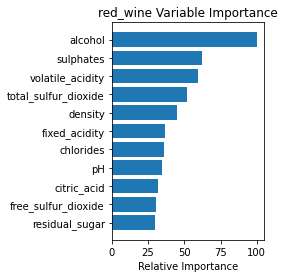

In [66]:
#Feature importance of the Random Forest Classification Model
feature_importance = random_forest_classification_model.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, red_wine.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('red_wine Variable Importance')
plt.show()
#alcohol, sulphates and volatile_acidity are the three most important variables in determining wine quality.

### 3. What are the 5 most important features in this model?

In the red_wine Random Forest Model, the 5 most important features are alcohol, sulphates, volatile acidity, total sulfur dioxide and density.

### Random Forest Classification Model with Gridsearch

In [67]:
start_time=time.time()
#Random Forest Classification
#Grid search for max_depth, min_samples_split and max_features
params_random_forest_classification_grid = {'max_depth': np.arange(1,11), 'min_samples_split': np.arange(1,11), 'max_features': np.arange(1,11)}

random_forest_classification = RandomForestClassifier()

random_forest_classification_gridsearch = GridSearchCV(random_forest_classification, params_random_forest_classification_grid, cv=5)

with joblib.parallel_backend('dask'):
#Fit the model to the training data
   random_forest_classification.fit(red_X_train.values.compute(), red_y_train.values.compute())

random_forest_classification_gridsearch.fit(red_X_train.values.compute(), red_y_train.values.compute())

#Best values, from the model
random_forest_gridsearch_parameters = random_forest_classification_gridsearch.best_params_
print("Best parameters: {}".format(random_forest_gridsearch_parameters))

Best parameters: {'max_depth': 4, 'max_features': 2, 'min_samples_split': 7}


In [68]:
print("Random Forest Classification Model with Gridsearch")
print("")
#Training Data
#Run the random forest classification model (max_depth=4, max_features=2, min_samples_split=7)
random_forest_classification_model = RandomForestClassifier(max_depth=4, max_features=2, min_samples_split=7)

with joblib.parallel_backend('dask'):
    random_forest_classification_model.fit(red_X_train.values.compute(), red_y_train.values.compute())


print("~~~Training Data~~~")
print("")
#Training Data
#KNN Classification Score
random_forest_classification_model_training_score = random_forest_classification_model.score(red_X_train.values.compute(), red_y_train.values.compute())
print("Random Forest Classification Model with Gridsearch Training Score: {}".format(random_forest_classification_model_training_score))
print("")
#Cross Validation Scores

#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(random_forest_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(random_forest_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(random_forest_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
red_X_train_predictions = random_forest_classification_model.predict(red_X_train.values.compute())

#Classification report on training data
red_train_classification_report = classification_report(red_y_train.values.compute(), red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion matrix on training data
red_train_confusion_matrix = confusion_matrix(red_y_train.values.compute(), red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Random Forest Classification Model Score
random_forest_classification_model_testing_score = random_forest_classification_model.score(red_X_test.values.compute(), red_y_test.values.compute())
print("Random Forest Classification Model with Gridsearch Testing Score: {}".format(random_forest_classification_model_testing_score))
print("")
#Test data
red_X_test_predictions = random_forest_classification_model.predict(red_X_test.values.compute())

red_test_classification_report = classification_report(red_y_test.values.compute(), red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test.values.compute(), red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test.values.compute(),red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test.values.compute(),red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test.values.compute(),red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test.values.compute(),red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Random Forest Classification Model with Gridsearch

~~~Training Data~~~

Random Forest Classification Model with Gridsearch Training Score: 0.791311093871218

Accuracy
[0.6744186  0.74806202 0.79457364 0.71705426 0.74319066]
cv_scores_accuracy mean: 0.7354598377220765

Precision
[0.82653061 0.74324324 0.75838926 0.69590643 0.74358974]
cv_scores_precision mean: 0.7535318587142779

Recall
[0.55       0.79285714 0.81428571 0.85714286 0.83453237]
cv_scores_recall mean: 0.7697636176772868

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       590
           1       0.81      0.80      0.81       699

    accuracy                           0.79      1289
   macro avg       0.79      0.79      0.79      1289
weighted avg       0.79      0.79      0.79      1289


Confusion Matrix:
[[459 131]
 [138 561]]


~~~Testing Data~~~

Random Forest Classification Model with Gridsearch Testing Score: 0.7290322580645161

Classifica

Random Forest Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 115

False Negatives = 45

False Positives = 39

True Positives = 111

Test Data: 

Accuracy Score: 0.7290322580645161

Precision Score: 0.74

Recall Score: 0.7115384615384616

ROC AUC Score: 0.7291458541458542

The model took 1289.9590640068054 to run.

### Support Vector Machine (SVM)

Support Vector Machines can be used for both classification and regression problems. In classification, support vector machines create either a line or hyperplane to separate data into classes. 

### Support Vector Machine Classification Model

In [69]:
start_time=time.time()
print("Support Vector Machine Classification Model")
print("")
#Training Data
#Run the Support Vector Machine Classification Model
support_vector_classification_model = SVC()

with joblib.parallel_backend('dask'):
    support_vector_classification_model.fit(red_X_train.values.compute(), red_y_train.values.compute())

print("~~~Training Data~~~")
print("")
#Training Data
#Support Vector Machine Classification Score
support_vector_classification_model_training_score = support_vector_classification_model.score(red_X_train.values.compute(), red_y_train.values.compute())
print("Support Vector Machine Classification Model Training Score: {}".format(support_vector_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(support_vector_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(support_vector_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(support_vector_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
red_X_train_predictions = support_vector_classification_model.predict(red_X_train.values.compute())

#Classification report on training data
red_train_classification_report = classification_report(red_y_train.values.compute(), red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion matrix on training data
red_train_confusion_matrix = confusion_matrix(red_y_train.values.compute(), red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Support Vector Machine Score
support_vector_classification_model_testing_score = support_vector_classification_model.score(red_X_test.values.compute(), red_y_test.values.compute())
print("Support Vector Machine Classification Model Testing Score: {}".format(support_vector_classification_model_testing_score))
print("")
#Test data
red_X_test_predictions = support_vector_classification_model.predict(red_X_test.values.compute())

red_test_classification_report = classification_report(red_y_test.values.compute(), red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test.values.compute(), red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test.values.compute(),red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test.values.compute(),red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test.values.compute(),red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test.values.compute(),red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Support Vector Machine Classification Model

~~~Training Data~~~

Support Vector Machine Classification Model Training Score: 0.8013964313421257

Accuracy
[0.68992248 0.74418605 0.79457364 0.74031008 0.73540856]
cv_scores_accuracy mean: 0.7408801616746599

Precision
[0.83333333 0.76811594 0.81294964 0.72121212 0.7414966 ]
cv_scores_precision mean: 0.7754215271003331

Recall
[0.53571429 0.75714286 0.80714286 0.85       0.78417266]
cv_scores_recall mean: 0.7468345323741007

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       590
           1       0.82      0.81      0.82       699

    accuracy                           0.80      1289
   macro avg       0.80      0.80      0.80      1289
weighted avg       0.80      0.80      0.80      1289


Confusion Matrix:
[[465 125]
 [131 568]]


~~~Testing Data~~~

Support Vector Machine Classification Model Testing Score: 0.7580645161290323

Classification Report:
       

Support Vector Machine Classification Model 

Test Data Confusion Matrix:

True Negatives = 122

False Negatives = 43

False Positives = 32

True Positives = 113

Test Data: 

Accuracy Score: 0.7580645161290323

Precision Score: 0.7793103448275862

Recall Score: 0.7243589743589743

ROC AUC Score: 0.7582833832833833

The model took 1.3871970176696777 to run.

### Support Vector Machine Classification Model with Gridsearch

In [70]:
start_time=time.time()
#Support Vector Machine Classification
#Grid search for C, gamma
params_support_vector_classification_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

support_vector_classification = SVC()

support_vector_classification_gridsearch = GridSearchCV(support_vector_classification, params_support_vector_classification_grid, cv=5)

with joblib.parallel_backend('dask'):
#Fit the model to the training data
    support_vector_classification_gridsearch.fit(red_X_train.values.compute(), red_y_train.values.compute())

#Best values, from the model
support_vector_gridsearch_parameters = support_vector_classification_gridsearch.best_params_
print("Best parameters: {}".format(support_vector_gridsearch_parameters))

Best parameters: {'C': 10, 'gamma': 0.01}


In [71]:
#Training Data
print("Support Vector Machine Classification Model with Gridsearch")
#Run the Support Vector Machine Classification Model

#Run the support vector machine classification model (C=10, gamma=0.01)
support_vector_classification_model = SVC(C=10, gamma=0.01)

with joblib.parallel_backend('dask'):
    support_vector_classification_model.fit(red_X_train.values.compute(), red_y_train.values.compute())

print("~~~Training Data~~~")
print("")
#Training Data
#Support Vector Machine Classification Score
support_vector_classification_model_training_score = support_vector_classification_model.score(red_X_train.values.compute(), red_y_train.values.compute())
print("Support Vector Machine Classification Model with Gridsearch Training Score: {}".format(support_vector_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(support_vector_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(support_vector_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(support_vector_classification_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
red_X_train_predictions = support_vector_classification_model.predict(red_X_train.values.compute())

#Classification report on training data
red_train_classification_report = classification_report(red_y_train.values.compute(), red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion matrix on training data
red_train_confusion_matrix = confusion_matrix(red_y_train.values.compute(), red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Support Vector Machine Score
support_vector_classification_model_testing_score = support_vector_classification_model.score(red_X_test.values.compute(), red_y_test.values.compute())
print("Support Vector Machine Classification Model with Gridsearch Testing Score: {}".format(support_vector_classification_model_testing_score))
print("")
#Test data
red_X_test_predictions = support_vector_classification_model.predict(red_X_test.values.compute())

red_test_classification_report = classification_report(red_y_test.values.compute(), red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test.values.compute(), red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test.values.compute(),red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test.values.compute(),red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test.values.compute(),red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test.values.compute(),red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Support Vector Machine Classification Model with Gridsearch
~~~Training Data~~~

Support Vector Machine Classification Model with Gridsearch Training Score: 0.7750193948797518

Accuracy
[0.69767442 0.74418605 0.80232558 0.73255814 0.73540856]
cv_scores_accuracy mean: 0.7424305492715592

Precision
[0.83695652 0.76056338 0.81560284 0.71257485 0.74825175]
cv_scores_precision mean: 0.7747898674902806

Recall
[0.55       0.77142857 0.82142857 0.85       0.76978417]
cv_scores_recall mean: 0.7525282631038028

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       590
           1       0.79      0.79      0.79       699

    accuracy                           0.78      1289
   macro avg       0.77      0.77      0.77      1289
weighted avg       0.78      0.78      0.78      1289


Confusion Matrix:
[[447 143]
 [147 552]]


~~~Testing Data~~~

Support Vector Machine Classification Model with Gridsearch Testing Score: 0.7

Support Vector Machine with Gridsearch Classification Model 

Test Data Confusion Matrix:

True Negatives = 122

False Negatives = 47

False Positives = 32

True Positives = 109

Test Data: 

Accuracy Score: 0.7451612903225806

Precision Score: 0.7730496453900709

Recall Score: 0.6987179487179487

ROC AUC Score: 0.7454628704628704

The model took 147.7285099029541 to run.

### Ensemble Gradient Boosting Classifier Model

Ensemble Gradient Boosting can be used for both classification and regression problems. In classification, decision trees are built in sequence in order to minimize the loss function.

### Gradient Boosting Classifier Model

In [73]:
gradient_boosting_classifier_model = GradientBoostingClassifier()

with joblib.parallel_backend('dask'):
    gradient_boosting_classifier_model.fit(red_X_train.values.compute(), red_y_train.values.compute())

preds_train = gradient_boosting_classifier_model.predict(red_X_train.values.compute())
preds_test = gradient_boosting_classifier_model.predict(red_X_test.values.compute())

print("Gradient boosting tree training score is: ", roc_auc_score(preds_train, red_y_train.values.compute()))
print("Gradient boosting tree test score is: ", roc_auc_score(preds_test, red_y_test.values.compute()))

Gradient boosting tree training score is:  0.8764224983649445
Gradient boosting tree test score is:  0.7776875338414762


In [74]:
start_time=time.time()
print("ensemble Gradient Boosting Classifier Model")
print("")
#Training Data
#Run the Gradient Boosting Classifier Model
gradient_boosting_classifier_model = GradientBoostingClassifier()

with joblib.parallel_backend('dask'):
    gradient_boosting_classifier_model.fit(red_X_train.values.compute(), red_y_train.values.compute())

print("~~~Training Data~~~")
print("")
#Training Data
#Gradient Boosting Classifier Model Score
gradient_boosting_classifier_model_training_score = gradient_boosting_classifier_model.score(red_X_train.values.compute(), red_y_train.values.compute())
print("ensemble Gradient Boosting Classifier Model Training Score: {}".format(gradient_boosting_classifier_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(gradient_boosting_classifier_model, red_X_train.values.compute(), red_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(gradient_boosting_classifier_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(gradient_boosting_classifier_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
red_X_train_predictions = gradient_boosting_classifier_model.predict(red_X_train.values.compute())

#Classification report on training data
red_train_classification_report = classification_report(red_y_train.values.compute(), red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion matrix on training data
red_train_confusion_matrix = confusion_matrix(red_y_train.values.compute(), red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Gradient Boosting Classifier Model Score
gradient_boosting_classifier_model_testing_score = gradient_boosting_classifier_model.score(red_X_test.values.compute(), red_y_test.values.compute())
print("ensemble Gradient Boosting Classifier Model Testing Score: {}".format(gradient_boosting_classifier_model_testing_score))
print("")
#Test data
red_X_test_predictions = gradient_boosting_classifier_model.predict(red_X_test.values.compute())

red_test_classification_report = classification_report(red_y_test.values.compute(), red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test.values.compute(), red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test.values.compute(),red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test.values.compute(),red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test.values.compute(),red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test.values.compute(),red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

ensemble Gradient Boosting Classifier Model

~~~Training Data~~~

ensemble Gradient Boosting Classifier Model Training Score: 0.8774243599689682

Accuracy
[0.6744186  0.71317829 0.76356589 0.73255814 0.71206226]
cv_scores_accuracy mean: 0.7191566374083794

Precision
[0.79787234 0.71153846 0.78832117 0.71005917 0.70700637]
cv_scores_precision mean: 0.7429595021743179

Recall
[0.52857143 0.79285714 0.76428571 0.85714286 0.79856115]
cv_scores_recall mean: 0.7482836587872559

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       590
           1       0.89      0.88      0.89       699

    accuracy                           0.88      1289
   macro avg       0.88      0.88      0.88      1289
weighted avg       0.88      0.88      0.88      1289


Confusion Matrix:
[[513  77]
 [ 81 618]]


~~~Testing Data~~~

ensemble Gradient Boosting Classifier Model Testing Score: 0.7806451612903226

Classification Report:
       

ensemble Gradient Boosting Classifier Model

Test Data Confusion Matrix:

True Negatives = 122

False Negatives = 36

False Positives = 32

True Positives = 120

Test Data: 

Accuracy Score: 0.7806451612903226

Precision Score: 0.7894736842105263

Recall Score: 0.7692307692307693

ROC AUC Score: 0.7807192807192807

The model took 4.547802686691284 to run.

### Gradient Boosting Classifier Model with Gridsearch

In [77]:
start_time=time.time()
#Gradient Boosting Classifier Model
#Grid search for loss, n_estimators
params_gradient_boosting_classifier_grid = {'loss': ('deviance', 'exponential'), 'n_estimators': [1, 10, 100]}

gradient_boosting_classifier_model = GradientBoostingClassifier()

gradient_boosting_classifier_gridsearch = GridSearchCV(gradient_boosting_classifier_model, params_gradient_boosting_classifier_grid, cv=5)

with joblib.parallel_backend('dask'):
#Fit the model to the training data
    gradient_boosting_classifier_model.fit(red_X_train.values.compute(), red_y_train.values.compute())

gradient_boosting_classifier_gridsearch.fit(red_X_train.values.compute(), red_y_train.values.compute())

#Best values, from the model
gradient_boosting_classifier_gridsearch_parameters = gradient_boosting_classifier_gridsearch.best_params_
print("Best parameters: {}".format(gradient_boosting_classifier_gridsearch_parameters))

Best parameters: {'loss': 'deviance', 'n_estimators': 10}


In [78]:
print("ensemble Gradient Boosting Classifier Model")
print("")
#Training Data
#Run the Gradient Boosting Classifier Model
#loss='deviance', 'n_estimators'=10
gradient_boosting_classifier_model = GradientBoostingClassifier(loss='deviance', n_estimators=10)

with joblib.parallel_backend('dask'):
    gradient_boosting_classifier_model.fit(red_X_train.values.compute(), red_y_train.values.compute())

print("~~~Training Data~~~")
print("")
#Training Data
#Gradient Boosting Classifier Model Score
gradient_boosting_classifier_model_training_score = gradient_boosting_classifier_model.score(red_X_train.values.compute(), red_y_train.values.compute())
print("ensemble Gradient Boosting Classifier Model Training Score: {}".format(gradient_boosting_classifier_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(gradient_boosting_classifier_model, red_X_train.values.compute(), red_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(gradient_boosting_classifier_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(gradient_boosting_classifier_model, red_X_train.values.compute(), red_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
red_X_train_predictions = gradient_boosting_classifier_model.predict(red_X_train.values.compute())

#Classification report on training data
red_train_classification_report = classification_report(red_y_train.values.compute(), red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion matrix on training data
red_train_confusion_matrix = confusion_matrix(red_y_train.values.compute(), red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Gradient Boosting Classifier Model Score
gradient_boosting_classifier_model_testing_score = gradient_boosting_classifier_model.score(red_X_test.values.compute(), red_y_test.values.compute())
print("ensemble Gradient Boosting Classifier Model Testing Score: {}".format(gradient_boosting_classifier_model_testing_score))
print("")
#Test data
red_X_test_predictions = gradient_boosting_classifier_model.predict(red_X_test.values.compute())

red_test_classification_report = classification_report(red_y_test.values.compute(), red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test.values.compute(), red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test.values.compute(),red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test.values.compute(),red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test.values.compute(),red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test.values.compute(),red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

ensemble Gradient Boosting Classifier Model

~~~Training Data~~~

ensemble Gradient Boosting Classifier Model Training Score: 0.773467804499612

Accuracy
[0.72868217 0.73255814 0.7751938  0.7248062  0.74708171]
cv_scores_accuracy mean: 0.7416644044279552

Precision
[0.85       0.73202614 0.77333333 0.70175439 0.73717949]
cv_scores_precision mean: 0.7588586700537164

Recall
[0.60714286 0.8        0.82857143 0.85714286 0.82733813]
cv_scores_recall mean: 0.7840390544707091

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       590
           1       0.78      0.82      0.80       699

    accuracy                           0.77      1289
   macro avg       0.77      0.77      0.77      1289
weighted avg       0.77      0.77      0.77      1289


Confusion Matrix:
[[427 163]
 [129 570]]


~~~Testing Data~~~

ensemble Gradient Boosting Classifier Model Testing Score: 0.7032258064516129

Classification Report:
        

ensemble Gradient Boosting Classifier Model with Gridsearch

Test Data Confusion Matrix:

True Negatives = 106

False Negatives = 44

False Positives = 48

True Positives = 112

Test Data: 

Accuracy Score: 0.7032258064516129

Precision Score: 0.7

Recall Score: 0.717948717948718

ROC AUC Score: 0.7031302031302031

The model took 31.597836017608643 to run.

### Model Analysis

### Summary of Performance

Red wine

Logistic Regression Model 

Test Data Confusion Matrix:

True Negatives = 111

False Negatives = 48

False Positives = 43

True Positives = 108

Test Data: 

Accuracy Score: 0.7064516129032258

Precision Score: 0.7152317880794702

Recall Score: 0.6923076923076923

ROC AUC Score: 0.7065434565434565

The model took 6.166955232620239 to run.



-

K-Nearest Neighbors (KNN) Classification Model 

Test Data Confusion Matrix:

True Negatives = 103

False Negatives = 35

False Positives = 51

True Positives = 121

Test Data: 

Accuracy Score: 0.7225806451612903

Precision Score: 0.7034883720930233

Recall Score:  0.7756410256410257

ROC AUC Score:  0.7222360972360972

The model took 1.2244601249694824 to run.

-
K-Nearest Neighbors (KNN) Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 110

False Negatives = 41

False Positives = 44

True Positives = 115

Test Data: 

Accuracy score: 0.7258064516129032

Precision score: 0.7232704402515723

Recall score: 0.7371794871794872

ROC AUC Score: 0.7257326007326007

The model took 23.61709690093994 to run.

-

K-Nearest Neighbors (KNN) Weighted Classification Model 

Test Data Confusion Matrix:

True Negatives = 111

False Negatives = 28

False Positives = 43

True Positives = 128

Test Data: 

Accuracy Score: 0.7709677419354839

Precision Score: 0.7485380116959064

Recall Score: 0.8205128205128205

ROC AUC Score: 0.7706460206460206

The model took 1.1044700145721436 to run.

-
K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 116

False Negatives = 27

False Positives = 38

True Positives = 129

Test Data: 

Accuracy Score: 0.7903225806451613

Precision Score: 0.7724550898203593

Recall Score: 0.8269230769230769

ROC AUC Score: 0.7900849150849151

The model took 19.839478015899658 to run.

-
Decision Tree Classification Model 

Test Data Confusion Matrix:

True Negatives = 104

False Negatives = 39

False Positives = 50

True Positives = 117

Test Data: 

Accuracy Score: 0.7129032258064516

Precision Score: 0.7005988023952096

Recall Score: 0.75

ROC AUC Score: 0.7126623376623377

The model took 0.8983287811279297 to run.

-
Decision Tree Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 111

False Negatives = 47

False Positives = 43

True Positives = 109

Test Data: 

Accuracy Score: 0.7096774193548387

Precision Score: 0.7171052631578947

Recall Score: 0.6987179487179487

ROC AUC Score: 0.7097485847485847

The model took 135.9269471168518 to run.

-

Random Forest Classification Model 

Test Data Confusion Matrix:

True Negatives = 127

False Negatives = 35

False Positives = 27

True Positives = 121

Test Data: 

Accuracy Score: 0.8

Precision Score: 0.8175675675675675

Recall Score: 0.7756410256410257

ROC AUC Score: 0.8001581751581751

The model took 6.4463300704956055 to run.

-
Random Forest Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 115

False Negatives = 45

False Positives = 39

True Positives = 111

Test Data: 

Accuracy Score: 0.7290322580645161

Precision Score: 0.74

Recall Score: 0.7115384615384616

ROC AUC Score: 0.7291458541458542

The model took 1289.9590640068054 to run.

-
Support Vector Machine Classification Model 

Test Data Confusion Matrix:

True Negatives = 122

False Negatives = 43

False Positives = 32

True Positives = 113

Test Data: 

Accuracy Score: 0.7580645161290323

Precision Score: 0.7793103448275862

Recall Score: 0.7243589743589743

ROC AUC Score: 0.7582833832833833

The model took 1.3871970176696777 to run.

-
Support Vector Machine with Gridsearch Classification Model 

Test Data Confusion Matrix:

True Negatives = 122

False Negatives = 47

False Positives = 32

True Positives = 109

Test Data: 

Accuracy Score: 0.7451612903225806

Precision Score: 0.7730496453900709

Recall Score: 0.6987179487179487

ROC AUC Score: 0.7454628704628704

The model took 147.7285099029541 to run.

-
ensemble Gradient Boosting Classifier Model

Test Data Confusion Matrix:

True Negatives = 122

False Negatives = 36

False Positives = 32

True Positives = 120

Test Data: 

Accuracy Score: 0.7806451612903226

Precision Score: 0.7894736842105263

Recall Score: 0.7692307692307693

ROC AUC Score: 0.7807192807192807

The model took 4.547802686691284 to run.

-
ensemble Gradient Boosting Classifier Model with Gridsearch

Test Data Confusion Matrix:

True Negatives = 106

False Negatives = 44

False Positives = 48

True Positives = 112

Test Data: 

Accuracy Score: 0.7032258064516129

Precision Score: 0.7

Recall Score: 0.717948717948718

ROC AUC Score: 0.7031302031302031

The model took 31.597836017608643 to run.


In [79]:
#red_wine model performance
red_wine_performance = pd.DataFrame({'Classifier':['Logistic Regression', 'KNN', 'KNN GridSearch', 'KNN Weighted', 'KNN Weighted GridSearch', 'Decision Tree', 'Decision Tree GridSearch', 'Random Forest', 'Random Forest GridSearch', 'SVM', 'SVM GridSearch', 'Gradient Boosting Classifier', 'Gradient Boosting Classifier GridSearch'],
                                     'Accuracy':[0.71, 0.72, 0.73, 0.77, 0.79, 0.71, 0.71, 0.80, 0.73, 0.76, 0.75, 0.78, 0.70],
                                     'Precision':[0.72, 0.70, 0.72, 0.75, 0.77, 0.70, 0.72, 0.82, 0.74, 0.78, 0.77, 0.79, 0.70],
                                     'Recall':[0.69, 0.78, 0.74, 0.82, 0.83, 0.75, 0.70, 0.78, 0.71, 0.72, 0.70, 0.77, 0.72],
                                     'ROC AUC':[0.71, 0.72, 0.73, 0.77, 0.79, 0.71, 0.71, 0.80, 0.73, 0.76, 0.75, 0.78, 0.70],
                                     'Time':[6.17, 1.22, 23.62, 1.10, 19.84, 0.90, 135.93, 6.45, 1289.96, 1.39, 147.73, 4.55, 31.60]})

In [80]:
red_wine_performance

,Classifier,Accuracy,Precision,Recall,ROC AUC,Time
0,Logistic Regression,0.71,0.72,0.69,0.71,6.17
1,KNN,0.72,0.70,0.78,0.72,1.22
2,KNN GridSearch,0.73,0.72,0.74,0.73,23.62
3,KNN Weighted,0.77,0.75,0.82,0.77,1.10
4,KNN Weighted GridSearch,0.79,0.77,0.83,0.79,19.84
5,Decision Tree,0.71,0.70,0.75,0.71,0.90
6,Decision Tree GridSearch,0.71,0.72,0.70,0.71,135.93
7,Random Forest,0.80,0.82,0.78,0.80,6.45
8,Random Forest GridSearch,0.73,0.74,0.71,0.73,1289.96
9,SVM,0.76,0.78,0.72,0.76,1.39


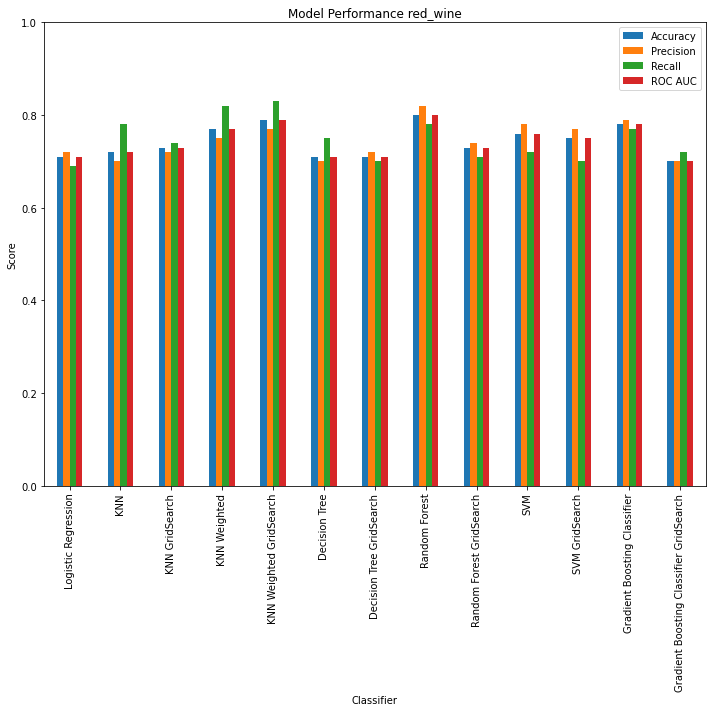

In [81]:
#red_wine model performance bar graph
figure=plt.figure(figsize=(10,10))
ax = figure.gca()

red_wine_performance[['Classifier', 'Accuracy', 'Precision', 'Recall', 'ROC AUC']].plot(kind='bar', x='Classifier', title='Model Performance red_wine', ylim=[0, 1.0], ax=ax)
plt.ylabel("Score")
plt.tight_layout()

### 2. Which machine learning model performs the best in a binary classification task to predict wine quality?

Looking at model performance for the red_wine dataset, the Random Forest Model has the highest accuracy, precision and ROC AUC (respectively: 0.80, 0.82, 0.80). The KNN Weighted Model with Gridsearch has the highest recall (0.83). 

Accuracy is a measure of the number of correctly predicted data points out of all of the data points.

Precision is a measure of the number of how many predicted positives are actually positive (important if false positive cost is high).

Recall is a measure of the number of how many actual positives are classified (important if false negative cost is high). 

Looking at the test data confusion matrix of the Random Forest Classification Model:

(True Negatives = 127, False Negatives = 35, False Positives = 27, True Positives = 121)

In order to decrease the number of False Negatives and False Positives, more data can be added to the model for training. 

It is important to note that the added time for GridSearch with the Random Forest Model did not perform as well as the Random Forest Model without GridSearch.

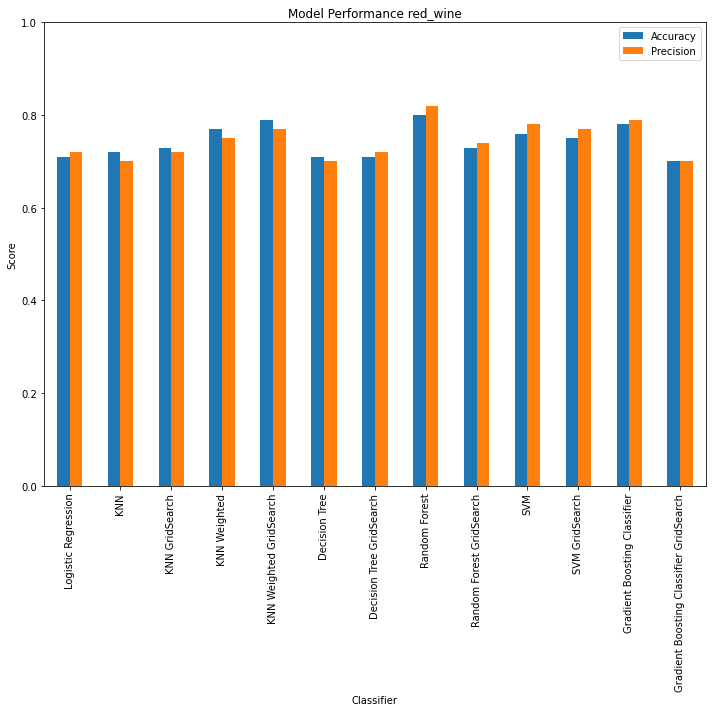

In [82]:
#red_wine model performance bar graph of accuracy and precision
figure=plt.figure(figsize=(10,10))
ax = figure.gca()

red_wine_performance[['Classifier', 'Accuracy', 'Precision']].plot(kind='bar', x='Classifier', title='Model Performance red_wine', ylim=[0, 1.0], ax=ax)
plt.ylabel("Score")
plt.tight_layout()

### white_wine

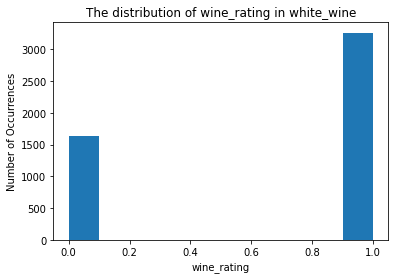

In [83]:
#Histogram of the target variable, "wine_rating"
plt.hist(white_wine.wine_rating)
plt.title("The distribution of wine_rating in white_wine")
plt.xlabel("wine_rating")
plt.ylabel("Number of Occurrences")
plt.show()

In [84]:
#Value counts for the target variable, "wine_rating"
white_wine.wine_rating.value_counts().compute()

1    3258
0    1640
Name: wine_rating, dtype: int64

In [85]:
#Descriptive statistics for the target variable, "wine_rating"
white_wine["wine_rating"].describe().compute()

count    4898.000000
mean        0.665169
std         0.471979
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: wine_rating, dtype: float64

In [86]:
#Correlations between variables in white_wine
white_wine.corr().compute()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_rating
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.089749
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.225440
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.000700
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.092756
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.183939
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,-0.001278
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.170924
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.268696
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.083687
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.051858


In [87]:
#Correlations between variables and "wine_rating" in white_wine
white_wine.corr()['wine_rating'].compute()

fixed_acidity          -0.089749
volatile_acidity       -0.225440
citric_acid            -0.000700
residual_sugar         -0.092756
chlorides              -0.183939
free_sulfur_dioxide    -0.001278
total_sulfur_dioxide   -0.170924
density                -0.268696
pH                      0.083687
sulphates               0.051858
alcohol                 0.383280
wine_rating             1.000000
Name: wine_rating, dtype: float64

The variables with correlations to wine_rating greater than or equal to the absolute value of 0.10:

volatile_acidity (-0.225), chlorides (-0.183), total_sulfur_dioxide (-0.170), density (-0.268), alcohol (0.383)

### 1. What are the 6 features most correlated with wine quality?

In the white_wine dataset, the 6 features most correlated with wine quality are alcohol, density, volatile acidity, chlorides, total sulfur dioxide and residual sugar.

### Logistic Regression Model

In [88]:
logisticrm = LogisticRegression()

with joblib.parallel_backend('dask'):
    logisticrm.fit(white_X_train.values.compute(), white_y_train.values.compute())
    
preds_train = lr.predict(white_X_train.values.compute())
preds_test = lr.predict(white_X_test.values.compute())

print("Logistic regression training score is: ", roc_auc_score(preds_train, white_y_train.values.compute()))
print("Logistic regression test score is: ", roc_auc_score(preds_test, white_y_test.values.compute()))

Logistic regression training score is:  0.6840332723512652
Logistic regression test score is:  0.6805765116540929


In [89]:
start_time=time.time()
print("Logistic Regression Model")
print("")
#Logistic Regression Model
#Training Data
logisticrm = LogisticRegression()

print("~~~Training Data~~~")
print("")
with joblib.parallel_backend('dask'):
#Fit model
    logisticrm.fit(white_X_train.values.compute(), white_y_train.values.compute())

#Logistic Regression Score
logisticrm_training_score = logisticrm.score(white_X_train.values.compute(), white_y_train.values.compute())
print("Logistic Regression Model Training Score: {}".format(logisticrm_training_score))
print("")

#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(logisticrm, white_X_train.values.compute(), white_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(logisticrm, white_X_train.values.compute(), white_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(logisticrm, white_X_train.values.compute(), white_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")

#Predictions
white_X_train_predictions = logisticrm.predict(white_X_train.values.compute())
#Classification Report
white_train_classification_report = classification_report(white_y_train.values.compute(), white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion Matrix
white_train_confusion_matrix = confusion_matrix(white_y_train.values.compute(), white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")

print("~~~Testing Data~~~")
print("")
#Testing Data
#Logistic Regression Score
logisticrm_testing_score = logisticrm.score(white_X_test.values.compute(), white_y_test.values.compute())
print("Logistic Regression Model Testing Score: {}".format(logisticrm_testing_score))
print("")
#Test data
white_X_test_predictions = logisticrm.predict(white_X_test.values.compute())

white_test_classification_report = classification_report(white_y_test.values.compute(), white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test.values.compute(), white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test.values.compute(),white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test.values.compute(),white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test.values.compute(),white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test.values.compute(),white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Logistic Regression Model

~~~Training Data~~~

Logistic Regression Model Training Score: 0.7522796352583586

Accuracy
[0.68987342 0.73924051 0.77848101 0.74017744 0.72750317]
cv_scores_accuracy mean: 0.735055109014776

Precision
[0.76850095 0.82591093 0.79864636 0.73784978 0.7516129 ]
cv_scores_precision mean: 0.776504184870306

Recall
[0.76704545 0.77272727 0.89393939 0.94886364 0.88425047]
cv_scores_recall mean: 0.8533652463918118

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.51      0.58      1309
           1       0.78      0.87      0.83      2639

    accuracy                           0.75      3948
   macro avg       0.72      0.69      0.70      3948
weighted avg       0.74      0.75      0.74      3948


Confusion Matrix:
[[ 664  645]
 [ 333 2306]]


~~~Testing Data~~~

Logistic Regression Model Testing Score: 0.7452631578947368

Classification Report:
              precision    recall  f1-score   support

    

Logistic Regression Model Test Data 

Confusion Matrix:

True Negatives = 163

False Negatives = 74

False Positives = 168

True Positives = 545

Test Data: 

Accuracy Score: 0.7452631578947368

Precision Score: 0.7643758765778401

Recall Score: 0.8804523424878837

ROC AUC Score: 0.6864497361986247

The model took 1.7733500003814697 to run.

*Running the Logistic Regression Model with only the features that have a correlation greater than or equal to the absolute value of 0.10 with "wine_rating" did not show an improvement in the performance of the model.

### K-Nearest Neighbors (KNN)

### K-Nearest Neighbors (KNN) Classification Model

In [90]:
start_time=time.time()
print("K-Nearest Neighbors (KNN) Classification Model")
print("")
#KNN Classification Model
#Training Data

knn_classification_model = neighbors.KNeighborsClassifier()

with joblib.parallel_backend('dask'):
#Fit the model
    knn_classification_model.fit(white_X_train.values.compute(), white_y_train.values.compute())

print("~~~Training Data~~~")
print("")
#KNN Classification Score
knn_classification_model_training_score = knn_classification_model.score(white_X_train.values.compute(), white_y_train.values.compute())
print("KNN Classification Model Training Score: {}".format(knn_classification_model_training_score))
print("")

#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(knn_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(knn_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(knn_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
white_X_train_predictions = knn_classification_model.predict(white_X_train.values.compute())

#Classification report
white_train_classification_report = classification_report(white_y_train.values.compute(), white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion matrix
white_train_confusion_matrix = confusion_matrix(white_y_train.values.compute(), white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Logistic Regression Score
knn_classification_model_testing_score = knn_classification_model.score(white_X_test.values.compute(), white_y_test.values.compute())
print("KNN Classification Model Testing Score: {}".format(knn_classification_model_testing_score))
print("")
white_X_test_predictions = knn_classification_model.predict(white_X_test.values.compute())
white_test_classification_report = classification_report(white_y_test.values.compute(), white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test.values.compute(), white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test.values.compute(),white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test.values.compute(),white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test.values.compute(),white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test.values.compute(),white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

K-Nearest Neighbors (KNN) Classification Model

~~~Training Data~~~

KNN Classification Model Training Score: 0.8376393110435664

Accuracy
[0.66582278 0.68734177 0.72531646 0.74271229 0.74904943]
cv_scores_accuracy mean: 0.714048547271823

Precision
[0.76294821 0.78498986 0.78221416 0.75671406 0.77190083]
cv_scores_precision mean: 0.7717534215482432

Recall
[0.72537879 0.73295455 0.81628788 0.90719697 0.88614801]
cv_scores_recall mean: 0.8135932378816628

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1309
           1       0.86      0.91      0.88      2639

    accuracy                           0.84      3948
   macro avg       0.82      0.80      0.81      3948
weighted avg       0.83      0.84      0.83      3948


Confusion Matrix:
[[ 913  396]
 [ 245 2394]]


~~~Testing Data~~~

KNN Classification Model Testing Score: 0.7568421052631579

Classification Report:
              precision    recall  f1-s

K-Nearest Neighbors (KNN) Classification Model 

Test Data Confusion Matrix:

True Negatives = 184

False Negatives = 84

False Positives = 147

True Positives = 535

Test Data: 

Accuracy Score: 0.7568421052631579

Precision Score: 0.7844574780058651

Recall Score: 0.864297253634895

ROC AUC Score: 0.710094246152795

The model took 2.945633888244629 to run.

### K-Nearest Neighbors (KNN) Classification Model with Gridsearch

In [91]:
start_time=time.time()
#Grid search for k value
params_knn_classification_grid = {'n_neighbors': np.arange(1,101)}

knn_classification = neighbors.KNeighborsClassifier()

knn_classification_gridsearch = GridSearchCV(knn_classification, params_knn_classification_grid, cv=5)

with joblib.parallel_backend('dask'):
#Fit the model to the training data
    knn_classification.fit(white_X_train.values.compute(), white_y_train.values.compute())

knn_classification_gridsearch.fit(white_X_train.values.compute(), white_y_train.values.compute())
#Best k value, from the model
knn_classification_gridsearch_parameters = knn_classification_gridsearch.best_params_

print("Best parameter: {}".format(knn_classification_gridsearch_parameters))

Best parameter: {'n_neighbors': 38}


In [92]:
print("K-Nearest Neighbors (KNN) Classification Model with Gridsearch")
print("")
#KNN Classification Model
#Training Data

#Run the classification model (n_neighbors=38)
knn_classification_model = neighbors.KNeighborsClassifier (n_neighbors=38)

with joblib.parallel_backend('dask'):
    knn_classification_model.fit(white_X_train.values.compute(), white_y_train.values.compute())

print("~~~Training Data~~~")
print("")
#Training Data
#KNN Classification Score
knn_classification_model_training_score = knn_classification_model.score(white_X_train.values.compute(), white_y_train.values.compute())
print("KNN Classification Model with Gridsearch Training Score: {}".format(knn_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(knn_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(knn_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(knn_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
white_X_train_predictions = knn_classification_model.predict(white_X_train.values.compute())

#Classification Report
white_train_classification_report = classification_report(white_y_train.values.compute(), white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion Matrix
white_train_confusion_matrix = confusion_matrix(white_y_train.values.compute(), white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Logistic Regression Score
knn_classification_model_testing_score = knn_classification_model.score(white_X_test.values.compute(), white_y_test)
print("KNN Classification Model with Gridsearch Testing Score: {}".format(knn_classification_model_testing_score))
print("")
#Test data
white_X_test_predictions = knn_classification_model.predict(white_X_test.values.compute())

white_test_classification_report = classification_report(white_y_test, white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test, white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy score: {}".format(accuracy_score(white_y_test,white_X_test_predictions)))
#Precision Score
print("Precision score: {}".format(precision_score(white_y_test,white_X_test_predictions)))
#Recall Score
print("Recall score: {}".format(recall_score(white_y_test,white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test,white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

K-Nearest Neighbors (KNN) Classification Model with Gridsearch

~~~Training Data~~~

KNN Classification Model with Gridsearch Training Score: 0.7760891590678825

Accuracy
[0.71012658 0.75696203 0.77468354 0.74524715 0.78833967]
cv_scores_accuracy mean: 0.7550717941313312

Precision
[0.78585086 0.81578947 0.80701754 0.74810319 0.79801325]
cv_scores_precision mean: 0.7909548619288113

Recall
[0.77840909 0.8219697  0.87121212 0.93371212 0.91461101]
cv_scores_recall mean: 0.863982807199126

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.57      0.63      1309
           1       0.81      0.88      0.84      2639

    accuracy                           0.78      3948
   macro avg       0.75      0.72      0.73      3948
weighted avg       0.77      0.78      0.77      3948


Confusion Matrix:
[[ 749  560]
 [ 324 2315]]


~~~Testing Data~~~

KNN Classification Model with Gridsearch Testing Score: 0.7547368421052632

Classification

K-Nearest Neighbors (KNN) Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 171

False Negatives = 73

False Positives = 160

True Positives = 546

Test Data: 

Accuracy score: 0.7547368421052632

Precision score: 0.773371104815864

Recall score: 0.8820678513731826

ROC AUC Score: 0.6993420827862892

The model took 230.04368925094604 to run.

### K-Nearest Neighbors (KNN) Weighted Classification

In [94]:
start_time=time.time()
print("K-Nearest Neighbors (KNN) Weighted Classification Model")
print("")
#KNN Weighted Classification Model
knn_classification_weighted_model = neighbors.KNeighborsClassifier (weights='distance')
print("")
#Training Data
with joblib.parallel_backend('dask'):
#Fit the model
    knn_classification_weighted_model.fit(white_X_train.values.compute(), white_y_train.values.compute())

print("~~~Training Data~~~")
print("")
#Training Data
#Weighted KNN Classification Score
knn_classification_weighted_model_training_score = knn_classification_weighted_model.score(white_X_train.values.compute(), white_y_train.values.compute())
print("KNN Weighted Classification Model Training Score: {}".format(knn_classification_weighted_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(knn_classification_weighted_model, white_X_train.values.compute(), white_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(knn_classification_weighted_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(knn_classification_weighted_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
white_X_train_predictions = knn_classification_weighted_model.predict(white_X_train.values.compute())

#Classification Report
white_train_classification_report = classification_report(white_y_train.values.compute(), white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion Matrix
white_train_confusion_matrix = confusion_matrix(white_y_train.values.compute(), white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Weighted KNN Classification Score
knn_classification_weighted_model_testing_score = knn_classification_weighted_model.score(white_X_test.values.compute(), white_y_test.values.compute())
print("KNN Weighted Classification Model Testing Score: {}".format(knn_classification_weighted_model_testing_score))
print("")
#Predictions
white_X_test_predictions = knn_classification_weighted_model.predict(white_X_test.values.compute())

white_test_classification_report = classification_report(white_y_test.values.compute(), white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test.values.compute(), white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test.values.compute(),white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test.values.compute(),white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test.values.compute(),white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test.values.compute(),white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

K-Nearest Neighbors (KNN) Weighted Classification Model


~~~Training Data~~~

KNN Weighted Classification Model Training Score: 1.0

Accuracy
[0.66582278 0.68860759 0.73164557 0.74904943 0.75158428]
cv_scores_accuracy mean: 0.7173419325857118

Precision
[0.764      0.78658537 0.78937729 0.76190476 0.77355372]
cv_scores_precision mean: 0.7750842272287949

Recall
[0.72348485 0.73295455 0.81628788 0.90909091 0.88804554]
cv_scores_recall mean: 0.8139727445230293

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1309
           1       1.00      1.00      1.00      2639

    accuracy                           1.00      3948
   macro avg       1.00      1.00      1.00      3948
weighted avg       1.00      1.00      1.00      3948


Confusion Matrix:
[[1309    0]
 [   0 2639]]


~~~Testing Data~~~

KNN Weighted Classification Model Testing Score: 0.8168421052631579

Classification Report:
              precision  

K-Nearest Neighbors (KNN) Weighted Classification Model 

Test Data Confusion Matrix:

True Negatives = 221

False Negatives = 64

False Positives = 110

True Positives = 555

Test Data: 

Accuracy Score: 0.8168421052631579

Precision Score: 0.8345864661654135

Recall Score: 0.8966074313408724

ROC AUC Score: 0.7821405736764785

The model took 2.0470681190490723 to run.

### K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch

In [95]:
start_time=time.time()
#KNN Classification with Distance Weights
#Grid search for k value
params_knn_classification_weighted_grid = {'n_neighbors': np.arange(1,101)}

knn_classification_weighted = neighbors.KNeighborsClassifier(weights='distance')

knn_classification_weighted_gridsearch = GridSearchCV(knn_classification_weighted, params_knn_classification_weighted_grid, cv=5)

with joblib.parallel_backend('dask'):
#Fit the model to the training data
    knn_classification_weighted.fit(white_X_train.values.compute(), white_y_train.values.compute())

knn_classification_weighted_gridsearch.fit(white_X_train.values.compute(), white_y_train.values.compute())

#Best k value, from the model
knn_classification_weighted_gridsearch_parameters = knn_classification_weighted_gridsearch.best_params_

print("Best parameter: {}".format(knn_classification_weighted_gridsearch_parameters))

Best parameter: {'n_neighbors': 37}


In [96]:
print("K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch")
print("")
#Run a weighted classification model (n_neighbors=37)
knn_classification_weighted_model = neighbors.KNeighborsClassifier (n_neighbors=37, weights='distance')

with joblib.parallel_backend('dask'):
#Training Data
    knn_classification_weighted_model.fit(white_X_train.values.compute(), white_y_train.values.compute())

print("~~~Training Data~~~")
print("")
#KNN Weighted Classification Score
knn_classification_weighted_model_training_score = knn_classification_weighted_model.score(white_X_train.values.compute(), white_y_train.values.compute())
print("KNN Weighted Classification Model with Gridsearch Training Score: {}".format(knn_classification_weighted_model_training_score))
print("")

#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(knn_classification_weighted_model, white_X_train.values.compute(), white_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(knn_classification_weighted_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(knn_classification_weighted_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
white_X_train_predictions = knn_classification_weighted_model.predict(white_X_train.values.compute())

#Classification Report
white_train_classification_report = classification_report(white_y_train.values.compute(), white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion Matrix
white_train_confusion_matrix = confusion_matrix(white_y_train.values.compute(), white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#KNN Weighted Classification Score
knn_classification_weighted_model_testing_score = knn_classification_weighted_model.score(white_X_test.values.compute(), white_y_test.values.compute())
print("KNN Weighted Classification Model with Gridsearch Testing Score: {}".format(knn_classification_weighted_model_testing_score))
print("")
#Predictions
white_X_test_predictions = knn_classification_weighted_model.predict(white_X_test.values.compute())

white_test_classification_report = classification_report(white_y_test.values.compute(), white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test.values.compute(), white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test.values.compute(),white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test.values.compute(),white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test.values.compute(),white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test.values.compute(),white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch

~~~Training Data~~~

KNN Weighted Classification Model with Gridsearch Training Score: 1.0

Accuracy
[0.71265823 0.75822785 0.76708861 0.74397972 0.78833967]
cv_scores_accuracy mean: 0.7540588150358569

Precision
[0.78236398 0.81378026 0.79655172 0.74255952 0.79411765]
cv_scores_precision mean: 0.7858746266399683

Recall
[0.78977273 0.82765152 0.875      0.94507576 0.92220114]
cv_scores_recall mean: 0.8719402277039847

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1309
           1       1.00      1.00      1.00      2639

    accuracy                           1.00      3948
   macro avg       1.00      1.00      1.00      3948
weighted avg       1.00      1.00      1.00      3948


Confusion Matrix:
[[1309    0]
 [   0 2639]]


~~~Testing Data~~~

KNN Weighted Classification Model with Gridsearch Testing Score: 0.8305263157894737

C

K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 213

False Negatives = 43

False Positives = 118

True Positives = 576

Test Data: 

Accuracy Score: 0.8305263157894737

Precision Score: 0.829971181556196

Recall Score: 0.9305331179321487

ROC AUC Score: 0.7870188248271015

The model took 173.26508808135986 to run.

### Decision Tree

### Decision Tree Classification

In [97]:
start_time=time.time()
print("Decision Tree Classification Model")
print("")
#Decision Tree Classification Model
#Training Data
decision_tree_classification_model = tree.DecisionTreeClassifier()

with joblib.parallel_backend('dask'):
#Fit the Model
    decision_tree_classification_model.fit(white_X_train.values.compute(), white_y_train.values.compute())

print("~~~Training Data~~~")
print("")
#Training Data
#Decision Tree Classification Score
decision_tree_classification_model_training_score = decision_tree_classification_model.score(white_X_train.values.compute(), white_y_train.values.compute())
print("Decision Tree Classification Model Training Score: {}".format(decision_tree_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(decision_tree_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(decision_tree_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(decision_tree_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
white_X_train_predictions = decision_tree_classification_model.predict(white_X_train.values.compute())

#Classification Report
white_train_classification_report = classification_report(white_y_train.values.compute(), white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion Matrix
white_train_confusion_matrix = confusion_matrix(white_y_train.values.compute(), white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Decision Tree Score
decision_tree_classification_model_testing_score = decision_tree_classification_model.score(white_X_test.values.compute(), white_y_test.values.compute())
print("Decision Tree Classification Model Testing Score: {}".format(decision_tree_classification_model_testing_score))
print("")
#Predictions
white_X_test_predictions = decision_tree_classification_model.predict(white_X_test.values.compute())

white_test_classification_report = classification_report(white_y_test.values.compute(), white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test.values.compute(), white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test.values.compute(),white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test.values.compute(),white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test.values.compute(),white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test.values.compute(),white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Decision Tree Classification Model

~~~Training Data~~~

Decision Tree Classification Model Training Score: 1.0

Accuracy
[0.6278481  0.60379747 0.67594937 0.70468948 0.72116603]
cv_scores_accuracy mean: 0.6666900900033691

Precision
[0.76839827 0.77078652 0.78373016 0.75993092 0.77355072]
cv_scores_precision mean: 0.7712793167982741

Recall
[0.68181818 0.6155303  0.72159091 0.82954545 0.83111954]
cv_scores_recall mean: 0.7359208786153758

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1309
           1       1.00      1.00      1.00      2639

    accuracy                           1.00      3948
   macro avg       1.00      1.00      1.00      3948
weighted avg       1.00      1.00      1.00      3948


Confusion Matrix:
[[1309    0]
 [   0 2639]]


~~~Testing Data~~~

Decision Tree Classification Model Testing Score: 0.771578947368421

Classification Report:
              precision    recall  f1-score   

Decision Tree Classification Model 

Test Data Confusion Matrix:

True Negatives = 215

False Negatives = 101

False Positives = 116

True Positives = 518

Test Data: 

Accuracy Score: 0.771578947368421

Precision Score: 0.8170347003154574

Recall Score: 0.8368336025848142

ROC AUC Score: 0.7431902151896881

The model took 1.5181019306182861 to run.

### Decision Tree Classification with Gridsearch

In [98]:
start_time=time.time()
#Decision Tree Classification
#Grid search for max_depth, min_samples_split and max_features
params_decision_tree_classification_grid = {'max_depth': np.arange(1,21), 'min_samples_split': np.arange(1,21), 'max_features': np.arange(1,21)}

decision_tree_classification = tree.DecisionTreeClassifier()

decision_tree_classification_gridsearch = GridSearchCV(decision_tree_classification, params_decision_tree_classification_grid, cv=5)
with joblib.parallel_backend('dask'):
#Fit the model to the training data
    decision_tree_classification.fit(white_X_train.values.compute(), white_y_train.values.compute())
decision_tree_classification_gridsearch.fit(white_X_train.values.compute(), white_y_train.values.compute())

#Best values, from the model
decision_tree_gridsearch_parameters = decision_tree_classification_gridsearch.best_params_

print("Best parameters: {}".format(decision_tree_gridsearch_parameters))

Best parameters: {'max_depth': 4, 'max_features': 9, 'min_samples_split': 2}


In [99]:
print("Decision Tree Classification Model with Gridsearch")
print("")
#Run the decision tree classification model (max_depth=4, max_features=9, min_samples_split=2)
decision_tree_classification_model = tree.DecisionTreeClassifier(max_depth=4, max_features=9, min_samples_split=2)
#Training Data
with joblib.parallel_backend('dask'):
#Fit to the model
    decision_tree_classification_model.fit(white_X_train.values.compute(), white_y_train.values.compute())


print("~~~Training Data~~~")
print("")
#Training Data
#Decision Tree Classification Score
decision_tree_classification_model_training_score = decision_tree_classification_model.score(white_X_train.values.compute(), white_y_train.values.compute())
print("Decision Tree Classification Model with Gridsearch Training Score: {}".format(decision_tree_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(decision_tree_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(decision_tree_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(decision_tree_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
white_X_train_predictions = decision_tree_classification_model.predict(white_X_train.values.compute())

#Classification Report
white_train_classification_report = classification_report(white_y_train.values.compute(), white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion Matrix
white_train_confusion_matrix = confusion_matrix(white_y_train.values.compute(), white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Decision Tree Classification Score
decision_tree_classification_model_testing_score = decision_tree_classification_model.score(white_X_test.values.compute(), white_y_test.values.compute())
print("Decision Tree Classification Model with Gridsearch Testing Score: {}".format(decision_tree_classification_model_testing_score))
print("")
#Test data
white_X_test_predictions = decision_tree_classification_model.predict(white_X_test.values.compute())

white_test_classification_report = classification_report(white_y_test.values.compute(), white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test.values.compute(), white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test.values.compute(),white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test.values.compute(),white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test.values.compute(),white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test.values.compute(),white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Decision Tree Classification Model with Gridsearch

~~~Training Data~~~

Decision Tree Classification Model with Gridsearch Training Score: 0.7672239108409321

Accuracy
[0.69240506 0.72531646 0.75316456 0.72116603 0.7756654 ]
cv_scores_accuracy mean: 0.7335435016284032

Precision
[0.79958678 0.79174147 0.77486911 0.75617284 0.81899642]
cv_scores_precision mean: 0.7882733228512564

Recall
[0.74431818 0.83333333 0.8125     0.91098485 0.89753321]
cv_scores_recall mean: 0.8397339140934967

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1309
           1       0.82      0.83      0.83      2639

    accuracy                           0.77      3948
   macro avg       0.74      0.73      0.74      3948
weighted avg       0.77      0.77      0.77      3948


Confusion Matrix:
[[ 828  481]
 [ 438 2201]]


~~~Testing Data~~~

Decision Tree Classification Model with Gridsearch Testing Score: 0.7473684210526316

Class

Decision Tree Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 198

False Negatives = 107

False Positives = 133

True Positives = 512

Test Data: 

Accuracy Score: 0.7473684210526316

Precision Score: 0.7937984496124031

Recall Score: 0.827140549273021

ROC AUC Score: 0.7126639302256345

The model took 339.32312202453613 to run.

### Random Forest

### Random Forest Classification Model

In [100]:
random_forest_classification_model = RandomForestClassifier()

with joblib.parallel_backend('dask'):
    random_forest_classification_model.fit(white_X_train.values.compute(), white_y_train.values.compute())

preds_train = random_forest_classification_model.predict(white_X_train.values.compute())
preds_test = random_forest_classification_model.predict(white_X_test.values.compute())

print("Random forest training score is: ", roc_auc_score(preds_train, white_y_train.values.compute()))
print("Random forest test score is: ", roc_auc_score(preds_test, white_y_test.values.compute()))

Random forest training score is:  1.0
Random forest test score is:  0.8289736808153787


In [101]:
start_time=time.time()
print("Random Forest Classification Model")
print("")
#Run the Random Forest Classification Model
random_forest_classification_model = RandomForestClassifier()

with joblib.parallel_backend('dask'):
#Training Data
    random_forest_classification_model.fit(white_X_train.values.compute(), white_y_train.values.compute())

print("~~~Training Data~~~")
print("")
#Training Data
#Random Forest Classification Score
random_forest_classification_model_training_score = random_forest_classification_model.score(white_X_train.values.compute(), white_y_train.values.compute())
print("Random Forest Classification Model Training Score: {}".format(random_forest_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(random_forest_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(random_forest_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(random_forest_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
white_X_train_predictions = random_forest_classification_model.predict( white_X_train.values.compute())

#Classification Report
white_train_classification_report = classification_report(white_y_train.values.compute(), white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion Matrix
white_train_confusion_matrix = confusion_matrix(white_y_train.values.compute(), white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Random Forest Classification Score
random_forest_classification_model_testing_score = random_forest_classification_model.score(white_X_test.values.compute(), white_y_test.values.compute())
print("Random Forest Classification Model Testing Score: {}".format(random_forest_classification_model_testing_score))
print("")
#Test data
white_X_test_predictions = random_forest_classification_model.predict(white_X_test.values.compute())

white_test_classification_report = classification_report(white_y_test.values.compute(), white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test.values.compute(), white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test.values.compute(),white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test.values.compute(),white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test.values.compute(),white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test.values.compute(),white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Random Forest Classification Model

~~~Training Data~~~

Random Forest Classification Model Training Score: 1.0

Accuracy
[0.71772152 0.72911392 0.76962025 0.77439797 0.78580482]
cv_scores_accuracy mean: 0.7553316969084405

Precision
[0.80487805 0.82304527 0.83238095 0.7651633  0.7826087 ]
cv_scores_precision mean: 0.8016152522696854

Recall
[0.75       0.78219697 0.84090909 0.9375     0.91840607]
cv_scores_recall mean: 0.8458024265424644

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1309
           1       1.00      1.00      1.00      2639

    accuracy                           1.00      3948
   macro avg       1.00      1.00      1.00      3948
weighted avg       1.00      1.00      1.00      3948


Confusion Matrix:
[[1309    0]
 [   0 2639]]


~~~Testing Data~~~

Random Forest Classification Model Testing Score: 0.8326315789473684

Classification Report:
              precision    recall  f1-score  

Random Forest Classification Model 

Test Data Confusion Matrix:

True Negatives = 225

False Negatives = 53

False Positives = 106

True Positives = 566

Test Data: 

Accuracy Score: 0.8326315789473684

Precision Score: 0.8422619047619048

Recall Score: 0.9143780290791599

ROC AUC Score: 0.7970681686181298

The model took 12.282971143722534 to run.

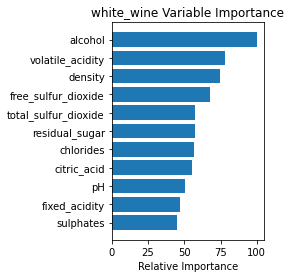

In [102]:
#Feature importance of the Random Forest Classification Model
feature_importance = random_forest_classification_model.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, white_wine.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('white_wine Variable Importance')
plt.show()
#alcohol, volatile_acidity and density are the three most important variables in determining wine quality.

### 3. What are the 5 most important features in this model?

In the white_wine Random Forest Model, the 5 most important features are alcohol, volatile acidity, density, free sulfur dioxide and total sulfur dioxide.

### Random Forest Classification Model with Gridsearch

In [103]:
start_time=time.time()
#Random Forest Classification
#Grid search for max_depth, min_samples_split and max_features
params_random_forest_classification_grid = {'max_depth': np.arange(1,11), 'min_samples_split': np.arange(1,11), 'max_features': np.arange(1,11)}

random_forest_classification = RandomForestClassifier()

random_forest_classification_gridsearch = GridSearchCV(random_forest_classification, params_random_forest_classification_grid, cv=5)

with joblib.parallel_backend('dask'):
#Fit the model to the training data
    random_forest_classification.fit(white_X_train.values.compute(), white_y_train.values.compute())
random_forest_classification_gridsearch.fit(white_X_train.values.compute(), white_y_train.values.compute())

#Best values, from the model
random_forest_gridsearch_parameters = random_forest_classification_gridsearch.best_params_
print("Best parameters: {}".format(random_forest_gridsearch_parameters))

Best parameters: {'max_depth': 10, 'max_features': 2, 'min_samples_split': 5}


In [104]:
print("Random Forest Classification Model with Gridsearch")
print("")
#Training Data
#Run the random forest classification model (max_depth=10, max_features=2, min_samples_split=5)
random_forest_classification_model = RandomForestClassifier(max_depth=10, max_features=2, min_samples_split=5)

with joblib.parallel_backend('dask'):
    random_forest_classification_model.fit(white_X_train.values.compute(), white_y_train.values.compute())


print("~~~Training Data~~~")
print("")
#Training Data
#KNN Classification Score
random_forest_classification_model_training_score = random_forest_classification_model.score(white_X_train.values.compute(), white_y_train.values.compute())
print("Random Forest Classification Model with Gridsearch Training Score: {}".format(random_forest_classification_model_training_score))
print("")
#Cross Validation Scores

#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(random_forest_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(random_forest_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(random_forest_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
white_X_train_predictions = random_forest_classification_model.predict(white_X_train.values.compute())

#Classification report on training data
white_train_classification_report = classification_report(white_y_train.values.compute(), white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion matrix on training data
white_train_confusion_matrix = confusion_matrix(white_y_train.values.compute(), white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Random Forest Classification Model Score
random_forest_classification_model_testing_score = random_forest_classification_model.score(white_X_test.values.compute(), white_y_test.values.compute())
print("Random Forest Classification Model with Gridsearch Testing Score: {}".format(random_forest_classification_model_testing_score))
print("")
#Test data
white_X_test_predictions = random_forest_classification_model.predict(white_X_test.values.compute())

white_test_classification_report = classification_report(white_y_test.values.compute(), white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test.values.compute(), white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test.values.compute(),white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test.values.compute(),white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test.values.compute(),white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test.values.compute(),white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Random Forest Classification Model with Gridsearch

~~~Training Data~~~

Random Forest Classification Model with Gridsearch Training Score: 0.9151469098277609

Accuracy
[0.72278481 0.76075949 0.76708861 0.75158428 0.78326996]
cv_scores_accuracy mean: 0.7570974314546535

Precision
[0.80896686 0.82509506 0.80322004 0.75379939 0.78352181]
cv_scores_precision mean: 0.7949206311756104

Recall
[0.76704545 0.83901515 0.85416667 0.93939394 0.92030361]
cv_scores_recall mean: 0.8639849634868609

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1309
           1       0.91      0.97      0.94      2639

    accuracy                           0.92      3948
   macro avg       0.92      0.89      0.90      3948
weighted avg       0.92      0.92      0.91      3948


Confusion Matrix:
[[1066  243]
 [  92 2547]]


~~~Testing Data~~~

Random Forest Classification Model with Gridsearch Testing Score: 0.8031578947368421

Class

Random Forest Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 204

False Negatives = 60

False Positives = 127

True Positives = 559

Test Data: 

Accuracy Score: 0.8031578947368421

Precision Score: 0.814868804664723

Recall Score: 0.9030694668820679

ROC AUC Score: 0.7596918331389192

The model took 5457.036311149597 to run.

### Support Vector Machine (SVM)

### Support Vector Machine Classification Model

In [105]:
start_time=time.time()
print("Support Vector Machine Classification Model")
print("")
#Training Data
#Run the Support Vector Machine Classification Model
support_vector_classification_model = SVC()

with joblib.parallel_backend('dask'):
    support_vector_classification_model.fit(white_X_train.values.compute(), white_y_train.values.compute())

print("~~~Training Data~~~")
print("")
#Training Data
#Support Vector Machine Classification Score
support_vector_classification_model_training_score = support_vector_classification_model.score(white_X_train.values.compute(), white_y_train.values.compute())
print("Support Vector Machine Classification Model Training Score: {}".format(support_vector_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(support_vector_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(support_vector_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(support_vector_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
white_X_train_predictions = support_vector_classification_model.predict(white_X_train.values.compute())

#Classification report on training data
white_train_classification_report = classification_report(white_y_train.values.compute(), white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion matrix on training data
white_train_confusion_matrix = confusion_matrix(white_y_train.values.compute(), white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Support Vector Machine Score
support_vector_classification_model_testing_score = support_vector_classification_model.score(white_X_test.values.compute(), white_y_test.values.compute())
print("Support Vector Machine Classification Model Testing Score: {}".format(support_vector_classification_model_testing_score))
print("")
#Test data
white_X_test_predictions = support_vector_classification_model.predict(white_X_test.values.compute())

white_test_classification_report = classification_report(white_y_test.values.compute(), white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test.values.compute(), white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test.values.compute(),white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test.values.compute(),white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test.values.compute(),white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test.values.compute(),white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Support Vector Machine Classification Model

~~~Training Data~~~

Support Vector Machine Classification Model Training Score: 0.8128166160081054

Accuracy
[0.71012658 0.72658228 0.76455696 0.75918885 0.80101394]
cv_scores_accuracy mean: 0.7522937222248961

Precision
[0.79029126 0.825      0.80319149 0.76       0.80032468]
cv_scores_precision mean: 0.79576148536446

Recall
[0.77083333 0.75       0.85795455 0.93560606 0.93548387]
cv_scores_recall mean: 0.8499755620723363

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.64      0.70      1309
           1       0.84      0.90      0.86      2639

    accuracy                           0.81      3948
   macro avg       0.80      0.77      0.78      3948
weighted avg       0.81      0.81      0.81      3948


Confusion Matrix:
[[ 843  466]
 [ 273 2366]]


~~~Testing Data~~~

Support Vector Machine Classification Model Testing Score: 0.7726315789473684

Classification Report:
     

Support Vector Machine Classification Model 

Test Data Confusion Matrix:

True Negatives = 187

False Negatives = 72

False Positives = 144

True Positives = 547

Test Data: 

Accuracy Score: 0.7726315789473684

Precision Score: 0.7916063675832128

Recall Score: 0.8836833602584814

ROC AUC Score: 0.7243190215189689

The model took 5.97628378868103 to run.

### Support Vector Machine Classification Model with Gridsearch

In [106]:
start_time=time.time()
#Support Vector Machine Classification
#Grid search for C, gamma
params_support_vector_classification_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

support_vector_classification = SVC()

support_vector_classification_gridsearch = GridSearchCV(support_vector_classification, params_support_vector_classification_grid, cv=5)

with joblib.parallel_backend('dask'):
#Fit the model to the training data
    support_vector_classification.fit(white_X_train.values.compute(), white_y_train.values.compute())
support_vector_classification_gridsearch.fit(white_X_train.values.compute(), white_y_train.values.compute())

#Best values, from the model
support_vector_gridsearch_parameters = support_vector_classification_gridsearch.best_params_
print("Best parameters: {}".format(support_vector_gridsearch_parameters))

Best parameters: {'C': 1, 'gamma': 0.1}


In [107]:
#Training Data
print("Support Vector Machine Classification Model with Gridsearch")
#Run the Support Vector Machine Classification Model

#Run the support vector machine classification model (C=1, gamma=0.1)
support_vector_classification_model = SVC(C=1, gamma=0.1)

with joblib.parallel_backend('dask'):
    support_vector_classification_model.fit(white_X_train.values.compute(), white_y_train.values.compute())

print("~~~Training Data~~~")
print("")
#Training Data
#Support Vector Machine Classification Score
support_vector_classification_model_training_score = support_vector_classification_model.score(white_X_train.values.compute(), white_y_train.values.compute())
print("Support Vector Machine Classification Model with Gridsearch Training Score: {}".format(support_vector_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(support_vector_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(support_vector_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(support_vector_classification_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
white_X_train_predictions = support_vector_classification_model.predict(white_X_train.values.compute())

#Classification report on training data
white_train_classification_report = classification_report(white_y_train.values.compute(), white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion matrix on training data
white_train_confusion_matrix = confusion_matrix(white_y_train.values.compute(), white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Support Vector Machine Score
support_vector_classification_model_testing_score = support_vector_classification_model.score(white_X_test.values.compute(), white_y_test.values.compute())
print("Support Vector Machine Classification Model with Gridsearch Testing Score: {}".format(support_vector_classification_model_testing_score))
print("")
#Test data
white_X_test_predictions = support_vector_classification_model.predict(white_X_test.values.compute())

white_test_classification_report = classification_report(white_y_test.values.compute(), white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test.values.compute(), white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test.values.compute(),white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test.values.compute(),white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test.values.compute(),white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test.values.compute(),white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Support Vector Machine Classification Model with Gridsearch
~~~Training Data~~~

Support Vector Machine Classification Model with Gridsearch Training Score: 0.819402228976697

Accuracy
[0.71265823 0.7278481  0.76455696 0.75918885 0.80101394]
cv_scores_accuracy mean: 0.7530532158957822

Precision
[0.79337232 0.82947368 0.80212014 0.76       0.80228758]
cv_scores_precision mean: 0.7974507453881475

Recall
[0.77083333 0.74621212 0.85984848 0.93560606 0.9316888 ]
cv_scores_recall mean: 0.848837760910816

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.65      0.71      1309
           1       0.84      0.90      0.87      2639

    accuracy                           0.82      3948
   macro avg       0.80      0.78      0.79      3948
weighted avg       0.82      0.82      0.82      3948


Confusion Matrix:
[[ 855  454]
 [ 259 2380]]


~~~Testing Data~~~

Support Vector Machine Classification Model with Gridsearch Testing Score: 0

Support Vector Machine with Gridsearch Classification Model 

Test Data Confusion Matrix:

True Negatives = 188

False Negatives = 69

False Positives = 143

True Positives = 550

Test Data: 

Accuracy Score: 0.7768421052631579

Precision Score: 0.7936507936507936

Recall Score: 0.8885298869143781

ROC AUC Score: 0.7282528588650439

The model took 343.8589057922363 to run.

### Ensemble Gradient Boosting Classifier Model

### Gradient Boosting Classifier Model

In [108]:
gradient_boosting_classifier_model = GradientBoostingClassifier()

with joblib.parallel_backend('dask'):
    gradient_boosting_classifier_model.fit(white_X_train.values.compute(), white_y_train.values.compute())

preds_train = gradient_boosting_classifier_model.predict(white_X_train.values.compute())
preds_test = gradient_boosting_classifier_model.predict(white_X_test.values.compute())

print("Gradient boosting tree training score is: ", roc_auc_score(preds_train, white_y_train.values.compute()))
print("Gradient boosting tree test score is: ", roc_auc_score(preds_test, white_y_test.values.compute()))

Gradient boosting tree training score is:  0.8208844036233304
Gradient boosting tree test score is:  0.7718956536963277


In [109]:
start_time=time.time()
print("ensemble Gradient Boosting Classifier Model")
print("")
#Training Data
#Run the Gradient Boosting Classifier Model
gradient_boosting_classifier_model = GradientBoostingClassifier()

with joblib.parallel_backend('dask'):
    gradient_boosting_classifier_model.fit(white_X_train.values.compute(), white_y_train.values.compute())

print("~~~Training Data~~~")
print("")
#Training Data
#Gradient Boosting Classifier Model Score
gradient_boosting_classifier_model_training_score = gradient_boosting_classifier_model.score(white_X_train.values.compute(), white_y_train.values.compute())
print("ensemble Gradient Boosting Classifier Model Training Score: {}".format(gradient_boosting_classifier_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(gradient_boosting_classifier_model, white_X_train.values.compute(), white_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(gradient_boosting_classifier_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(gradient_boosting_classifier_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
white_X_train_predictions = gradient_boosting_classifier_model.predict(white_X_train.values.compute())

#Classification report on training data
white_train_classification_report = classification_report(white_y_train.values.compute(), white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion matrix on training data
white_train_confusion_matrix = confusion_matrix(white_y_train.values.compute(), white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Gradient Boosting Classifier Model Score
gradient_boosting_classifier_model_testing_score = gradient_boosting_classifier_model.score(white_X_test.values.compute(), white_y_test.values.compute())
print("ensemble Gradient Boosting Classifier Model Testing Score: {}".format(gradient_boosting_classifier_model_testing_score))
print("")
#Test data
white_X_test_predictions = gradient_boosting_classifier_model.predict(white_X_test.values.compute())

white_test_classification_report = classification_report(white_y_test.values.compute(), white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test.values.compute(), white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test.values.compute(),white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test.values.compute(),white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test.values.compute(),white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test.values.compute(),white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

ensemble Gradient Boosting Classifier Model

~~~Training Data~~~

ensemble Gradient Boosting Classifier Model Training Score: 0.8335866261398176

Accuracy
[0.71012658 0.74936709 0.76835443 0.75918885 0.78073511]
cv_scores_accuracy mean: 0.7535544111276893

Precision
[0.81876333 0.82101167 0.80496454 0.75762195 0.78330658]
cv_scores_precision mean: 0.7971336141327516

Recall
[0.72727273 0.79734848 0.85984848 0.94128788 0.9259962 ]
cv_scores_recall mean: 0.8503507561382324

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1309
           1       0.85      0.91      0.88      2639

    accuracy                           0.83      3948
   macro avg       0.82      0.79      0.80      3948
weighted avg       0.83      0.83      0.83      3948


Confusion Matrix:
[[ 885  424]
 [ 233 2406]]


~~~Testing Data~~~

ensemble Gradient Boosting Classifier Model Testing Score: 0.7852631578947369

Classification Report:
   

ensemble Gradient Boosting Classifier Model

Test Data Confusion Matrix:

True Negatives = 197

False Negatives = 70

False Positives = 134

True Positives = 549

Test Data: 

Accuracy Score: 0.7852631578947369

Precision Score: 0.8038067349926794

Recall Score: 0.8869143780290791

ROC AUC Score: 0.7410402705855366

The model took 10.316306114196777 to run.

### Gradient Boosting Classifier Model with Gridsearch

In [110]:
start_time=time.time()
#Gradient Boosting Classifier Model
#Grid search for loss, n_estimators
params_gradient_boosting_classifier_grid = {'loss': ('deviance', 'exponential'), 'n_estimators': [1, 10, 100]}

gradient_boosting_classifier_model = GradientBoostingClassifier()

gradient_boosting_classifier_gridsearch = GridSearchCV(gradient_boosting_classifier_model, params_gradient_boosting_classifier_grid, cv=5)

with joblib.parallel_backend('dask'):
#Fit the model to the training data
    gradient_boosting_classifier_model.fit(white_X_train.values.compute(), white_y_train.values.compute())

gradient_boosting_classifier_gridsearch.fit(white_X_train.values.compute(), white_y_train.values.compute())

#Best values, from the model
gradient_boosting_classifier_gridsearch_parameters = gradient_boosting_classifier_gridsearch.best_params_
print("Best parameters: {}".format(gradient_boosting_classifier_gridsearch_parameters))

Best parameters: {'loss': 'deviance', 'n_estimators': 100}


In [111]:
print("ensemble Gradient Boosting Classifier Model")
print("")
#Training Data
#Run the Gradient Boosting Classifier Model
#loss='deviance', 'n_estimators'=100
gradient_boosting_classifier_model = GradientBoostingClassifier(loss='deviance', n_estimators=100)

with joblib.parallel_backend('dask'):
    gradient_boosting_classifier_model.fit(white_X_train.values.compute(), white_y_train.values.compute())

print("~~~Training Data~~~")
print("")
#Training Data
#Gradient Boosting Classifier Model Score
gradient_boosting_classifier_model_training_score = gradient_boosting_classifier_model.score(white_X_train.values.compute(), white_y_train.values.compute())
print("ensemble Gradient Boosting Classifier Model Training Score: {}".format(gradient_boosting_classifier_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(gradient_boosting_classifier_model, white_X_train.values.compute(), white_y_train.values.compute(), cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(gradient_boosting_classifier_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(gradient_boosting_classifier_model, white_X_train.values.compute(), white_y_train.values.compute(), scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
white_X_train_predictions = gradient_boosting_classifier_model.predict(white_X_train.values.compute())

#Classification report on training data
white_train_classification_report = classification_report(white_y_train.values.compute(), white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion matrix on training data
white_train_confusion_matrix = confusion_matrix(white_y_train.values.compute(), white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Gradient Boosting Classifier Model Score
gradient_boosting_classifier_model_testing_score = gradient_boosting_classifier_model.score(white_X_test.values.compute(), white_y_test.values.compute())
print("ensemble Gradient Boosting Classifier Model Testing Score: {}".format(gradient_boosting_classifier_model_testing_score))
print("")
#Test data
white_X_test_predictions = gradient_boosting_classifier_model.predict(white_X_test.values.compute())

white_test_classification_report = classification_report(white_y_test.values.compute(), white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test.values.compute(), white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test.values.compute(),white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test.values.compute(),white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test.values.compute(),white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test.values.compute(),white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

ensemble Gradient Boosting Classifier Model

~~~Training Data~~~

ensemble Gradient Boosting Classifier Model Training Score: 0.8335866261398176

Accuracy
[0.71012658 0.74810127 0.76835443 0.75918885 0.78073511]
cv_scores_accuracy mean: 0.7533012465707273

Precision
[0.81876333 0.82066277 0.80639432 0.75762195 0.78330658]
cv_scores_precision mean: 0.7973497885399028

Recall
[0.72727273 0.79734848 0.85984848 0.94128788 0.9259962 ]
cv_scores_recall mean: 0.8503507561382324

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1309
           1       0.85      0.91      0.88      2639

    accuracy                           0.83      3948
   macro avg       0.82      0.79      0.80      3948
weighted avg       0.83      0.83      0.83      3948


Confusion Matrix:
[[ 885  424]
 [ 233 2406]]


~~~Testing Data~~~

ensemble Gradient Boosting Classifier Model Testing Score: 0.7852631578947369

Classification Report:
   

ensemble Gradient Boosting Classifier Model with Gridsearch

Test Data Confusion Matrix:

True Negatives = 197

False Negatives = 70

False Positives = 134

True Positives = 549

Test Data: 

Accuracy Score: 0.7852631578947369

Precision Score:  0.8038067349926794

Recall Score: 0.8869143780290791

ROC AUC Score: 0.7410402705855366

The model took 151.93403506278992 to run.

### Model Analysis

### Summary of Performance

Logistic Regression Model Test Data 

Confusion Matrix:

True Negatives = 163

False Negatives = 74

False Positives = 168

True Positives = 545

Test Data: 

Accuracy Score: 0.7452631578947368

Precision Score: 0.7643758765778401

Recall Score: 0.8804523424878837

ROC AUC Score: 0.6864497361986247

The model took 1.7733500003814697 to run.

-

K-Nearest Neighbors (KNN) Classification Model 

Test Data Confusion Matrix:

True Negatives = 184

False Negatives = 84

False Positives = 147

True Positives = 535

Test Data: 

Accuracy Score: 0.7568421052631579

Precision Score: 0.7844574780058651

Recall Score: 0.864297253634895

ROC AUC Score: 0.710094246152795

The model took 2.945633888244629 to run.

-

K-Nearest Neighbors (KNN) Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 171

False Negatives = 73

False Positives = 160

True Positives = 546

Test Data: 

Accuracy score: 0.7547368421052632

Precision score: 0.773371104815864

Recall score: 0.8820678513731826

ROC AUC Score: 0.6993420827862892

The model took 230.04368925094604 to run.

-
K-Nearest Neighbors (KNN) Weighted Classification Model 

Test Data Confusion Matrix:

True Negatives = 221

False Negatives = 64

False Positives = 110

True Positives = 555

Test Data: 

Accuracy Score: 0.8168421052631579

Precision Score: 0.8345864661654135

Recall Score: 0.8966074313408724

ROC AUC Score: 0.7821405736764785

The model took 2.0470681190490723 to run.

-
K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 213

False Negatives = 43

False Positives = 118

True Positives = 576

Test Data: 

Accuracy Score: 0.8305263157894737

Precision Score: 0.829971181556196

Recall Score: 0.9305331179321487

ROC AUC Score: 0.7870188248271015

The model took 173.26508808135986 to run.

-
Decision Tree Classification Model 

Test Data Confusion Matrix:

True Negatives = 215

False Negatives = 101

False Positives = 116

True Positives = 518

Test Data: 

Accuracy Score: 0.771578947368421

Precision Score: 0.8170347003154574

Recall Score: 0.8368336025848142

ROC AUC Score: 0.7431902151896881

The model took 1.5181019306182861 to run.

-
Decision Tree Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 198

False Negatives = 107

False Positives = 133

True Positives = 512

Test Data: 

Accuracy Score: 0.7473684210526316

Precision Score: 0.7937984496124031

Recall Score: 0.827140549273021

ROC AUC Score: 0.7126639302256345

The model took 339.32312202453613 to run.

-
Random Forest Classification Model 

Test Data Confusion Matrix:

True Negatives = 225

False Negatives = 53

False Positives = 106

True Positives = 566

Test Data: 

Accuracy Score: 0.8326315789473684

Precision Score: 0.8422619047619048

Recall Score: 0.9143780290791599

ROC AUC Score: 0.7970681686181298

The model took 12.282971143722534 to run.

-
Random Forest Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 204

False Negatives = 60

False Positives = 127

True Positives = 559

Test Data: 

Accuracy Score: 0.8031578947368421

Precision Score: 0.814868804664723

Recall Score: 0.9030694668820679

ROC AUC Score: 0.7596918331389192

The model took 5457.036311149597 to run.

-
Support Vector Machine Classification Model 

Test Data Confusion Matrix:

True Negatives = 187

False Negatives = 72

False Positives = 144

True Positives = 547

Test Data: 

Accuracy Score: 0.7726315789473684

Precision Score: 0.7916063675832128

Recall Score: 0.8836833602584814

ROC AUC Score: 0.7243190215189689

The model took 5.97628378868103 to run.

-
Support Vector Machine with Gridsearch Classification Model 

Test Data Confusion Matrix:

True Negatives = 188

False Negatives = 69

False Positives = 143

True Positives = 550

Test Data: 

Accuracy Score: 0.7768421052631579

Precision Score: 0.7936507936507936

Recall Score: 0.8885298869143781

ROC AUC Score: 0.7282528588650439

The model took 343.8589057922363 to run.

-
ensemble Gradient Boosting Classifier Model

Test Data Confusion Matrix:

True Negatives = 197

False Negatives = 70

False Positives = 134

True Positives = 549

Test Data: 

Accuracy Score: 0.7852631578947369

Precision Score: 0.8038067349926794

Recall Score: 0.8869143780290791

ROC AUC Score: 0.7410402705855366

The model took 10.316306114196777 to run.

-
ensemble Gradient Boosting Classifier Model with Gridsearch

Test Data Confusion Matrix:

True Negatives = 197

False Negatives = 70

False Positives = 134

True Positives = 549

Test Data: 

Accuracy Score: 0.7852631578947369

Precision Score:  0.8038067349926794

Recall Score: 0.8869143780290791

ROC AUC Score: 0.7410402705855366

The model took 151.93403506278992 to run.



In [112]:
#white_wine model performance
white_wine_performance = pd.DataFrame({'Classifier':['Logistic Regression', 'KNN', 'KNN GridSearch', 'KNN Weighted', 'KNN Weighted GridSearch', 'Decision Tree', 'Decision Tree GridSearch', 'Random Forest', 'Random Forest GridSearch', 'SVM', 'SVM GridSearch', 'Gradient Boosting Classifier', 'Gradient Boosting Classifier GridSearch'],
                                     'Accuracy':[0.75, 0.76, 0.75, 0.82, 0.83, 0.77, 0.75, 0.83, 0.80, 0.77, 0.78, 0.79, 0.79],
                                     'Precision':[0.76, 0.78, 0.77, 0.83, 0.83, 0.82, 0.79, 0.84, 0.81, 0.79, 0.79, 0.80, 0.80],
                                     'Recall':[0.88, 0.86, 0.88, 0.90, 0.93, 0.84, 0.83, 0.91, 0.90, 0.88, 0.89, 0.89, 0.89],
                                     'ROC AUC':[0.69, 0.71, 0.70, 0.78, 0.79, 0.74,  0.71, 0.80, 0.76, 0.72, 0.73, 0.74, 0.74],
                                     'Time':[1.77, 2.95, 230.04, 2.05, 173.27, 1.52, 339.32, 12.28,  5457.04, 5.98, 343.86, 10.32, 151.93]})

In [113]:
white_wine_performance

,Classifier,Accuracy,Precision,Recall,ROC AUC,Time
0,Logistic Regression,0.75,0.76,0.88,0.69,1.77
1,KNN,0.76,0.78,0.86,0.71,2.95
2,KNN GridSearch,0.75,0.77,0.88,0.70,230.04
3,KNN Weighted,0.82,0.83,0.90,0.78,2.05
4,KNN Weighted GridSearch,0.83,0.83,0.93,0.79,173.27
5,Decision Tree,0.77,0.82,0.84,0.74,1.52
6,Decision Tree GridSearch,0.75,0.79,0.83,0.71,339.32
7,Random Forest,0.83,0.84,0.91,0.80,12.28
8,Random Forest GridSearch,0.80,0.81,0.90,0.76,5457.04
9,SVM,0.77,0.79,0.88,0.72,5.98


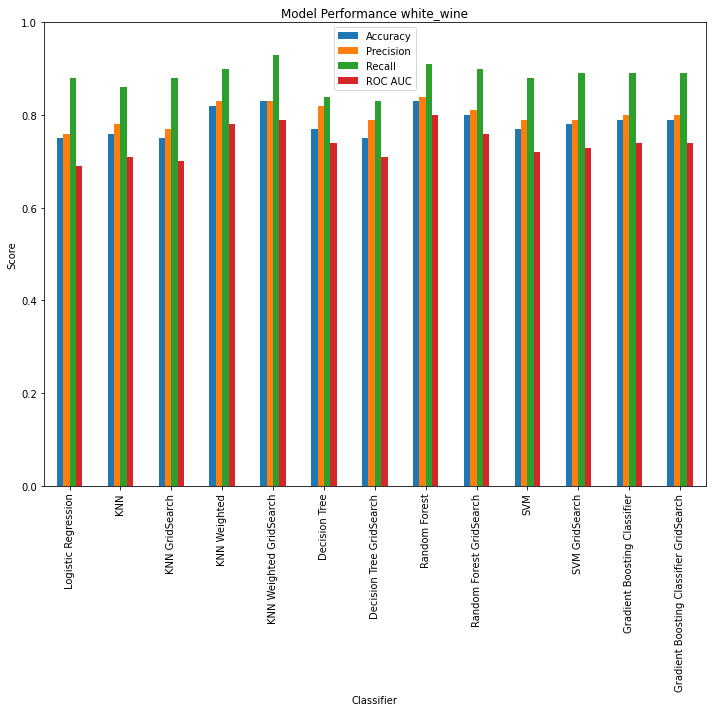

In [114]:
#white_wine model performance bar graph
figure=plt.figure(figsize=(10,10))
ax = figure.gca()

white_wine_performance[['Classifier', 'Accuracy', 'Precision', 'Recall', 'ROC AUC']].plot(kind='bar', x='Classifier', title='Model Performance white_wine', ylim=[0, 1.0], ax=ax)
plt.ylabel("Score")
plt.tight_layout()

### 2. Which machine learning model performs the best in a binary classification task to predict wine quality?

Looking at model performance for the white_wine dataset, the Random Forest Model has the highest accuracy, precision and ROC AUC (respectively: 0.83 (KNN Weighted Gridsearch has 0.83 accuracy as well), 0.84, 0.80). The KNN Weighted Gridsearch Model has the highest recall (0.93). 

Accuracy is a measure of the number of correctly predicted data points out of all of the data points.

Precision is a measure of the number of how many predicted positives are actually positive (important if false positive cost is high).

Recall is a measure of the number of how many actual positives are classified (important if false negative cost is high). 

Looking at the test data confusion matrix of the Random Forest Classification Model:

(True Negatives = 225, False Negatives = 53, False Positives = 106, True Positives = 566)

In order to decrease the number of False Negatives and False Positives, more data can be added to the model for training. 

It is important to note that the added time for GridSearch with the Random Forest Model did not perform as well as the Random Forest Model without GridSearch.

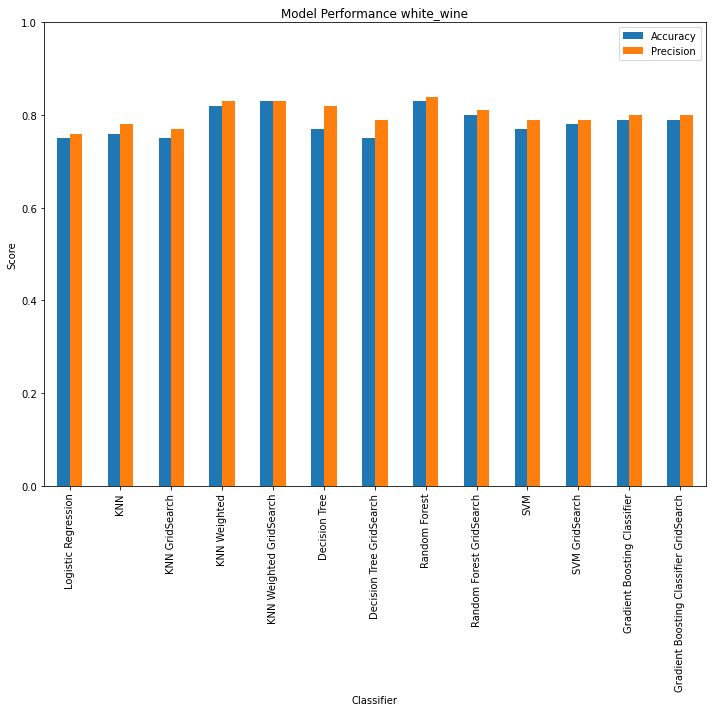

In [115]:
#white_wine model performance bar graph of accuracy and precision
figure=plt.figure(figsize=(10,10))
ax = figure.gca()

white_wine_performance[['Classifier', 'Accuracy', 'Precision']].plot(kind='bar', x='Classifier', title='Model Performance white_wine', ylim=[0, 1.0], ax=ax)
plt.ylabel("Score")
plt.tight_layout()

## Conclusion

For both the red_wine and white_wine datasets, the Random Forest Model yields the highest Accuracy, Precision and ROC AUC Scores. The KNN Weighted Model with GridSearch yields the highest Recall Scores for red_wine and white_wine. 

It is important to note that the three most important features, determined with feature importance, to wine quality, are not identical for red and white wine. For red wine, the three most important features to wine quality are alcohol, sulphates and volatile acidity. For white wine, the three most important features to wine quality are alcohol, volatile acidity and density.

For this particular business interest, accuracy should be maximized to ensure that correct predictions are made, to minimize the risk to both customers and business owners. In the Random Forest Model, Accuracy, Precision and ROC AUC are maximized. 

In all of the models tested, models run with GridSearch did not show increases in their performance (Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, Support Vector Machines (SVM) and an ensemble Gradient Boosting Classifier) compared to the same model run without GridSearch.

## Further Analyses

It is important to note that the white_wine data set is larger than the red_wine data set and so contains more training and testing data for the models. For further research, it is important to collect more data and re-run the models for the larger datasets. 

While no intensive feature engineering was conducted with the current datastets before running these models, due to the reasonably sized number of features in the datasets, the current models can be re-run after conducting Principal Component Analysis (PCA) to reduce the dimensionality of the datasets or after creating new interaction variables with the current variables (potentially between free sulfur dioxide and total sulfur dioxide as there is a high correlation between the variables, 0.67 and 0.62, respectively, for red and white wine). If further data collection entails more features, PCA and/or interaction analyses can be conducted with those variables. 

If more data is collected and consequently more balanced data is acquired for the original "quality" target variable, it might be possible to conduct either regression or classification supervised learning modeling to determine quality as a score between 0 and 10. 

In [116]:
client.close()

distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
